In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog
import tkinter as ERS
import winsound
import librosa
import librosa.display
import pandas as pd
file = "outputF.csv"
import pyaudio
import code
import IPython.display as ipd
import scipy.io.wavfile as wav
import os
import warnings; 
warnings.simplefilter('ignore')

In [2]:
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
#@title Data Links
Data = ""
# Paths for data.
# Ravdess = "/content/audio_speech_actors_01-24/"
# Ravdess = r'D:\ravdess\audio_speech_actors_01-24/' 
Ravdess = r'D:\MS Data Science\projectFiles\projectFiles2\Datasets\ravdess\audio_speech_actors_01-24/'

# Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"

# Crema = "/kaggle/input/cremad/AudioWAV/"
# Crema = "/content/AudioWAV/"
# Crema = "D:\MS Data Science\AudioWAV/"
Crema = "D:\MS Data Science\projectFiles\projectFiles2\Datasets\Crema/"
# Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
# Tess = "/content/TESS Toronto emotional speech set data/"
# Tess = "D:\TESS Toronto emotional speech set data/"
Tess = "D:\MS Data Science\projectFiles\projectFiles2\Datasets\TESS Toronto emotional speech set data/"
# Savee = "/content/ALL/"

# Savee = "D:\Savee/"
Savee = 'D:\MS Data Science\projectFiles\projectFiles2\Datasets\Savee/'

In [4]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  D:\MS Data Science\projectFiles\projectFiles2\...
1  disgust  D:\MS Data Science\projectFiles\projectFiles2\...
2     fear  D:\MS Data Science\projectFiles\projectFiles2\...
3    happy  D:\MS Data Science\projectFiles\projectFiles2\...
4  neutral  D:\MS Data Science\projectFiles\projectFiles2\...

In [5]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  D:\MS Data Science\projectFiles\projectFiles2\...
1    angry  D:\MS Data Science\projectFiles\projectFiles2\...
2    angry  D:\MS Data Science\projectFiles\projectFiles2\...
3    angry  D:\MS Data Science\projectFiles\projectFiles2\...
4    angry  D:\MS Data Science\projectFiles\projectFiles2\...

In [6]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  D:\MS Data Science\projectFiles\projectFiles2\...
1  neutral  D:\MS Data Science\projectFiles\projectFiles2\...
2  neutral  D:\MS Data Science\projectFiles\projectFiles2\...
3  neutral  D:\MS Data Science\projectFiles\projectFiles2\...
4     calm  D:\MS Data Science\projectFiles\projectFiles2\...

In [7]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for dir in savee_directory_list:
#     print(dir)
    save2 = os.listdir(Savee + dir)
#     print(save2)
    for file in save2:
#         print(file)
#         print("path = ", Savee + dir + '/' + file)
        file_path.append(Savee + dir + '/' + file)
        ele = file[:-6]
        if ele=='a':
            file_emotion.append('angry')
        elif ele=='d':
            file_emotion.append('disgust')
        elif ele=='f':
            file_emotion.append('fear')
        elif ele=='h':
            file_emotion.append('happy')
        elif ele=='n':
            file_emotion.append('neutral')
        elif ele=='sa':
            file_emotion.append('sad')
        else:
            file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
# print(len(Savee_df))

Emotions                                               Path
0    angry  D:\MS Data Science\projectFiles\projectFiles2\...
1    angry  D:\MS Data Science\projectFiles\projectFiles2\...
2    angry  D:\MS Data Science\projectFiles\projectFiles2\...
3    angry  D:\MS Data Science\projectFiles\projectFiles2\...
4    angry  D:\MS Data Science\projectFiles\projectFiles2\...

In [9]:
# data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)

print(len(data_path))
data_path.head()

12162


Emotions                                               Path
0  neutral  D:\MS Data Science\projectFiles\projectFiles2\...
1  neutral  D:\MS Data Science\projectFiles\projectFiles2\...
2  neutral  D:\MS Data Science\projectFiles\projectFiles2\...
3  neutral  D:\MS Data Science\projectFiles\projectFiles2\...
4     calm  D:\MS Data Science\projectFiles\projectFiles2\...

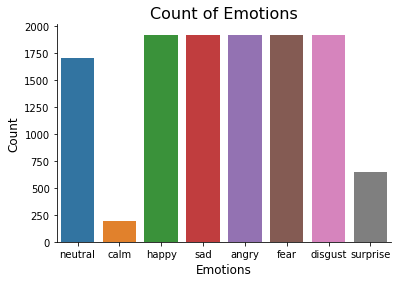

In [10]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [11]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

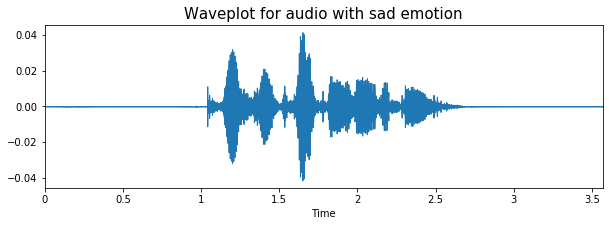

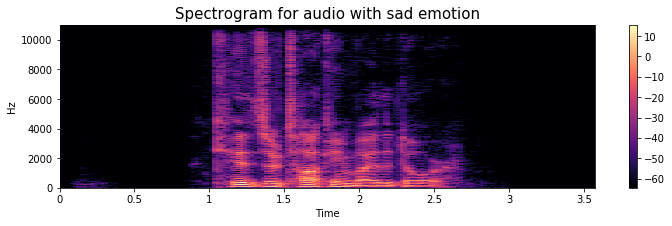

In [12]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

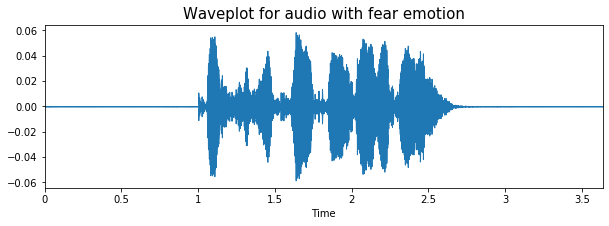

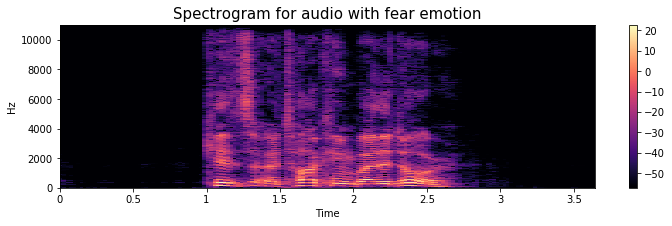

In [13]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

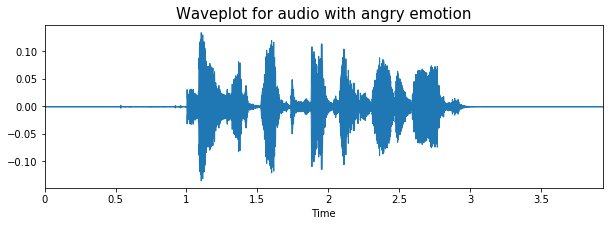

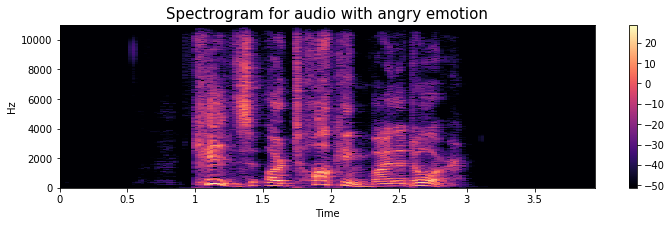

In [14]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [15]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

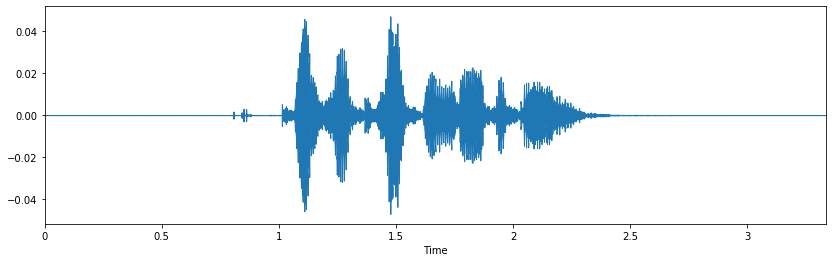

In [16]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

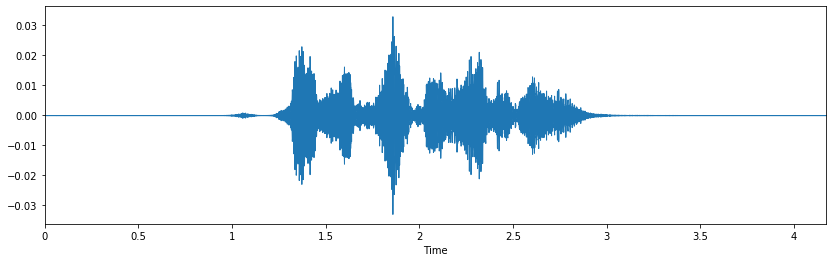

In [17]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

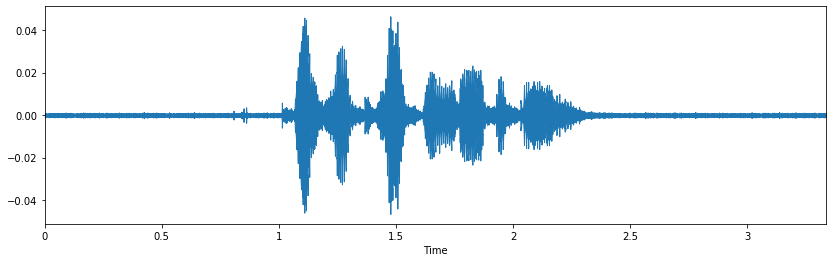

In [18]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

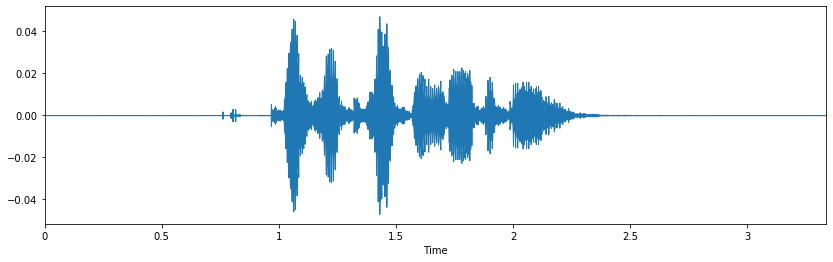

In [19]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

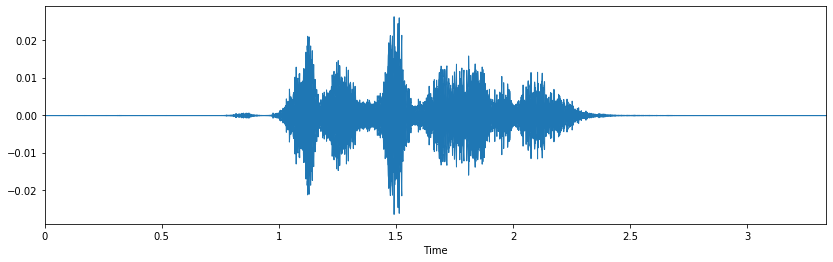

In [20]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [21]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [22]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
#         print("ele = " , ele , " & emotion = " , emotion)
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [23]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [24]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.300781  0.706492  0.756853  0.735217  0.731014  0.715156  0.667529   
1  0.298218  0.786337  0.807210  0.794205  0.808085  0.795050  0.684082   
2  0.176693  0.640605  0.712837  0.743736  0.714797  0.701402  0.694569   
3  0.271272  0.674966  0.723259  0.724594  0.681301  0.670643  0.674574   
4  0.302789  0.790817  0.819668  0.774282  0.763676  0.780079  0.681199   

          7         8         9  ...           153       154       155  \
0  0.673754  0.722173  0.748969  ...  4.319263e-06  0.000003  0.000002   
1  0.677798  0.726496  0.769694  ...  1.785882e-05  0.000017  0.000017   
2  0.663853  0.688527  0.742508  ...  7.999367e-07  0.000001  0.000001   
3  0.630036  0.680146  0.708276  ...  6.998011e-06  0.000007  0.000007   
4  0.656105  0.717399  0.748661  ...  4.493229e-05  0.000045  0.000045   

            156           157           158       159           160  \
0  2.286677e-06  5.131693e-06  8.065748e-06  0.000005  2.270858e-06   
1  1.495758e-05  1.812368e-05  2.264068e-05  0.000020  1.600609e-05   
2  5.350822e-07  3.480662e-07  8.398366e-07  0.000001  4.287777e-07   
3  6.999257e-06  1.217880e-05  9.449916e-06  0.000008  2.638513e-06   
4  4.551588e-05  4.939415e-05  4.563810e-05  0.000044  3.839514e-05   

            161   labels  
0  1.642365e-07  neutral  
1  1.387462e-05  neutral  
2  2.878995e-08  neutral  
3  1.788902e-07  neutral  
4  3.624355e-05  neutral  

[5 rows x 163 columns]

In [25]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [26]:
print(Y)

['neutral' 'neutral' 'neutral' ... 'surprise' 'surprise' 'surprise']


In [27]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [28]:
print(Y)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [29]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [30]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [31]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

In [32]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 81, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 128)           0

In [33]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=32, epochs=80, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/80


351/856 [===========>..................] - ETA: 10:10 - loss: 2.1195 - accuracy: 0.156 - ETA: 36s - loss: 2.0923 - accuracy: 0.1510  - ETA: 36s - loss: 2.0809 - accuracy: 0.151 - ETA: 35s - loss: 2.0703 - accuracy: 0.150 - ETA: 35s - loss: 2.0583 - accuracy: 0.152 - ETA: 35s - loss: 2.0539 - accuracy: 0.153 - ETA: 34s - loss: 2.0495 - accuracy: 0.154 - ETA: 34s - loss: 2.0445 - accuracy: 0.154 - ETA: 34s - loss: 2.0387 - accuracy: 0.155 - ETA: 34s - loss: 2.0337 - accuracy: 0.156 - ETA: 34s - loss: 2.0291 - accuracy: 0.157 - ETA: 34s - loss: 2.0240 - accuracy: 0.158 - ETA: 33s - loss: 2.0193 - accuracy: 0.159 - ETA: 33s - loss: 2.0149 - accuracy: 0.160 - ETA: 34s - loss: 2.0129 - accuracy: 0.160 - ETA: 34s - loss: 2.0097 - accuracy: 0.161 - ETA: 34s - loss: 2.0068 - accuracy: 0.163 - ETA: 34s - loss: 2.0055 - accuracy: 0.164 - ETA: 34s - loss: 2.0042 - accuracy: 0.164 - ETA: 34s - loss: 2.0016 - accuracy: 0.166 - ETA: 34s - loss: 1.9990 - accuracy: 0.167 - ETA: 35s - loss: 1.9977 - acc

369/856 [===========>..................] - ETA: 42s - loss: 1.6710 - accuracy: 0.218 - ETA: 34s - loss: 1.5904 - accuracy: 0.302 - ETA: 34s - loss: 1.5664 - accuracy: 0.329 - ETA: 34s - loss: 1.5406 - accuracy: 0.352 - ETA: 33s - loss: 1.5296 - accuracy: 0.362 - ETA: 33s - loss: 1.5226 - accuracy: 0.368 - ETA: 33s - loss: 1.5186 - accuracy: 0.370 - ETA: 33s - loss: 1.5192 - accuracy: 0.370 - ETA: 33s - loss: 1.5207 - accuracy: 0.369 - ETA: 33s - loss: 1.5219 - accuracy: 0.368 - ETA: 33s - loss: 1.5219 - accuracy: 0.368 - ETA: 33s - loss: 1.5216 - accuracy: 0.369 - ETA: 33s - loss: 1.5215 - accuracy: 0.370 - ETA: 33s - loss: 1.5213 - accuracy: 0.371 - ETA: 33s - loss: 1.5209 - accuracy: 0.372 - ETA: 33s - loss: 1.5204 - accuracy: 0.373 - ETA: 32s - loss: 1.5201 - accuracy: 0.374 - ETA: 32s - loss: 1.5197 - accuracy: 0.375 - ETA: 32s - loss: 1.5193 - accuracy: 0.375 - ETA: 32s - loss: 1.5190 - accuracy: 0.376 - ETA: 32s - loss: 1.5189 - accuracy: 0.376 - ETA: 32s - loss: 1.5189 - accurac

856/856 [==============================] - ETA: 6s - loss: 1.4623 - accuracy: 0.40 - ETA: 6s - loss: 1.4622 - accuracy: 0.40 - ETA: 6s - loss: 1.4622 - accuracy: 0.40 - ETA: 6s - loss: 1.4622 - accuracy: 0.40 - ETA: 6s - loss: 1.4621 - accuracy: 0.40 - ETA: 6s - loss: 1.4620 - accuracy: 0.40 - ETA: 6s - loss: 1.4620 - accuracy: 0.40 - ETA: 6s - loss: 1.4619 - accuracy: 0.40 - ETA: 6s - loss: 1.4619 - accuracy: 0.40 - ETA: 6s - loss: 1.4618 - accuracy: 0.40 - ETA: 6s - loss: 1.4617 - accuracy: 0.40 - ETA: 6s - loss: 1.4617 - accuracy: 0.40 - ETA: 6s - loss: 1.4616 - accuracy: 0.40 - ETA: 5s - loss: 1.4615 - accuracy: 0.40 - ETA: 5s - loss: 1.4615 - accuracy: 0.40 - ETA: 5s - loss: 1.4614 - accuracy: 0.40 - ETA: 5s - loss: 1.4613 - accuracy: 0.40 - ETA: 5s - loss: 1.4613 - accuracy: 0.40 - ETA: 5s - loss: 1.4612 - accuracy: 0.40 - ETA: 5s - loss: 1.4611 - accuracy: 0.40 - ETA: 5s - loss: 1.4611 - accuracy: 0.40 - ETA: 5s - loss: 1.4610 - accuracy: 0.40 - ETA: 5s - loss: 1.4609 - accuracy

302/856 [=========>....................] - ETA: 38s - loss: 1.6263 - accuracy: 0.375 - ETA: 38s - loss: 1.6012 - accuracy: 0.371 - ETA: 38s - loss: 1.5466 - accuracy: 0.386 - ETA: 38s - loss: 1.5031 - accuracy: 0.401 - ETA: 38s - loss: 1.4752 - accuracy: 0.413 - ETA: 38s - loss: 1.4549 - accuracy: 0.422 - ETA: 37s - loss: 1.4437 - accuracy: 0.427 - ETA: 37s - loss: 1.4357 - accuracy: 0.431 - ETA: 38s - loss: 1.4323 - accuracy: 0.432 - ETA: 38s - loss: 1.4291 - accuracy: 0.432 - ETA: 37s - loss: 1.4279 - accuracy: 0.432 - ETA: 37s - loss: 1.4266 - accuracy: 0.432 - ETA: 37s - loss: 1.4257 - accuracy: 0.432 - ETA: 37s - loss: 1.4251 - accuracy: 0.433 - ETA: 37s - loss: 1.4247 - accuracy: 0.433 - ETA: 36s - loss: 1.4243 - accuracy: 0.433 - ETA: 36s - loss: 1.4233 - accuracy: 0.434 - ETA: 36s - loss: 1.4221 - accuracy: 0.435 - ETA: 36s - loss: 1.4210 - accuracy: 0.435 - ETA: 36s - loss: 1.4194 - accuracy: 0.436 - ETA: 36s - loss: 1.4177 - accuracy: 0.436 - ETA: 36s - loss: 1.4158 - accurac

350/856 [===========>..................] - ETA: 45s - loss: 1.2890 - accuracy: 0.437 - ETA: 39s - loss: 1.3371 - accuracy: 0.442 - ETA: 40s - loss: 1.3507 - accuracy: 0.435 - ETA: 39s - loss: 1.3447 - accuracy: 0.437 - ETA: 39s - loss: 1.3417 - accuracy: 0.436 - ETA: 39s - loss: 1.3416 - accuracy: 0.435 - ETA: 38s - loss: 1.3416 - accuracy: 0.434 - ETA: 39s - loss: 1.3417 - accuracy: 0.434 - ETA: 38s - loss: 1.3419 - accuracy: 0.433 - ETA: 38s - loss: 1.3421 - accuracy: 0.432 - ETA: 37s - loss: 1.3403 - accuracy: 0.433 - ETA: 37s - loss: 1.3398 - accuracy: 0.434 - ETA: 37s - loss: 1.3391 - accuracy: 0.435 - ETA: 37s - loss: 1.3377 - accuracy: 0.437 - ETA: 36s - loss: 1.3369 - accuracy: 0.438 - ETA: 36s - loss: 1.3367 - accuracy: 0.439 - ETA: 36s - loss: 1.3367 - accuracy: 0.439 - ETA: 36s - loss: 1.3365 - accuracy: 0.440 - ETA: 36s - loss: 1.3357 - accuracy: 0.441 - ETA: 36s - loss: 1.3348 - accuracy: 0.442 - ETA: 36s - loss: 1.3342 - accuracy: 0.443 - ETA: 36s - loss: 1.3336 - accurac

856/856 [==============================] - ETA: 7s - loss: 1.3134 - accuracy: 0.46 - ETA: 7s - loss: 1.3134 - accuracy: 0.46 - ETA: 6s - loss: 1.3134 - accuracy: 0.46 - ETA: 6s - loss: 1.3133 - accuracy: 0.46 - ETA: 6s - loss: 1.3133 - accuracy: 0.46 - ETA: 6s - loss: 1.3133 - accuracy: 0.46 - ETA: 6s - loss: 1.3133 - accuracy: 0.46 - ETA: 6s - loss: 1.3132 - accuracy: 0.46 - ETA: 6s - loss: 1.3132 - accuracy: 0.46 - ETA: 6s - loss: 1.3132 - accuracy: 0.46 - ETA: 6s - loss: 1.3131 - accuracy: 0.46 - ETA: 6s - loss: 1.3131 - accuracy: 0.46 - ETA: 6s - loss: 1.3131 - accuracy: 0.46 - ETA: 5s - loss: 1.3130 - accuracy: 0.46 - ETA: 5s - loss: 1.3130 - accuracy: 0.46 - ETA: 5s - loss: 1.3130 - accuracy: 0.46 - ETA: 5s - loss: 1.3130 - accuracy: 0.46 - ETA: 5s - loss: 1.3129 - accuracy: 0.46 - ETA: 5s - loss: 1.3129 - accuracy: 0.46 - ETA: 5s - loss: 1.3129 - accuracy: 0.46 - ETA: 5s - loss: 1.3128 - accuracy: 0.46 - ETA: 5s - loss: 1.3128 - accuracy: 0.46 - ETA: 5s - loss: 1.3128 - accuracy

358/856 [===========>..................] - ETA: 46s - loss: 1.1603 - accuracy: 0.593 - ETA: 35s - loss: 1.1301 - accuracy: 0.593 - ETA: 36s - loss: 1.1619 - accuracy: 0.569 - ETA: 35s - loss: 1.1788 - accuracy: 0.554 - ETA: 35s - loss: 1.1847 - accuracy: 0.547 - ETA: 36s - loss: 1.1865 - accuracy: 0.541 - ETA: 35s - loss: 1.1887 - accuracy: 0.536 - ETA: 35s - loss: 1.1912 - accuracy: 0.533 - ETA: 35s - loss: 1.1941 - accuracy: 0.531 - ETA: 35s - loss: 1.1964 - accuracy: 0.529 - ETA: 35s - loss: 1.1987 - accuracy: 0.528 - ETA: 34s - loss: 1.2008 - accuracy: 0.527 - ETA: 34s - loss: 1.2033 - accuracy: 0.526 - ETA: 34s - loss: 1.2051 - accuracy: 0.526 - ETA: 34s - loss: 1.2069 - accuracy: 0.525 - ETA: 34s - loss: 1.2090 - accuracy: 0.524 - ETA: 34s - loss: 1.2106 - accuracy: 0.523 - ETA: 34s - loss: 1.2119 - accuracy: 0.522 - ETA: 33s - loss: 1.2134 - accuracy: 0.522 - ETA: 33s - loss: 1.2146 - accuracy: 0.521 - ETA: 33s - loss: 1.2159 - accuracy: 0.521 - ETA: 33s - loss: 1.2170 - accurac

363/856 [===========>..................] - ETA: 33s - loss: 1.3552 - accuracy: 0.500 - ETA: 35s - loss: 1.3050 - accuracy: 0.503 - ETA: 34s - loss: 1.2902 - accuracy: 0.496 - ETA: 34s - loss: 1.2855 - accuracy: 0.491 - ETA: 35s - loss: 1.2766 - accuracy: 0.492 - ETA: 34s - loss: 1.2773 - accuracy: 0.491 - ETA: 34s - loss: 1.2749 - accuracy: 0.491 - ETA: 34s - loss: 1.2686 - accuracy: 0.493 - ETA: 34s - loss: 1.2629 - accuracy: 0.493 - ETA: 34s - loss: 1.2570 - accuracy: 0.494 - ETA: 34s - loss: 1.2523 - accuracy: 0.495 - ETA: 33s - loss: 1.2485 - accuracy: 0.497 - ETA: 33s - loss: 1.2450 - accuracy: 0.498 - ETA: 33s - loss: 1.2430 - accuracy: 0.498 - ETA: 33s - loss: 1.2410 - accuracy: 0.499 - ETA: 33s - loss: 1.2390 - accuracy: 0.500 - ETA: 33s - loss: 1.2373 - accuracy: 0.501 - ETA: 33s - loss: 1.2357 - accuracy: 0.502 - ETA: 33s - loss: 1.2344 - accuracy: 0.503 - ETA: 33s - loss: 1.2338 - accuracy: 0.503 - ETA: 33s - loss: 1.2338 - accuracy: 0.503 - ETA: 33s - loss: 1.2340 - accurac

856/856 [==============================] - ETA: 5s - loss: 1.2348 - accuracy: 0.50 - ETA: 5s - loss: 1.2348 - accuracy: 0.50 - ETA: 5s - loss: 1.2348 - accuracy: 0.50 - ETA: 5s - loss: 1.2348 - accuracy: 0.50 - ETA: 4s - loss: 1.2348 - accuracy: 0.50 - ETA: 4s - loss: 1.2348 - accuracy: 0.50 - ETA: 4s - loss: 1.2348 - accuracy: 0.50 - ETA: 4s - loss: 1.2348 - accuracy: 0.50 - ETA: 4s - loss: 1.2348 - accuracy: 0.50 - ETA: 4s - loss: 1.2348 - accuracy: 0.50 - ETA: 4s - loss: 1.2348 - accuracy: 0.50 - ETA: 4s - loss: 1.2348 - accuracy: 0.50 - ETA: 4s - loss: 1.2348 - accuracy: 0.50 - ETA: 4s - loss: 1.2348 - accuracy: 0.50 - ETA: 4s - loss: 1.2348 - accuracy: 0.50 - ETA: 4s - loss: 1.2348 - accuracy: 0.50 - ETA: 3s - loss: 1.2349 - accuracy: 0.50 - ETA: 3s - loss: 1.2349 - accuracy: 0.50 - ETA: 3s - loss: 1.2349 - accuracy: 0.50 - ETA: 3s - loss: 1.2349 - accuracy: 0.50 - ETA: 3s - loss: 1.2349 - accuracy: 0.50 - ETA: 3s - loss: 1.2349 - accuracy: 0.50 - ETA: 3s - loss: 1.2349 - accuracy

355/856 [===========>..................] - ETA: 37s - loss: 1.1295 - accuracy: 0.500 - ETA: 35s - loss: 1.0805 - accuracy: 0.510 - ETA: 35s - loss: 1.0941 - accuracy: 0.513 - ETA: 35s - loss: 1.1151 - accuracy: 0.508 - ETA: 35s - loss: 1.1319 - accuracy: 0.506 - ETA: 35s - loss: 1.1457 - accuracy: 0.503 - ETA: 35s - loss: 1.1591 - accuracy: 0.501 - ETA: 36s - loss: 1.1685 - accuracy: 0.501 - ETA: 36s - loss: 1.1757 - accuracy: 0.500 - ETA: 36s - loss: 1.1825 - accuracy: 0.499 - ETA: 36s - loss: 1.1885 - accuracy: 0.499 - ETA: 36s - loss: 1.1934 - accuracy: 0.498 - ETA: 36s - loss: 1.1977 - accuracy: 0.497 - ETA: 36s - loss: 1.2019 - accuracy: 0.496 - ETA: 36s - loss: 1.2049 - accuracy: 0.496 - ETA: 36s - loss: 1.2081 - accuracy: 0.495 - ETA: 35s - loss: 1.2111 - accuracy: 0.494 - ETA: 35s - loss: 1.2139 - accuracy: 0.494 - ETA: 35s - loss: 1.2164 - accuracy: 0.493 - ETA: 35s - loss: 1.2183 - accuracy: 0.493 - ETA: 35s - loss: 1.2195 - accuracy: 0.493 - ETA: 34s - loss: 1.2203 - accurac

357/856 [===========>..................] - ETA: 38s - loss: 1.2212 - accuracy: 0.500 - ETA: 37s - loss: 1.2015 - accuracy: 0.480 - ETA: 37s - loss: 1.2025 - accuracy: 0.485 - ETA: 37s - loss: 1.2029 - accuracy: 0.491 - ETA: 37s - loss: 1.2047 - accuracy: 0.496 - ETA: 37s - loss: 1.2018 - accuracy: 0.502 - ETA: 37s - loss: 1.1958 - accuracy: 0.507 - ETA: 37s - loss: 1.1924 - accuracy: 0.511 - ETA: 37s - loss: 1.1908 - accuracy: 0.513 - ETA: 38s - loss: 1.1905 - accuracy: 0.514 - ETA: 38s - loss: 1.1903 - accuracy: 0.515 - ETA: 38s - loss: 1.1899 - accuracy: 0.515 - ETA: 39s - loss: 1.1898 - accuracy: 0.516 - ETA: 39s - loss: 1.1897 - accuracy: 0.517 - ETA: 40s - loss: 1.1892 - accuracy: 0.518 - ETA: 40s - loss: 1.1882 - accuracy: 0.519 - ETA: 40s - loss: 1.1865 - accuracy: 0.520 - ETA: 39s - loss: 1.1856 - accuracy: 0.522 - ETA: 40s - loss: 1.1853 - accuracy: 0.522 - ETA: 39s - loss: 1.1848 - accuracy: 0.524 - ETA: 39s - loss: 1.1845 - accuracy: 0.524 - ETA: 39s - loss: 1.1843 - accurac

856/856 [==============================] - ETA: 5s - loss: 1.1955 - accuracy: 0.51 - ETA: 5s - loss: 1.1955 - accuracy: 0.51 - ETA: 5s - loss: 1.1955 - accuracy: 0.51 - ETA: 5s - loss: 1.1955 - accuracy: 0.51 - ETA: 5s - loss: 1.1955 - accuracy: 0.51 - ETA: 4s - loss: 1.1955 - accuracy: 0.51 - ETA: 4s - loss: 1.1955 - accuracy: 0.51 - ETA: 4s - loss: 1.1955 - accuracy: 0.51 - ETA: 4s - loss: 1.1955 - accuracy: 0.51 - ETA: 4s - loss: 1.1956 - accuracy: 0.51 - ETA: 4s - loss: 1.1956 - accuracy: 0.51 - ETA: 4s - loss: 1.1956 - accuracy: 0.51 - ETA: 4s - loss: 1.1956 - accuracy: 0.51 - ETA: 4s - loss: 1.1956 - accuracy: 0.51 - ETA: 4s - loss: 1.1956 - accuracy: 0.51 - ETA: 4s - loss: 1.1956 - accuracy: 0.51 - ETA: 3s - loss: 1.1956 - accuracy: 0.51 - ETA: 3s - loss: 1.1956 - accuracy: 0.51 - ETA: 3s - loss: 1.1956 - accuracy: 0.51 - ETA: 3s - loss: 1.1956 - accuracy: 0.51 - ETA: 3s - loss: 1.1956 - accuracy: 0.51 - ETA: 3s - loss: 1.1956 - accuracy: 0.51 - ETA: 3s - loss: 1.1956 - accuracy

364/856 [===========>..................] - ETA: 34s - loss: 1.1957 - accuracy: 0.562 - ETA: 33s - loss: 1.0878 - accuracy: 0.602 - ETA: 34s - loss: 1.0733 - accuracy: 0.601 - ETA: 34s - loss: 1.0723 - accuracy: 0.598 - ETA: 34s - loss: 1.0800 - accuracy: 0.593 - ETA: 34s - loss: 1.0874 - accuracy: 0.591 - ETA: 34s - loss: 1.1013 - accuracy: 0.584 - ETA: 34s - loss: 1.1105 - accuracy: 0.580 - ETA: 34s - loss: 1.1177 - accuracy: 0.576 - ETA: 34s - loss: 1.1248 - accuracy: 0.572 - ETA: 34s - loss: 1.1305 - accuracy: 0.569 - ETA: 34s - loss: 1.1355 - accuracy: 0.566 - ETA: 34s - loss: 1.1397 - accuracy: 0.563 - ETA: 34s - loss: 1.1437 - accuracy: 0.561 - ETA: 34s - loss: 1.1454 - accuracy: 0.560 - ETA: 34s - loss: 1.1483 - accuracy: 0.558 - ETA: 34s - loss: 1.1514 - accuracy: 0.557 - ETA: 34s - loss: 1.1538 - accuracy: 0.555 - ETA: 34s - loss: 1.1555 - accuracy: 0.554 - ETA: 34s - loss: 1.1568 - accuracy: 0.553 - ETA: 34s - loss: 1.1577 - accuracy: 0.552 - ETA: 34s - loss: 1.1585 - accurac

361/856 [===========>..................] - ETA: 40s - loss: 0.9471 - accuracy: 0.687 - ETA: 36s - loss: 1.1011 - accuracy: 0.576 - ETA: 36s - loss: 1.1178 - accuracy: 0.550 - ETA: 36s - loss: 1.1186 - accuracy: 0.548 - ETA: 36s - loss: 1.1243 - accuracy: 0.548 - ETA: 36s - loss: 1.1316 - accuracy: 0.548 - ETA: 35s - loss: 1.1392 - accuracy: 0.548 - ETA: 35s - loss: 1.1447 - accuracy: 0.548 - ETA: 35s - loss: 1.1502 - accuracy: 0.548 - ETA: 35s - loss: 1.1543 - accuracy: 0.547 - ETA: 35s - loss: 1.1579 - accuracy: 0.545 - ETA: 35s - loss: 1.1608 - accuracy: 0.544 - ETA: 35s - loss: 1.1639 - accuracy: 0.543 - ETA: 35s - loss: 1.1673 - accuracy: 0.542 - ETA: 34s - loss: 1.1701 - accuracy: 0.541 - ETA: 34s - loss: 1.1718 - accuracy: 0.540 - ETA: 34s - loss: 1.1733 - accuracy: 0.540 - ETA: 34s - loss: 1.1746 - accuracy: 0.539 - ETA: 34s - loss: 1.1758 - accuracy: 0.538 - ETA: 34s - loss: 1.1762 - accuracy: 0.538 - ETA: 34s - loss: 1.1761 - accuracy: 0.538 - ETA: 34s - loss: 1.1764 - accurac

856/856 [==============================] - ETA: 7s - loss: 1.1685 - accuracy: 0.53 - ETA: 7s - loss: 1.1684 - accuracy: 0.53 - ETA: 7s - loss: 1.1684 - accuracy: 0.53 - ETA: 7s - loss: 1.1684 - accuracy: 0.53 - ETA: 7s - loss: 1.1684 - accuracy: 0.53 - ETA: 7s - loss: 1.1684 - accuracy: 0.53 - ETA: 7s - loss: 1.1684 - accuracy: 0.53 - ETA: 7s - loss: 1.1684 - accuracy: 0.53 - ETA: 6s - loss: 1.1683 - accuracy: 0.53 - ETA: 6s - loss: 1.1683 - accuracy: 0.53 - ETA: 6s - loss: 1.1683 - accuracy: 0.53 - ETA: 6s - loss: 1.1683 - accuracy: 0.53 - ETA: 6s - loss: 1.1683 - accuracy: 0.53 - ETA: 6s - loss: 1.1683 - accuracy: 0.53 - ETA: 6s - loss: 1.1683 - accuracy: 0.53 - ETA: 6s - loss: 1.1682 - accuracy: 0.53 - ETA: 6s - loss: 1.1682 - accuracy: 0.53 - ETA: 6s - loss: 1.1682 - accuracy: 0.53 - ETA: 6s - loss: 1.1682 - accuracy: 0.53 - ETA: 5s - loss: 1.1682 - accuracy: 0.53 - ETA: 5s - loss: 1.1682 - accuracy: 0.53 - ETA: 5s - loss: 1.1682 - accuracy: 0.53 - ETA: 5s - loss: 1.1681 - accuracy

369/856 [===========>..................] - ETA: 34s - loss: 1.2980 - accuracy: 0.531 - ETA: 34s - loss: 1.1900 - accuracy: 0.534 - ETA: 35s - loss: 1.1542 - accuracy: 0.540 - ETA: 34s - loss: 1.1589 - accuracy: 0.535 - ETA: 34s - loss: 1.1570 - accuracy: 0.534 - ETA: 34s - loss: 1.1535 - accuracy: 0.535 - ETA: 34s - loss: 1.1513 - accuracy: 0.536 - ETA: 34s - loss: 1.1506 - accuracy: 0.537 - ETA: 34s - loss: 1.1498 - accuracy: 0.537 - ETA: 34s - loss: 1.1490 - accuracy: 0.538 - ETA: 34s - loss: 1.1485 - accuracy: 0.538 - ETA: 34s - loss: 1.1477 - accuracy: 0.538 - ETA: 34s - loss: 1.1471 - accuracy: 0.537 - ETA: 33s - loss: 1.1460 - accuracy: 0.537 - ETA: 33s - loss: 1.1460 - accuracy: 0.537 - ETA: 33s - loss: 1.1467 - accuracy: 0.537 - ETA: 34s - loss: 1.1479 - accuracy: 0.537 - ETA: 33s - loss: 1.1490 - accuracy: 0.536 - ETA: 33s - loss: 1.1500 - accuracy: 0.536 - ETA: 33s - loss: 1.1509 - accuracy: 0.535 - ETA: 33s - loss: 1.1512 - accuracy: 0.535 - ETA: 33s - loss: 1.1514 - accurac

367/856 [===========>..................] - ETA: 34s - loss: 0.8340 - accuracy: 0.593 - ETA: 37s - loss: 0.9820 - accuracy: 0.553 - ETA: 36s - loss: 1.0372 - accuracy: 0.545 - ETA: 35s - loss: 1.0521 - accuracy: 0.549 - ETA: 35s - loss: 1.0636 - accuracy: 0.553 - ETA: 35s - loss: 1.0700 - accuracy: 0.558 - ETA: 35s - loss: 1.0787 - accuracy: 0.560 - ETA: 35s - loss: 1.0878 - accuracy: 0.559 - ETA: 34s - loss: 1.0952 - accuracy: 0.559 - ETA: 35s - loss: 1.1007 - accuracy: 0.558 - ETA: 35s - loss: 1.1045 - accuracy: 0.558 - ETA: 34s - loss: 1.1076 - accuracy: 0.559 - ETA: 34s - loss: 1.1109 - accuracy: 0.559 - ETA: 34s - loss: 1.1144 - accuracy: 0.558 - ETA: 34s - loss: 1.1172 - accuracy: 0.558 - ETA: 34s - loss: 1.1198 - accuracy: 0.557 - ETA: 34s - loss: 1.1223 - accuracy: 0.557 - ETA: 34s - loss: 1.1244 - accuracy: 0.557 - ETA: 34s - loss: 1.1266 - accuracy: 0.557 - ETA: 34s - loss: 1.1290 - accuracy: 0.556 - ETA: 33s - loss: 1.1311 - accuracy: 0.555 - ETA: 34s - loss: 1.1322 - accurac

856/856 [==============================] - ETA: 5s - loss: 1.1281 - accuracy: 0.54 - ETA: 4s - loss: 1.1281 - accuracy: 0.54 - ETA: 4s - loss: 1.1281 - accuracy: 0.54 - ETA: 4s - loss: 1.1281 - accuracy: 0.54 - ETA: 4s - loss: 1.1281 - accuracy: 0.54 - ETA: 4s - loss: 1.1281 - accuracy: 0.54 - ETA: 4s - loss: 1.1281 - accuracy: 0.54 - ETA: 4s - loss: 1.1281 - accuracy: 0.54 - ETA: 4s - loss: 1.1281 - accuracy: 0.54 - ETA: 4s - loss: 1.1281 - accuracy: 0.54 - ETA: 4s - loss: 1.1281 - accuracy: 0.54 - ETA: 4s - loss: 1.1281 - accuracy: 0.54 - ETA: 4s - loss: 1.1281 - accuracy: 0.54 - ETA: 3s - loss: 1.1281 - accuracy: 0.54 - ETA: 3s - loss: 1.1281 - accuracy: 0.54 - ETA: 3s - loss: 1.1281 - accuracy: 0.54 - ETA: 3s - loss: 1.1281 - accuracy: 0.54 - ETA: 3s - loss: 1.1281 - accuracy: 0.54 - ETA: 3s - loss: 1.1281 - accuracy: 0.54 - ETA: 3s - loss: 1.1281 - accuracy: 0.54 - ETA: 3s - loss: 1.1281 - accuracy: 0.54 - ETA: 3s - loss: 1.1281 - accuracy: 0.54 - ETA: 3s - loss: 1.1281 - accuracy

336/856 [==========>...................] - ETA: 36s - loss: 1.4194 - accuracy: 0.562 - ETA: 34s - loss: 1.2996 - accuracy: 0.541 - ETA: 34s - loss: 1.2680 - accuracy: 0.536 - ETA: 34s - loss: 1.2351 - accuracy: 0.543 - ETA: 35s - loss: 1.2117 - accuracy: 0.547 - ETA: 35s - loss: 1.2016 - accuracy: 0.546 - ETA: 35s - loss: 1.1955 - accuracy: 0.543 - ETA: 35s - loss: 1.1908 - accuracy: 0.542 - ETA: 35s - loss: 1.1862 - accuracy: 0.542 - ETA: 35s - loss: 1.1841 - accuracy: 0.542 - ETA: 35s - loss: 1.1823 - accuracy: 0.542 - ETA: 35s - loss: 1.1810 - accuracy: 0.542 - ETA: 35s - loss: 1.1795 - accuracy: 0.542 - ETA: 35s - loss: 1.1788 - accuracy: 0.542 - ETA: 35s - loss: 1.1781 - accuracy: 0.543 - ETA: 35s - loss: 1.1771 - accuracy: 0.543 - ETA: 34s - loss: 1.1758 - accuracy: 0.544 - ETA: 34s - loss: 1.1742 - accuracy: 0.544 - ETA: 34s - loss: 1.1726 - accuracy: 0.545 - ETA: 34s - loss: 1.1707 - accuracy: 0.545 - ETA: 34s - loss: 1.1691 - accuracy: 0.545 - ETA: 34s - loss: 1.1672 - accurac

290/856 [=========>....................] - ETA: 34s - loss: 0.9615 - accuracy: 0.593 - ETA: 35s - loss: 1.0791 - accuracy: 0.543 - ETA: 36s - loss: 1.0596 - accuracy: 0.560 - ETA: 35s - loss: 1.0645 - accuracy: 0.561 - ETA: 35s - loss: 1.0656 - accuracy: 0.562 - ETA: 35s - loss: 1.0666 - accuracy: 0.563 - ETA: 35s - loss: 1.0653 - accuracy: 0.564 - ETA: 35s - loss: 1.0659 - accuracy: 0.564 - ETA: 35s - loss: 1.0666 - accuracy: 0.563 - ETA: 35s - loss: 1.0670 - accuracy: 0.562 - ETA: 35s - loss: 1.0690 - accuracy: 0.561 - ETA: 35s - loss: 1.0724 - accuracy: 0.560 - ETA: 35s - loss: 1.0755 - accuracy: 0.558 - ETA: 35s - loss: 1.0785 - accuracy: 0.556 - ETA: 35s - loss: 1.0822 - accuracy: 0.555 - ETA: 34s - loss: 1.0850 - accuracy: 0.554 - ETA: 34s - loss: 1.0870 - accuracy: 0.553 - ETA: 34s - loss: 1.0882 - accuracy: 0.553 - ETA: 34s - loss: 1.0889 - accuracy: 0.553 - ETA: 34s - loss: 1.0896 - accuracy: 0.553 - ETA: 35s - loss: 1.0904 - accuracy: 0.553 - ETA: 34s - loss: 1.0919 - accurac

856/856 [==============================] - ETA: 11s - loss: 1.1123 - accuracy: 0.554 - ETA: 11s - loss: 1.1123 - accuracy: 0.554 - ETA: 11s - loss: 1.1123 - accuracy: 0.554 - ETA: 11s - loss: 1.1123 - accuracy: 0.554 - ETA: 11s - loss: 1.1123 - accuracy: 0.554 - ETA: 11s - loss: 1.1123 - accuracy: 0.554 - ETA: 11s - loss: 1.1123 - accuracy: 0.554 - ETA: 10s - loss: 1.1123 - accuracy: 0.554 - ETA: 10s - loss: 1.1123 - accuracy: 0.554 - ETA: 10s - loss: 1.1123 - accuracy: 0.554 - ETA: 10s - loss: 1.1123 - accuracy: 0.554 - ETA: 10s - loss: 1.1123 - accuracy: 0.554 - ETA: 10s - loss: 1.1123 - accuracy: 0.554 - ETA: 10s - loss: 1.1123 - accuracy: 0.554 - ETA: 10s - loss: 1.1122 - accuracy: 0.554 - ETA: 10s - loss: 1.1122 - accuracy: 0.554 - ETA: 10s - loss: 1.1122 - accuracy: 0.554 - ETA: 10s - loss: 1.1122 - accuracy: 0.554 - ETA: 10s - loss: 1.1122 - accuracy: 0.554 - ETA: 10s - loss: 1.1122 - accuracy: 0.554 - ETA: 9s - loss: 1.1122 - accuracy: 0.554 - ETA: 9s - loss: 1.1122 - accuracy:

363/856 [===========>..................] - ETA: 38s - loss: 1.3097 - accuracy: 0.500 - ETA: 37s - loss: 1.2463 - accuracy: 0.541 - ETA: 37s - loss: 1.2006 - accuracy: 0.551 - ETA: 37s - loss: 1.1812 - accuracy: 0.553 - ETA: 37s - loss: 1.1689 - accuracy: 0.552 - ETA: 37s - loss: 1.1548 - accuracy: 0.555 - ETA: 37s - loss: 1.1456 - accuracy: 0.555 - ETA: 37s - loss: 1.1373 - accuracy: 0.556 - ETA: 37s - loss: 1.1305 - accuracy: 0.556 - ETA: 37s - loss: 1.1249 - accuracy: 0.557 - ETA: 36s - loss: 1.1192 - accuracy: 0.558 - ETA: 36s - loss: 1.1144 - accuracy: 0.559 - ETA: 36s - loss: 1.1116 - accuracy: 0.559 - ETA: 36s - loss: 1.1099 - accuracy: 0.560 - ETA: 36s - loss: 1.1088 - accuracy: 0.560 - ETA: 36s - loss: 1.1074 - accuracy: 0.560 - ETA: 36s - loss: 1.1060 - accuracy: 0.561 - ETA: 36s - loss: 1.1054 - accuracy: 0.560 - ETA: 36s - loss: 1.1047 - accuracy: 0.561 - ETA: 36s - loss: 1.1040 - accuracy: 0.561 - ETA: 36s - loss: 1.1032 - accuracy: 0.561 - ETA: 35s - loss: 1.1025 - accurac

355/856 [===========>..................] - ETA: 34s - loss: 0.9555 - accuracy: 0.718 - ETA: 34s - loss: 0.9383 - accuracy: 0.684 - ETA: 34s - loss: 0.9275 - accuracy: 0.673 - ETA: 34s - loss: 0.9392 - accuracy: 0.659 - ETA: 34s - loss: 0.9518 - accuracy: 0.648 - ETA: 34s - loss: 0.9636 - accuracy: 0.639 - ETA: 34s - loss: 0.9748 - accuracy: 0.631 - ETA: 33s - loss: 0.9843 - accuracy: 0.624 - ETA: 33s - loss: 0.9942 - accuracy: 0.618 - ETA: 33s - loss: 1.0020 - accuracy: 0.612 - ETA: 33s - loss: 1.0100 - accuracy: 0.606 - ETA: 33s - loss: 1.0166 - accuracy: 0.601 - ETA: 33s - loss: 1.0225 - accuracy: 0.597 - ETA: 33s - loss: 1.0275 - accuracy: 0.593 - ETA: 33s - loss: 1.0326 - accuracy: 0.589 - ETA: 33s - loss: 1.0368 - accuracy: 0.585 - ETA: 33s - loss: 1.0403 - accuracy: 0.583 - ETA: 33s - loss: 1.0430 - accuracy: 0.581 - ETA: 33s - loss: 1.0458 - accuracy: 0.579 - ETA: 33s - loss: 1.0482 - accuracy: 0.577 - ETA: 33s - loss: 1.0499 - accuracy: 0.576 - ETA: 33s - loss: 1.0513 - accurac

856/856 [==============================] - ETA: 5s - loss: 1.0834 - accuracy: 0.56 - ETA: 5s - loss: 1.0834 - accuracy: 0.56 - ETA: 5s - loss: 1.0834 - accuracy: 0.56 - ETA: 5s - loss: 1.0834 - accuracy: 0.56 - ETA: 5s - loss: 1.0834 - accuracy: 0.56 - ETA: 4s - loss: 1.0834 - accuracy: 0.56 - ETA: 4s - loss: 1.0834 - accuracy: 0.56 - ETA: 4s - loss: 1.0834 - accuracy: 0.56 - ETA: 4s - loss: 1.0835 - accuracy: 0.56 - ETA: 4s - loss: 1.0835 - accuracy: 0.56 - ETA: 4s - loss: 1.0835 - accuracy: 0.56 - ETA: 4s - loss: 1.0835 - accuracy: 0.56 - ETA: 4s - loss: 1.0835 - accuracy: 0.56 - ETA: 4s - loss: 1.0835 - accuracy: 0.56 - ETA: 4s - loss: 1.0835 - accuracy: 0.56 - ETA: 4s - loss: 1.0835 - accuracy: 0.56 - ETA: 4s - loss: 1.0835 - accuracy: 0.56 - ETA: 3s - loss: 1.0835 - accuracy: 0.56 - ETA: 3s - loss: 1.0835 - accuracy: 0.56 - ETA: 3s - loss: 1.0835 - accuracy: 0.56 - ETA: 3s - loss: 1.0835 - accuracy: 0.56 - ETA: 3s - loss: 1.0835 - accuracy: 0.56 - ETA: 3s - loss: 1.0835 - accuracy

364/856 [===========>..................] - ETA: 34s - loss: 0.9284 - accuracy: 0.781 - ETA: 34s - loss: 1.0391 - accuracy: 0.678 - ETA: 34s - loss: 1.0594 - accuracy: 0.648 - ETA: 36s - loss: 1.0535 - accuracy: 0.643 - ETA: 36s - loss: 1.0566 - accuracy: 0.630 - ETA: 37s - loss: 1.0665 - accuracy: 0.619 - ETA: 37s - loss: 1.0740 - accuracy: 0.609 - ETA: 37s - loss: 1.0803 - accuracy: 0.602 - ETA: 36s - loss: 1.0848 - accuracy: 0.596 - ETA: 36s - loss: 1.0868 - accuracy: 0.592 - ETA: 36s - loss: 1.0880 - accuracy: 0.589 - ETA: 36s - loss: 1.0890 - accuracy: 0.587 - ETA: 36s - loss: 1.0901 - accuracy: 0.585 - ETA: 36s - loss: 1.0908 - accuracy: 0.584 - ETA: 37s - loss: 1.0914 - accuracy: 0.583 - ETA: 36s - loss: 1.0921 - accuracy: 0.581 - ETA: 36s - loss: 1.0925 - accuracy: 0.580 - ETA: 36s - loss: 1.0931 - accuracy: 0.579 - ETA: 36s - loss: 1.0933 - accuracy: 0.578 - ETA: 36s - loss: 1.0930 - accuracy: 0.578 - ETA: 36s - loss: 1.0925 - accuracy: 0.578 - ETA: 36s - loss: 1.0919 - accurac

342/856 [==========>...................] - ETA: 35s - loss: 0.7604 - accuracy: 0.812 - ETA: 34s - loss: 0.8338 - accuracy: 0.744 - ETA: 38s - loss: 0.8753 - accuracy: 0.720 - ETA: 36s - loss: 0.9040 - accuracy: 0.698 - ETA: 35s - loss: 0.9288 - accuracy: 0.679 - ETA: 35s - loss: 0.9476 - accuracy: 0.664 - ETA: 35s - loss: 0.9607 - accuracy: 0.655 - ETA: 35s - loss: 0.9713 - accuracy: 0.648 - ETA: 35s - loss: 0.9794 - accuracy: 0.643 - ETA: 35s - loss: 0.9864 - accuracy: 0.639 - ETA: 36s - loss: 0.9889 - accuracy: 0.637 - ETA: 36s - loss: 0.9907 - accuracy: 0.636 - ETA: 36s - loss: 0.9923 - accuracy: 0.635 - ETA: 37s - loss: 0.9941 - accuracy: 0.634 - ETA: 37s - loss: 0.9959 - accuracy: 0.633 - ETA: 37s - loss: 0.9998 - accuracy: 0.631 - ETA: 37s - loss: 1.0039 - accuracy: 0.629 - ETA: 37s - loss: 1.0080 - accuracy: 0.626 - ETA: 37s - loss: 1.0099 - accuracy: 0.625 - ETA: 37s - loss: 1.0132 - accuracy: 0.623 - ETA: 37s - loss: 1.0160 - accuracy: 0.621 - ETA: 36s - loss: 1.0184 - accurac

856/856 [==============================] - ETA: 9s - loss: 1.0636 - accuracy: 0.58 - ETA: 9s - loss: 1.0637 - accuracy: 0.58 - ETA: 9s - loss: 1.0637 - accuracy: 0.58 - ETA: 9s - loss: 1.0638 - accuracy: 0.58 - ETA: 8s - loss: 1.0638 - accuracy: 0.58 - ETA: 8s - loss: 1.0638 - accuracy: 0.58 - ETA: 8s - loss: 1.0639 - accuracy: 0.58 - ETA: 8s - loss: 1.0639 - accuracy: 0.58 - ETA: 8s - loss: 1.0639 - accuracy: 0.58 - ETA: 8s - loss: 1.0640 - accuracy: 0.58 - ETA: 8s - loss: 1.0640 - accuracy: 0.58 - ETA: 8s - loss: 1.0640 - accuracy: 0.58 - ETA: 8s - loss: 1.0641 - accuracy: 0.58 - ETA: 8s - loss: 1.0641 - accuracy: 0.58 - ETA: 8s - loss: 1.0641 - accuracy: 0.58 - ETA: 8s - loss: 1.0641 - accuracy: 0.58 - ETA: 8s - loss: 1.0642 - accuracy: 0.58 - ETA: 8s - loss: 1.0642 - accuracy: 0.58 - ETA: 8s - loss: 1.0642 - accuracy: 0.58 - ETA: 7s - loss: 1.0643 - accuracy: 0.58 - ETA: 7s - loss: 1.0643 - accuracy: 0.58 - ETA: 7s - loss: 1.0643 - accuracy: 0.58 - ETA: 7s - loss: 1.0644 - accuracy

355/856 [===========>..................] - ETA: 36s - loss: 1.0931 - accuracy: 0.625 - ETA: 37s - loss: 1.0337 - accuracy: 0.618 - ETA: 37s - loss: 1.0332 - accuracy: 0.608 - ETA: 38s - loss: 1.0585 - accuracy: 0.596 - ETA: 39s - loss: 1.0683 - accuracy: 0.591 - ETA: 39s - loss: 1.0828 - accuracy: 0.582 - ETA: 38s - loss: 1.0893 - accuracy: 0.578 - ETA: 39s - loss: 1.0897 - accuracy: 0.577 - ETA: 38s - loss: 1.0896 - accuracy: 0.576 - ETA: 38s - loss: 1.0896 - accuracy: 0.575 - ETA: 38s - loss: 1.0894 - accuracy: 0.574 - ETA: 38s - loss: 1.0875 - accuracy: 0.574 - ETA: 38s - loss: 1.0858 - accuracy: 0.574 - ETA: 38s - loss: 1.0840 - accuracy: 0.575 - ETA: 38s - loss: 1.0826 - accuracy: 0.575 - ETA: 37s - loss: 1.0819 - accuracy: 0.575 - ETA: 37s - loss: 1.0813 - accuracy: 0.574 - ETA: 37s - loss: 1.0806 - accuracy: 0.574 - ETA: 37s - loss: 1.0798 - accuracy: 0.574 - ETA: 36s - loss: 1.0790 - accuracy: 0.574 - ETA: 36s - loss: 1.0783 - accuracy: 0.575 - ETA: 36s - loss: 1.0773 - accurac

364/856 [===========>..................] - ETA: 35s - loss: 1.2380 - accuracy: 0.531 - ETA: 35s - loss: 1.1431 - accuracy: 0.543 - ETA: 35s - loss: 1.1081 - accuracy: 0.545 - ETA: 36s - loss: 1.1027 - accuracy: 0.544 - ETA: 36s - loss: 1.0931 - accuracy: 0.547 - ETA: 36s - loss: 1.0797 - accuracy: 0.553 - ETA: 36s - loss: 1.0745 - accuracy: 0.557 - ETA: 36s - loss: 1.0727 - accuracy: 0.560 - ETA: 36s - loss: 1.0722 - accuracy: 0.562 - ETA: 35s - loss: 1.0721 - accuracy: 0.564 - ETA: 35s - loss: 1.0720 - accuracy: 0.565 - ETA: 35s - loss: 1.0718 - accuracy: 0.566 - ETA: 35s - loss: 1.0722 - accuracy: 0.566 - ETA: 35s - loss: 1.0730 - accuracy: 0.566 - ETA: 35s - loss: 1.0730 - accuracy: 0.567 - ETA: 35s - loss: 1.0728 - accuracy: 0.567 - ETA: 35s - loss: 1.0726 - accuracy: 0.567 - ETA: 35s - loss: 1.0725 - accuracy: 0.568 - ETA: 34s - loss: 1.0726 - accuracy: 0.568 - ETA: 34s - loss: 1.0730 - accuracy: 0.568 - ETA: 34s - loss: 1.0733 - accuracy: 0.568 - ETA: 34s - loss: 1.0737 - accurac

856/856 [==============================] - ETA: 4s - loss: 1.0531 - accuracy: 0.58 - ETA: 4s - loss: 1.0531 - accuracy: 0.58 - ETA: 4s - loss: 1.0531 - accuracy: 0.58 - ETA: 4s - loss: 1.0531 - accuracy: 0.58 - ETA: 4s - loss: 1.0530 - accuracy: 0.58 - ETA: 4s - loss: 1.0530 - accuracy: 0.58 - ETA: 4s - loss: 1.0530 - accuracy: 0.58 - ETA: 4s - loss: 1.0530 - accuracy: 0.58 - ETA: 4s - loss: 1.0530 - accuracy: 0.58 - ETA: 4s - loss: 1.0530 - accuracy: 0.58 - ETA: 3s - loss: 1.0530 - accuracy: 0.58 - ETA: 3s - loss: 1.0530 - accuracy: 0.58 - ETA: 3s - loss: 1.0529 - accuracy: 0.58 - ETA: 3s - loss: 1.0529 - accuracy: 0.58 - ETA: 3s - loss: 1.0529 - accuracy: 0.58 - ETA: 3s - loss: 1.0529 - accuracy: 0.58 - ETA: 3s - loss: 1.0529 - accuracy: 0.58 - ETA: 3s - loss: 1.0529 - accuracy: 0.58 - ETA: 3s - loss: 1.0528 - accuracy: 0.58 - ETA: 3s - loss: 1.0528 - accuracy: 0.58 - ETA: 3s - loss: 1.0528 - accuracy: 0.58 - ETA: 3s - loss: 1.0528 - accuracy: 0.58 - ETA: 2s - loss: 1.0528 - accuracy

363/856 [===========>..................] - ETA: 34s - loss: 0.9978 - accuracy: 0.625 - ETA: 34s - loss: 0.9292 - accuracy: 0.647 - ETA: 35s - loss: 0.9283 - accuracy: 0.642 - ETA: 34s - loss: 0.9373 - accuracy: 0.631 - ETA: 34s - loss: 0.9472 - accuracy: 0.624 - ETA: 35s - loss: 0.9501 - accuracy: 0.622 - ETA: 35s - loss: 0.9521 - accuracy: 0.621 - ETA: 35s - loss: 0.9549 - accuracy: 0.619 - ETA: 35s - loss: 0.9571 - accuracy: 0.617 - ETA: 35s - loss: 0.9588 - accuracy: 0.616 - ETA: 35s - loss: 0.9598 - accuracy: 0.615 - ETA: 35s - loss: 0.9613 - accuracy: 0.614 - ETA: 35s - loss: 0.9632 - accuracy: 0.613 - ETA: 34s - loss: 0.9647 - accuracy: 0.612 - ETA: 34s - loss: 0.9666 - accuracy: 0.611 - ETA: 34s - loss: 0.9691 - accuracy: 0.611 - ETA: 34s - loss: 0.9713 - accuracy: 0.610 - ETA: 34s - loss: 0.9738 - accuracy: 0.609 - ETA: 34s - loss: 0.9764 - accuracy: 0.608 - ETA: 34s - loss: 0.9784 - accuracy: 0.608 - ETA: 34s - loss: 0.9803 - accuracy: 0.607 - ETA: 34s - loss: 0.9822 - accurac

334/856 [==========>...................] - ETA: 33s - loss: 0.8332 - accuracy: 0.687 - ETA: 34s - loss: 0.9189 - accuracy: 0.621 - ETA: 33s - loss: 0.9430 - accuracy: 0.613 - ETA: 35s - loss: 0.9557 - accuracy: 0.609 - ETA: 35s - loss: 0.9682 - accuracy: 0.608 - ETA: 34s - loss: 0.9748 - accuracy: 0.608 - ETA: 34s - loss: 0.9792 - accuracy: 0.610 - ETA: 34s - loss: 0.9811 - accuracy: 0.612 - ETA: 34s - loss: 0.9825 - accuracy: 0.613 - ETA: 34s - loss: 0.9833 - accuracy: 0.614 - ETA: 34s - loss: 0.9858 - accuracy: 0.613 - ETA: 34s - loss: 0.9867 - accuracy: 0.613 - ETA: 35s - loss: 0.9890 - accuracy: 0.612 - ETA: 35s - loss: 0.9905 - accuracy: 0.611 - ETA: 35s - loss: 0.9917 - accuracy: 0.610 - ETA: 35s - loss: 0.9937 - accuracy: 0.609 - ETA: 35s - loss: 0.9950 - accuracy: 0.609 - ETA: 35s - loss: 0.9963 - accuracy: 0.608 - ETA: 36s - loss: 0.9978 - accuracy: 0.608 - ETA: 36s - loss: 0.9993 - accuracy: 0.607 - ETA: 36s - loss: 1.0006 - accuracy: 0.607 - ETA: 36s - loss: 1.0020 - accurac

856/856 [==============================] - ETA: 6s - loss: 1.0328 - accuracy: 0.59 - ETA: 6s - loss: 1.0328 - accuracy: 0.59 - ETA: 6s - loss: 1.0328 - accuracy: 0.59 - ETA: 6s - loss: 1.0328 - accuracy: 0.59 - ETA: 6s - loss: 1.0328 - accuracy: 0.59 - ETA: 6s - loss: 1.0328 - accuracy: 0.59 - ETA: 6s - loss: 1.0328 - accuracy: 0.59 - ETA: 6s - loss: 1.0328 - accuracy: 0.59 - ETA: 5s - loss: 1.0328 - accuracy: 0.59 - ETA: 5s - loss: 1.0328 - accuracy: 0.59 - ETA: 5s - loss: 1.0328 - accuracy: 0.59 - ETA: 5s - loss: 1.0328 - accuracy: 0.59 - ETA: 5s - loss: 1.0328 - accuracy: 0.59 - ETA: 5s - loss: 1.0328 - accuracy: 0.59 - ETA: 5s - loss: 1.0328 - accuracy: 0.59 - ETA: 5s - loss: 1.0328 - accuracy: 0.59 - ETA: 5s - loss: 1.0328 - accuracy: 0.59 - ETA: 5s - loss: 1.0328 - accuracy: 0.59 - ETA: 5s - loss: 1.0328 - accuracy: 0.59 - ETA: 5s - loss: 1.0328 - accuracy: 0.59 - ETA: 4s - loss: 1.0328 - accuracy: 0.59 - ETA: 4s - loss: 1.0328 - accuracy: 0.59 - ETA: 4s - loss: 1.0328 - accuracy

363/856 [===========>..................] - ETA: 37s - loss: 0.8050 - accuracy: 0.687 - ETA: 36s - loss: 0.9271 - accuracy: 0.677 - ETA: 35s - loss: 0.9640 - accuracy: 0.665 - ETA: 35s - loss: 0.9878 - accuracy: 0.655 - ETA: 35s - loss: 1.0005 - accuracy: 0.649 - ETA: 37s - loss: 1.0036 - accuracy: 0.647 - ETA: 37s - loss: 1.0063 - accuracy: 0.645 - ETA: 37s - loss: 1.0097 - accuracy: 0.642 - ETA: 37s - loss: 1.0111 - accuracy: 0.639 - ETA: 37s - loss: 1.0113 - accuracy: 0.637 - ETA: 36s - loss: 1.0097 - accuracy: 0.635 - ETA: 36s - loss: 1.0088 - accuracy: 0.633 - ETA: 36s - loss: 1.0072 - accuracy: 0.631 - ETA: 36s - loss: 1.0060 - accuracy: 0.630 - ETA: 36s - loss: 1.0047 - accuracy: 0.629 - ETA: 36s - loss: 1.0033 - accuracy: 0.628 - ETA: 36s - loss: 1.0026 - accuracy: 0.627 - ETA: 35s - loss: 1.0021 - accuracy: 0.626 - ETA: 35s - loss: 1.0016 - accuracy: 0.625 - ETA: 35s - loss: 1.0015 - accuracy: 0.624 - ETA: 35s - loss: 1.0012 - accuracy: 0.623 - ETA: 35s - loss: 1.0010 - accurac

365/856 [===========>..................] - ETA: 37s - loss: 1.1858 - accuracy: 0.343 - ETA: 37s - loss: 1.0826 - accuracy: 0.427 - ETA: 36s - loss: 1.0362 - accuracy: 0.461 - ETA: 36s - loss: 1.0138 - accuracy: 0.489 - ETA: 36s - loss: 1.0029 - accuracy: 0.503 - ETA: 36s - loss: 0.9918 - accuracy: 0.516 - ETA: 35s - loss: 0.9854 - accuracy: 0.526 - ETA: 35s - loss: 0.9833 - accuracy: 0.533 - ETA: 35s - loss: 0.9802 - accuracy: 0.540 - ETA: 35s - loss: 0.9777 - accuracy: 0.546 - ETA: 35s - loss: 0.9774 - accuracy: 0.551 - ETA: 35s - loss: 0.9772 - accuracy: 0.555 - ETA: 35s - loss: 0.9764 - accuracy: 0.558 - ETA: 35s - loss: 0.9754 - accuracy: 0.561 - ETA: 35s - loss: 0.9736 - accuracy: 0.565 - ETA: 35s - loss: 0.9725 - accuracy: 0.568 - ETA: 35s - loss: 0.9717 - accuracy: 0.571 - ETA: 34s - loss: 0.9707 - accuracy: 0.574 - ETA: 34s - loss: 0.9694 - accuracy: 0.576 - ETA: 34s - loss: 0.9681 - accuracy: 0.579 - ETA: 34s - loss: 0.9673 - accuracy: 0.580 - ETA: 34s - loss: 0.9666 - accurac

856/856 [==============================] - ETA: 4s - loss: 1.0011 - accuracy: 0.59 - ETA: 4s - loss: 1.0011 - accuracy: 0.59 - ETA: 4s - loss: 1.0011 - accuracy: 0.59 - ETA: 4s - loss: 1.0012 - accuracy: 0.59 - ETA: 4s - loss: 1.0012 - accuracy: 0.59 - ETA: 4s - loss: 1.0012 - accuracy: 0.59 - ETA: 4s - loss: 1.0012 - accuracy: 0.59 - ETA: 4s - loss: 1.0012 - accuracy: 0.59 - ETA: 4s - loss: 1.0013 - accuracy: 0.59 - ETA: 4s - loss: 1.0013 - accuracy: 0.59 - ETA: 4s - loss: 1.0013 - accuracy: 0.59 - ETA: 4s - loss: 1.0013 - accuracy: 0.59 - ETA: 4s - loss: 1.0014 - accuracy: 0.59 - ETA: 3s - loss: 1.0014 - accuracy: 0.59 - ETA: 3s - loss: 1.0014 - accuracy: 0.59 - ETA: 3s - loss: 1.0014 - accuracy: 0.59 - ETA: 3s - loss: 1.0014 - accuracy: 0.59 - ETA: 3s - loss: 1.0015 - accuracy: 0.59 - ETA: 3s - loss: 1.0015 - accuracy: 0.59 - ETA: 3s - loss: 1.0015 - accuracy: 0.59 - ETA: 3s - loss: 1.0015 - accuracy: 0.59 - ETA: 3s - loss: 1.0016 - accuracy: 0.59 - ETA: 3s - loss: 1.0016 - accuracy

333/856 [==========>...................] - ETA: 34s - loss: 0.9972 - accuracy: 0.625 - ETA: 35s - loss: 1.0207 - accuracy: 0.635 - ETA: 34s - loss: 1.0162 - accuracy: 0.637 - ETA: 34s - loss: 0.9984 - accuracy: 0.647 - ETA: 34s - loss: 0.9906 - accuracy: 0.648 - ETA: 34s - loss: 0.9902 - accuracy: 0.647 - ETA: 34s - loss: 0.9896 - accuracy: 0.646 - ETA: 35s - loss: 0.9894 - accuracy: 0.645 - ETA: 35s - loss: 0.9875 - accuracy: 0.643 - ETA: 35s - loss: 0.9868 - accuracy: 0.643 - ETA: 36s - loss: 0.9845 - accuracy: 0.642 - ETA: 36s - loss: 0.9833 - accuracy: 0.642 - ETA: 36s - loss: 0.9819 - accuracy: 0.642 - ETA: 36s - loss: 0.9821 - accuracy: 0.641 - ETA: 36s - loss: 0.9826 - accuracy: 0.639 - ETA: 36s - loss: 0.9837 - accuracy: 0.638 - ETA: 35s - loss: 0.9850 - accuracy: 0.637 - ETA: 35s - loss: 0.9857 - accuracy: 0.636 - ETA: 35s - loss: 0.9859 - accuracy: 0.635 - ETA: 35s - loss: 0.9862 - accuracy: 0.634 - ETA: 35s - loss: 0.9863 - accuracy: 0.634 - ETA: 34s - loss: 0.9860 - accurac

364/856 [===========>..................] - ETA: 35s - loss: 0.8616 - accuracy: 0.625 - ETA: 34s - loss: 0.9398 - accuracy: 0.602 - ETA: 36s - loss: 0.9668 - accuracy: 0.601 - ETA: 36s - loss: 0.9743 - accuracy: 0.604 - ETA: 35s - loss: 0.9681 - accuracy: 0.610 - ETA: 35s - loss: 0.9612 - accuracy: 0.615 - ETA: 35s - loss: 0.9578 - accuracy: 0.617 - ETA: 35s - loss: 0.9591 - accuracy: 0.617 - ETA: 35s - loss: 0.9608 - accuracy: 0.617 - ETA: 35s - loss: 0.9612 - accuracy: 0.617 - ETA: 35s - loss: 0.9608 - accuracy: 0.617 - ETA: 35s - loss: 0.9601 - accuracy: 0.617 - ETA: 35s - loss: 0.9592 - accuracy: 0.618 - ETA: 35s - loss: 0.9582 - accuracy: 0.618 - ETA: 35s - loss: 0.9569 - accuracy: 0.620 - ETA: 35s - loss: 0.9552 - accuracy: 0.621 - ETA: 35s - loss: 0.9539 - accuracy: 0.622 - ETA: 35s - loss: 0.9527 - accuracy: 0.624 - ETA: 35s - loss: 0.9517 - accuracy: 0.625 - ETA: 34s - loss: 0.9508 - accuracy: 0.626 - ETA: 34s - loss: 0.9501 - accuracy: 0.626 - ETA: 34s - loss: 0.9496 - accurac

856/856 [==============================] - ETA: 5s - loss: 0.9815 - accuracy: 0.61 - ETA: 4s - loss: 0.9815 - accuracy: 0.61 - ETA: 4s - loss: 0.9815 - accuracy: 0.61 - ETA: 4s - loss: 0.9816 - accuracy: 0.61 - ETA: 4s - loss: 0.9817 - accuracy: 0.61 - ETA: 4s - loss: 0.9817 - accuracy: 0.61 - ETA: 4s - loss: 0.9818 - accuracy: 0.61 - ETA: 4s - loss: 0.9818 - accuracy: 0.61 - ETA: 4s - loss: 0.9819 - accuracy: 0.61 - ETA: 4s - loss: 0.9820 - accuracy: 0.61 - ETA: 4s - loss: 0.9820 - accuracy: 0.61 - ETA: 4s - loss: 0.9821 - accuracy: 0.61 - ETA: 4s - loss: 0.9821 - accuracy: 0.61 - ETA: 3s - loss: 0.9822 - accuracy: 0.61 - ETA: 3s - loss: 0.9823 - accuracy: 0.61 - ETA: 3s - loss: 0.9823 - accuracy: 0.61 - ETA: 3s - loss: 0.9824 - accuracy: 0.61 - ETA: 3s - loss: 0.9824 - accuracy: 0.61 - ETA: 3s - loss: 0.9825 - accuracy: 0.61 - ETA: 3s - loss: 0.9825 - accuracy: 0.61 - ETA: 3s - loss: 0.9826 - accuracy: 0.61 - ETA: 3s - loss: 0.9826 - accuracy: 0.61 - ETA: 3s - loss: 0.9827 - accuracy

364/856 [===========>..................] - ETA: 35s - loss: 0.9295 - accuracy: 0.687 - ETA: 37s - loss: 0.9519 - accuracy: 0.654 - ETA: 36s - loss: 0.9521 - accuracy: 0.641 - ETA: 36s - loss: 0.9441 - accuracy: 0.635 - ETA: 36s - loss: 0.9398 - accuracy: 0.633 - ETA: 36s - loss: 0.9376 - accuracy: 0.633 - ETA: 36s - loss: 0.9398 - accuracy: 0.634 - ETA: 35s - loss: 0.9436 - accuracy: 0.634 - ETA: 35s - loss: 0.9465 - accuracy: 0.633 - ETA: 35s - loss: 0.9474 - accuracy: 0.633 - ETA: 35s - loss: 0.9473 - accuracy: 0.633 - ETA: 35s - loss: 0.9472 - accuracy: 0.634 - ETA: 35s - loss: 0.9478 - accuracy: 0.634 - ETA: 35s - loss: 0.9479 - accuracy: 0.635 - ETA: 35s - loss: 0.9479 - accuracy: 0.635 - ETA: 35s - loss: 0.9482 - accuracy: 0.635 - ETA: 34s - loss: 0.9486 - accuracy: 0.635 - ETA: 34s - loss: 0.9492 - accuracy: 0.634 - ETA: 34s - loss: 0.9498 - accuracy: 0.634 - ETA: 34s - loss: 0.9499 - accuracy: 0.634 - ETA: 34s - loss: 0.9505 - accuracy: 0.634 - ETA: 34s - loss: 0.9507 - accurac

340/856 [==========>...................] - ETA: 40s - loss: 1.0134 - accuracy: 0.593 - ETA: 37s - loss: 1.0005 - accuracy: 0.609 - ETA: 39s - loss: 1.0093 - accuracy: 0.601 - ETA: 40s - loss: 1.0174 - accuracy: 0.597 - ETA: 40s - loss: 1.0191 - accuracy: 0.594 - ETA: 40s - loss: 1.0195 - accuracy: 0.591 - ETA: 39s - loss: 1.0146 - accuracy: 0.594 - ETA: 38s - loss: 1.0060 - accuracy: 0.599 - ETA: 37s - loss: 1.0010 - accuracy: 0.602 - ETA: 37s - loss: 0.9981 - accuracy: 0.604 - ETA: 37s - loss: 0.9979 - accuracy: 0.605 - ETA: 37s - loss: 0.9978 - accuracy: 0.606 - ETA: 36s - loss: 0.9979 - accuracy: 0.608 - ETA: 36s - loss: 0.9980 - accuracy: 0.609 - ETA: 36s - loss: 0.9982 - accuracy: 0.610 - ETA: 36s - loss: 0.9976 - accuracy: 0.612 - ETA: 36s - loss: 0.9969 - accuracy: 0.613 - ETA: 36s - loss: 0.9963 - accuracy: 0.614 - ETA: 35s - loss: 0.9954 - accuracy: 0.615 - ETA: 35s - loss: 0.9942 - accuracy: 0.616 - ETA: 35s - loss: 0.9928 - accuracy: 0.617 - ETA: 35s - loss: 0.9911 - accurac

856/856 [==============================] - ETA: 7s - loss: 0.9751 - accuracy: 0.62 - ETA: 7s - loss: 0.9751 - accuracy: 0.62 - ETA: 6s - loss: 0.9751 - accuracy: 0.62 - ETA: 6s - loss: 0.9751 - accuracy: 0.62 - ETA: 6s - loss: 0.9751 - accuracy: 0.62 - ETA: 6s - loss: 0.9752 - accuracy: 0.62 - ETA: 6s - loss: 0.9752 - accuracy: 0.62 - ETA: 6s - loss: 0.9752 - accuracy: 0.62 - ETA: 6s - loss: 0.9752 - accuracy: 0.62 - ETA: 6s - loss: 0.9752 - accuracy: 0.62 - ETA: 6s - loss: 0.9753 - accuracy: 0.62 - ETA: 6s - loss: 0.9753 - accuracy: 0.62 - ETA: 6s - loss: 0.9753 - accuracy: 0.62 - ETA: 6s - loss: 0.9753 - accuracy: 0.62 - ETA: 5s - loss: 0.9753 - accuracy: 0.62 - ETA: 5s - loss: 0.9754 - accuracy: 0.62 - ETA: 5s - loss: 0.9754 - accuracy: 0.62 - ETA: 5s - loss: 0.9754 - accuracy: 0.62 - ETA: 5s - loss: 0.9754 - accuracy: 0.62 - ETA: 5s - loss: 0.9755 - accuracy: 0.62 - ETA: 5s - loss: 0.9755 - accuracy: 0.62 - ETA: 5s - loss: 0.9755 - accuracy: 0.62 - ETA: 5s - loss: 0.9755 - accuracy

330/856 [==========>...................] - ETA: 40s - loss: 1.0420 - accuracy: 0.625 - ETA: 39s - loss: 0.9654 - accuracy: 0.658 - ETA: 38s - loss: 0.9492 - accuracy: 0.667 - ETA: 38s - loss: 0.9375 - accuracy: 0.669 - ETA: 38s - loss: 0.9378 - accuracy: 0.663 - ETA: 38s - loss: 0.9407 - accuracy: 0.657 - ETA: 38s - loss: 0.9424 - accuracy: 0.653 - ETA: 38s - loss: 0.9446 - accuracy: 0.651 - ETA: 38s - loss: 0.9456 - accuracy: 0.650 - ETA: 39s - loss: 0.9457 - accuracy: 0.650 - ETA: 39s - loss: 0.9462 - accuracy: 0.649 - ETA: 38s - loss: 0.9471 - accuracy: 0.648 - ETA: 39s - loss: 0.9470 - accuracy: 0.648 - ETA: 39s - loss: 0.9472 - accuracy: 0.648 - ETA: 39s - loss: 0.9473 - accuracy: 0.647 - ETA: 39s - loss: 0.9484 - accuracy: 0.646 - ETA: 39s - loss: 0.9486 - accuracy: 0.646 - ETA: 39s - loss: 0.9484 - accuracy: 0.645 - ETA: 39s - loss: 0.9483 - accuracy: 0.645 - ETA: 39s - loss: 0.9483 - accuracy: 0.644 - ETA: 39s - loss: 0.9485 - accuracy: 0.643 - ETA: 39s - loss: 0.9483 - accurac

315/856 [==========>...................] - ETA: 46s - loss: 0.9625 - accuracy: 0.593 - ETA: 39s - loss: 1.0185 - accuracy: 0.541 - ETA: 39s - loss: 1.0335 - accuracy: 0.540 - ETA: 39s - loss: 1.0254 - accuracy: 0.547 - ETA: 38s - loss: 1.0140 - accuracy: 0.562 - ETA: 38s - loss: 1.0033 - accuracy: 0.574 - ETA: 39s - loss: 1.0000 - accuracy: 0.578 - ETA: 38s - loss: 0.9942 - accuracy: 0.585 - ETA: 38s - loss: 0.9907 - accuracy: 0.590 - ETA: 38s - loss: 0.9885 - accuracy: 0.593 - ETA: 38s - loss: 0.9882 - accuracy: 0.593 - ETA: 39s - loss: 0.9872 - accuracy: 0.595 - ETA: 38s - loss: 0.9855 - accuracy: 0.596 - ETA: 38s - loss: 0.9851 - accuracy: 0.597 - ETA: 38s - loss: 0.9837 - accuracy: 0.598 - ETA: 38s - loss: 0.9824 - accuracy: 0.598 - ETA: 38s - loss: 0.9806 - accuracy: 0.599 - ETA: 38s - loss: 0.9798 - accuracy: 0.600 - ETA: 38s - loss: 0.9782 - accuracy: 0.601 - ETA: 38s - loss: 0.9766 - accuracy: 0.602 - ETA: 38s - loss: 0.9758 - accuracy: 0.602 - ETA: 38s - loss: 0.9750 - accurac

856/856 [==============================] - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 8s - loss: 0.9551 - accuracy: 0.61 - ETA: 7s - loss: 0.9551 - accuracy: 0.61 - ETA: 7s - loss: 0.9551 - accuracy: 0.61 - ETA: 7s - loss: 0.9551 - accuracy: 0.61 - ETA: 7s - loss: 0.9551 - accuracy: 0.61 - ETA: 7s - loss: 0.9551 - accuracy: 0.61 - ETA: 7s - loss: 0.9551 - accuracy: 0.61 - ETA: 7s - loss: 0.9551 - accuracy: 0.61 - ETA: 7s - loss: 0.9551 - accuracy: 0.61 - ETA: 7s - loss: 0.9551 - accuracy

314/856 [==========>...................] - ETA: 39s - loss: 1.3706 - accuracy: 0.437 - ETA: 37s - loss: 1.1912 - accuracy: 0.512 - ETA: 38s - loss: 1.1309 - accuracy: 0.543 - ETA: 39s - loss: 1.1245 - accuracy: 0.545 - ETA: 40s - loss: 1.1150 - accuracy: 0.547 - ETA: 41s - loss: 1.1051 - accuracy: 0.550 - ETA: 40s - loss: 1.0899 - accuracy: 0.555 - ETA: 40s - loss: 1.0762 - accuracy: 0.560 - ETA: 40s - loss: 1.0668 - accuracy: 0.564 - ETA: 39s - loss: 1.0595 - accuracy: 0.568 - ETA: 39s - loss: 1.0545 - accuracy: 0.572 - ETA: 39s - loss: 1.0525 - accuracy: 0.573 - ETA: 39s - loss: 1.0494 - accuracy: 0.574 - ETA: 39s - loss: 1.0466 - accuracy: 0.575 - ETA: 39s - loss: 1.0425 - accuracy: 0.577 - ETA: 39s - loss: 1.0390 - accuracy: 0.579 - ETA: 39s - loss: 1.0354 - accuracy: 0.581 - ETA: 38s - loss: 1.0317 - accuracy: 0.582 - ETA: 38s - loss: 1.0284 - accuracy: 0.584 - ETA: 38s - loss: 1.0253 - accuracy: 0.586 - ETA: 38s - loss: 1.0224 - accuracy: 0.587 - ETA: 38s - loss: 1.0197 - accurac

279/856 [========>.....................] - ETA: 40s - loss: 1.0171 - accuracy: 0.562 - ETA: 44s - loss: 1.0349 - accuracy: 0.593 - ETA: 40s - loss: 0.9851 - accuracy: 0.620 - ETA: 41s - loss: 0.9747 - accuracy: 0.622 - ETA: 40s - loss: 0.9639 - accuracy: 0.624 - ETA: 41s - loss: 0.9643 - accuracy: 0.623 - ETA: 42s - loss: 0.9662 - accuracy: 0.622 - ETA: 43s - loss: 0.9658 - accuracy: 0.622 - ETA: 43s - loss: 0.9650 - accuracy: 0.622 - ETA: 44s - loss: 0.9652 - accuracy: 0.622 - ETA: 45s - loss: 0.9666 - accuracy: 0.622 - ETA: 45s - loss: 0.9681 - accuracy: 0.621 - ETA: 45s - loss: 0.9688 - accuracy: 0.621 - ETA: 45s - loss: 0.9695 - accuracy: 0.620 - ETA: 45s - loss: 0.9694 - accuracy: 0.620 - ETA: 45s - loss: 0.9700 - accuracy: 0.619 - ETA: 45s - loss: 0.9702 - accuracy: 0.619 - ETA: 45s - loss: 0.9706 - accuracy: 0.619 - ETA: 45s - loss: 0.9711 - accuracy: 0.618 - ETA: 44s - loss: 0.9712 - accuracy: 0.618 - ETA: 44s - loss: 0.9706 - accuracy: 0.618 - ETA: 44s - loss: 0.9706 - accurac

856/856 [==============================] - ETA: 12s - loss: 0.9264 - accuracy: 0.630 - ETA: 12s - loss: 0.9264 - accuracy: 0.630 - ETA: 12s - loss: 0.9264 - accuracy: 0.630 - ETA: 12s - loss: 0.9264 - accuracy: 0.630 - ETA: 12s - loss: 0.9264 - accuracy: 0.630 - ETA: 12s - loss: 0.9265 - accuracy: 0.630 - ETA: 12s - loss: 0.9265 - accuracy: 0.630 - ETA: 12s - loss: 0.9265 - accuracy: 0.630 - ETA: 12s - loss: 0.9266 - accuracy: 0.630 - ETA: 12s - loss: 0.9266 - accuracy: 0.630 - ETA: 11s - loss: 0.9266 - accuracy: 0.630 - ETA: 11s - loss: 0.9267 - accuracy: 0.630 - ETA: 11s - loss: 0.9267 - accuracy: 0.630 - ETA: 11s - loss: 0.9267 - accuracy: 0.630 - ETA: 11s - loss: 0.9267 - accuracy: 0.630 - ETA: 11s - loss: 0.9268 - accuracy: 0.630 - ETA: 11s - loss: 0.9268 - accuracy: 0.630 - ETA: 11s - loss: 0.9268 - accuracy: 0.630 - ETA: 11s - loss: 0.9269 - accuracy: 0.630 - ETA: 11s - loss: 0.9269 - accuracy: 0.630 - ETA: 11s - loss: 0.9269 - accuracy: 0.630 - ETA: 10s - loss: 0.9270 - accurac

318/856 [==========>...................] - ETA: 40s - loss: 0.8538 - accuracy: 0.718 - ETA: 39s - loss: 0.8416 - accuracy: 0.710 - ETA: 38s - loss: 0.8731 - accuracy: 0.695 - ETA: 39s - loss: 0.8975 - accuracy: 0.685 - ETA: 39s - loss: 0.9013 - accuracy: 0.683 - ETA: 39s - loss: 0.9081 - accuracy: 0.675 - ETA: 38s - loss: 0.9139 - accuracy: 0.667 - ETA: 38s - loss: 0.9194 - accuracy: 0.662 - ETA: 38s - loss: 0.9235 - accuracy: 0.656 - ETA: 38s - loss: 0.9279 - accuracy: 0.651 - ETA: 38s - loss: 0.9324 - accuracy: 0.647 - ETA: 38s - loss: 0.9363 - accuracy: 0.643 - ETA: 38s - loss: 0.9382 - accuracy: 0.640 - ETA: 38s - loss: 0.9388 - accuracy: 0.639 - ETA: 38s - loss: 0.9393 - accuracy: 0.638 - ETA: 38s - loss: 0.9401 - accuracy: 0.637 - ETA: 38s - loss: 0.9414 - accuracy: 0.635 - ETA: 38s - loss: 0.9426 - accuracy: 0.633 - ETA: 38s - loss: 0.9435 - accuracy: 0.633 - ETA: 38s - loss: 0.9443 - accuracy: 0.632 - ETA: 38s - loss: 0.9462 - accuracy: 0.630 - ETA: 38s - loss: 0.9473 - accurac

354/856 [===========>..................] - ETA: 40s - loss: 0.8717 - accuracy: 0.718 - ETA: 38s - loss: 0.8884 - accuracy: 0.678 - ETA: 37s - loss: 0.8928 - accuracy: 0.659 - ETA: 38s - loss: 0.8892 - accuracy: 0.646 - ETA: 38s - loss: 0.8840 - accuracy: 0.644 - ETA: 38s - loss: 0.8804 - accuracy: 0.640 - ETA: 38s - loss: 0.8780 - accuracy: 0.639 - ETA: 38s - loss: 0.8762 - accuracy: 0.639 - ETA: 38s - loss: 0.8778 - accuracy: 0.638 - ETA: 38s - loss: 0.8801 - accuracy: 0.637 - ETA: 37s - loss: 0.8842 - accuracy: 0.636 - ETA: 37s - loss: 0.8871 - accuracy: 0.635 - ETA: 37s - loss: 0.8880 - accuracy: 0.635 - ETA: 38s - loss: 0.8891 - accuracy: 0.635 - ETA: 38s - loss: 0.8904 - accuracy: 0.634 - ETA: 37s - loss: 0.8916 - accuracy: 0.633 - ETA: 37s - loss: 0.8920 - accuracy: 0.633 - ETA: 37s - loss: 0.8925 - accuracy: 0.632 - ETA: 37s - loss: 0.8928 - accuracy: 0.632 - ETA: 37s - loss: 0.8933 - accuracy: 0.632 - ETA: 37s - loss: 0.8943 - accuracy: 0.632 - ETA: 37s - loss: 0.8953 - accurac

856/856 [==============================] - ETA: 7s - loss: 0.9196 - accuracy: 0.63 - ETA: 7s - loss: 0.9196 - accuracy: 0.63 - ETA: 7s - loss: 0.9197 - accuracy: 0.63 - ETA: 7s - loss: 0.9197 - accuracy: 0.63 - ETA: 7s - loss: 0.9197 - accuracy: 0.63 - ETA: 7s - loss: 0.9198 - accuracy: 0.63 - ETA: 7s - loss: 0.9198 - accuracy: 0.63 - ETA: 6s - loss: 0.9199 - accuracy: 0.63 - ETA: 6s - loss: 0.9199 - accuracy: 0.63 - ETA: 6s - loss: 0.9199 - accuracy: 0.63 - ETA: 6s - loss: 0.9200 - accuracy: 0.63 - ETA: 6s - loss: 0.9200 - accuracy: 0.63 - ETA: 6s - loss: 0.9201 - accuracy: 0.63 - ETA: 6s - loss: 0.9201 - accuracy: 0.63 - ETA: 6s - loss: 0.9202 - accuracy: 0.63 - ETA: 6s - loss: 0.9202 - accuracy: 0.63 - ETA: 6s - loss: 0.9202 - accuracy: 0.63 - ETA: 6s - loss: 0.9203 - accuracy: 0.63 - ETA: 6s - loss: 0.9203 - accuracy: 0.63 - ETA: 5s - loss: 0.9204 - accuracy: 0.63 - ETA: 5s - loss: 0.9204 - accuracy: 0.63 - ETA: 5s - loss: 0.9204 - accuracy: 0.63 - ETA: 5s - loss: 0.9205 - accuracy

350/856 [===========>..................] - ETA: 39s - loss: 1.0038 - accuracy: 0.531 - ETA: 37s - loss: 0.9735 - accuracy: 0.605 - ETA: 39s - loss: 0.9673 - accuracy: 0.618 - ETA: 38s - loss: 0.9638 - accuracy: 0.624 - ETA: 38s - loss: 0.9570 - accuracy: 0.630 - ETA: 38s - loss: 0.9511 - accuracy: 0.633 - ETA: 38s - loss: 0.9514 - accuracy: 0.636 - ETA: 38s - loss: 0.9561 - accuracy: 0.636 - ETA: 38s - loss: 0.9620 - accuracy: 0.634 - ETA: 37s - loss: 0.9655 - accuracy: 0.632 - ETA: 37s - loss: 0.9676 - accuracy: 0.631 - ETA: 37s - loss: 0.9708 - accuracy: 0.629 - ETA: 37s - loss: 0.9717 - accuracy: 0.628 - ETA: 37s - loss: 0.9741 - accuracy: 0.626 - ETA: 37s - loss: 0.9760 - accuracy: 0.625 - ETA: 37s - loss: 0.9774 - accuracy: 0.623 - ETA: 37s - loss: 0.9788 - accuracy: 0.622 - ETA: 37s - loss: 0.9801 - accuracy: 0.620 - ETA: 37s - loss: 0.9812 - accuracy: 0.619 - ETA: 37s - loss: 0.9823 - accuracy: 0.618 - ETA: 36s - loss: 0.9832 - accuracy: 0.616 - ETA: 36s - loss: 0.9839 - accurac

332/856 [==========>...................] - ETA: 40s - loss: 0.7266 - accuracy: 0.750 - ETA: 44s - loss: 0.7678 - accuracy: 0.742 - ETA: 43s - loss: 0.7869 - accuracy: 0.730 - ETA: 43s - loss: 0.8064 - accuracy: 0.714 - ETA: 41s - loss: 0.8257 - accuracy: 0.697 - ETA: 40s - loss: 0.8383 - accuracy: 0.683 - ETA: 39s - loss: 0.8487 - accuracy: 0.672 - ETA: 39s - loss: 0.8547 - accuracy: 0.665 - ETA: 38s - loss: 0.8576 - accuracy: 0.661 - ETA: 38s - loss: 0.8591 - accuracy: 0.659 - ETA: 38s - loss: 0.8606 - accuracy: 0.657 - ETA: 37s - loss: 0.8641 - accuracy: 0.654 - ETA: 37s - loss: 0.8678 - accuracy: 0.651 - ETA: 37s - loss: 0.8718 - accuracy: 0.648 - ETA: 37s - loss: 0.8755 - accuracy: 0.645 - ETA: 37s - loss: 0.8788 - accuracy: 0.643 - ETA: 37s - loss: 0.8823 - accuracy: 0.641 - ETA: 37s - loss: 0.8854 - accuracy: 0.639 - ETA: 37s - loss: 0.8878 - accuracy: 0.638 - ETA: 37s - loss: 0.8896 - accuracy: 0.638 - ETA: 37s - loss: 0.8914 - accuracy: 0.637 - ETA: 36s - loss: 0.8928 - accurac

856/856 [==============================] - ETA: 9s - loss: 0.9151 - accuracy: 0.63 - ETA: 9s - loss: 0.9151 - accuracy: 0.63 - ETA: 9s - loss: 0.9151 - accuracy: 0.63 - ETA: 9s - loss: 0.9151 - accuracy: 0.63 - ETA: 9s - loss: 0.9151 - accuracy: 0.63 - ETA: 9s - loss: 0.9151 - accuracy: 0.63 - ETA: 9s - loss: 0.9151 - accuracy: 0.63 - ETA: 9s - loss: 0.9151 - accuracy: 0.63 - ETA: 9s - loss: 0.9150 - accuracy: 0.63 - ETA: 9s - loss: 0.9150 - accuracy: 0.63 - ETA: 9s - loss: 0.9150 - accuracy: 0.63 - ETA: 8s - loss: 0.9150 - accuracy: 0.63 - ETA: 8s - loss: 0.9150 - accuracy: 0.63 - ETA: 8s - loss: 0.9150 - accuracy: 0.63 - ETA: 8s - loss: 0.9150 - accuracy: 0.63 - ETA: 8s - loss: 0.9150 - accuracy: 0.63 - ETA: 8s - loss: 0.9150 - accuracy: 0.63 - ETA: 8s - loss: 0.9150 - accuracy: 0.63 - ETA: 8s - loss: 0.9150 - accuracy: 0.63 - ETA: 8s - loss: 0.9150 - accuracy: 0.63 - ETA: 8s - loss: 0.9150 - accuracy: 0.63 - ETA: 8s - loss: 0.9150 - accuracy: 0.63 - ETA: 8s - loss: 0.9150 - accuracy

318/856 [==========>...................] - ETA: 42s - loss: 0.9167 - accuracy: 0.687 - ETA: 38s - loss: 0.8372 - accuracy: 0.692 - ETA: 38s - loss: 0.8536 - accuracy: 0.686 - ETA: 39s - loss: 0.8601 - accuracy: 0.685 - ETA: 38s - loss: 0.8661 - accuracy: 0.681 - ETA: 38s - loss: 0.8719 - accuracy: 0.677 - ETA: 38s - loss: 0.8783 - accuracy: 0.672 - ETA: 38s - loss: 0.8845 - accuracy: 0.668 - ETA: 38s - loss: 0.8874 - accuracy: 0.665 - ETA: 39s - loss: 0.8889 - accuracy: 0.664 - ETA: 39s - loss: 0.8907 - accuracy: 0.663 - ETA: 38s - loss: 0.8915 - accuracy: 0.661 - ETA: 38s - loss: 0.8927 - accuracy: 0.660 - ETA: 39s - loss: 0.8936 - accuracy: 0.660 - ETA: 39s - loss: 0.8945 - accuracy: 0.659 - ETA: 39s - loss: 0.8949 - accuracy: 0.658 - ETA: 39s - loss: 0.8953 - accuracy: 0.658 - ETA: 39s - loss: 0.8955 - accuracy: 0.657 - ETA: 39s - loss: 0.8958 - accuracy: 0.657 - ETA: 39s - loss: 0.8965 - accuracy: 0.656 - ETA: 39s - loss: 0.8971 - accuracy: 0.656 - ETA: 39s - loss: 0.8972 - accurac

332/856 [==========>...................] - ETA: 36s - loss: 0.6856 - accuracy: 0.750 - ETA: 35s - loss: 0.7543 - accuracy: 0.736 - ETA: 36s - loss: 0.7782 - accuracy: 0.719 - ETA: 36s - loss: 0.8035 - accuracy: 0.705 - ETA: 36s - loss: 0.8222 - accuracy: 0.697 - ETA: 36s - loss: 0.8355 - accuracy: 0.692 - ETA: 36s - loss: 0.8439 - accuracy: 0.689 - ETA: 36s - loss: 0.8490 - accuracy: 0.686 - ETA: 36s - loss: 0.8549 - accuracy: 0.683 - ETA: 36s - loss: 0.8569 - accuracy: 0.682 - ETA: 36s - loss: 0.8591 - accuracy: 0.682 - ETA: 35s - loss: 0.8615 - accuracy: 0.681 - ETA: 35s - loss: 0.8631 - accuracy: 0.680 - ETA: 35s - loss: 0.8641 - accuracy: 0.680 - ETA: 35s - loss: 0.8650 - accuracy: 0.679 - ETA: 35s - loss: 0.8662 - accuracy: 0.679 - ETA: 35s - loss: 0.8677 - accuracy: 0.678 - ETA: 35s - loss: 0.8689 - accuracy: 0.677 - ETA: 35s - loss: 0.8701 - accuracy: 0.676 - ETA: 35s - loss: 0.8707 - accuracy: 0.675 - ETA: 35s - loss: 0.8714 - accuracy: 0.675 - ETA: 35s - loss: 0.8721 - accurac

856/856 [==============================] - ETA: 9s - loss: 0.9233 - accuracy: 0.64 - ETA: 8s - loss: 0.9233 - accuracy: 0.64 - ETA: 8s - loss: 0.9233 - accuracy: 0.64 - ETA: 8s - loss: 0.9233 - accuracy: 0.64 - ETA: 8s - loss: 0.9233 - accuracy: 0.64 - ETA: 8s - loss: 0.9233 - accuracy: 0.64 - ETA: 8s - loss: 0.9233 - accuracy: 0.64 - ETA: 8s - loss: 0.9233 - accuracy: 0.64 - ETA: 8s - loss: 0.9233 - accuracy: 0.64 - ETA: 8s - loss: 0.9234 - accuracy: 0.64 - ETA: 8s - loss: 0.9234 - accuracy: 0.64 - ETA: 8s - loss: 0.9234 - accuracy: 0.64 - ETA: 7s - loss: 0.9234 - accuracy: 0.64 - ETA: 7s - loss: 0.9234 - accuracy: 0.64 - ETA: 7s - loss: 0.9234 - accuracy: 0.64 - ETA: 7s - loss: 0.9234 - accuracy: 0.64 - ETA: 7s - loss: 0.9234 - accuracy: 0.64 - ETA: 7s - loss: 0.9234 - accuracy: 0.64 - ETA: 7s - loss: 0.9234 - accuracy: 0.64 - ETA: 7s - loss: 0.9234 - accuracy: 0.64 - ETA: 7s - loss: 0.9234 - accuracy: 0.64 - ETA: 7s - loss: 0.9234 - accuracy: 0.64 - ETA: 7s - loss: 0.9234 - accuracy

368/856 [===========>..................] - ETA: 34s - loss: 1.0616 - accuracy: 0.500 - ETA: 34s - loss: 0.9103 - accuracy: 0.611 - ETA: 35s - loss: 0.8668 - accuracy: 0.636 - ETA: 35s - loss: 0.8691 - accuracy: 0.645 - ETA: 35s - loss: 0.8752 - accuracy: 0.651 - ETA: 35s - loss: 0.8843 - accuracy: 0.654 - ETA: 35s - loss: 0.8884 - accuracy: 0.655 - ETA: 35s - loss: 0.8916 - accuracy: 0.654 - ETA: 35s - loss: 0.8928 - accuracy: 0.653 - ETA: 35s - loss: 0.8949 - accuracy: 0.652 - ETA: 35s - loss: 0.8964 - accuracy: 0.650 - ETA: 35s - loss: 0.8959 - accuracy: 0.650 - ETA: 35s - loss: 0.8942 - accuracy: 0.650 - ETA: 35s - loss: 0.8920 - accuracy: 0.651 - ETA: 35s - loss: 0.8899 - accuracy: 0.651 - ETA: 35s - loss: 0.8882 - accuracy: 0.652 - ETA: 35s - loss: 0.8872 - accuracy: 0.651 - ETA: 35s - loss: 0.8870 - accuracy: 0.651 - ETA: 35s - loss: 0.8864 - accuracy: 0.651 - ETA: 35s - loss: 0.8858 - accuracy: 0.651 - ETA: 35s - loss: 0.8854 - accuracy: 0.651 - ETA: 35s - loss: 0.8849 - accurac

335/856 [==========>...................] - ETA: 47s - loss: 0.7609 - accuracy: 0.625 - ETA: 38s - loss: 0.7993 - accuracy: 0.659 - ETA: 38s - loss: 0.8610 - accuracy: 0.643 - ETA: 38s - loss: 0.8824 - accuracy: 0.635 - ETA: 37s - loss: 0.8778 - accuracy: 0.637 - ETA: 37s - loss: 0.8673 - accuracy: 0.642 - ETA: 38s - loss: 0.8621 - accuracy: 0.645 - ETA: 38s - loss: 0.8544 - accuracy: 0.649 - ETA: 38s - loss: 0.8507 - accuracy: 0.651 - ETA: 38s - loss: 0.8436 - accuracy: 0.654 - ETA: 38s - loss: 0.8383 - accuracy: 0.656 - ETA: 38s - loss: 0.8335 - accuracy: 0.659 - ETA: 39s - loss: 0.8318 - accuracy: 0.660 - ETA: 39s - loss: 0.8304 - accuracy: 0.660 - ETA: 38s - loss: 0.8283 - accuracy: 0.661 - ETA: 38s - loss: 0.8269 - accuracy: 0.662 - ETA: 38s - loss: 0.8259 - accuracy: 0.663 - ETA: 38s - loss: 0.8261 - accuracy: 0.664 - ETA: 38s - loss: 0.8257 - accuracy: 0.664 - ETA: 38s - loss: 0.8255 - accuracy: 0.665 - ETA: 38s - loss: 0.8250 - accuracy: 0.665 - ETA: 38s - loss: 0.8239 - accurac

856/856 [==============================] - ETA: 8s - loss: 0.8094 - accuracy: 0.68 - ETA: 8s - loss: 0.8094 - accuracy: 0.68 - ETA: 8s - loss: 0.8094 - accuracy: 0.68 - ETA: 8s - loss: 0.8094 - accuracy: 0.68 - ETA: 8s - loss: 0.8094 - accuracy: 0.68 - ETA: 8s - loss: 0.8094 - accuracy: 0.68 - ETA: 8s - loss: 0.8094 - accuracy: 0.68 - ETA: 8s - loss: 0.8095 - accuracy: 0.68 - ETA: 8s - loss: 0.8095 - accuracy: 0.68 - ETA: 7s - loss: 0.8095 - accuracy: 0.68 - ETA: 7s - loss: 0.8095 - accuracy: 0.68 - ETA: 7s - loss: 0.8095 - accuracy: 0.68 - ETA: 7s - loss: 0.8095 - accuracy: 0.68 - ETA: 7s - loss: 0.8095 - accuracy: 0.68 - ETA: 7s - loss: 0.8095 - accuracy: 0.68 - ETA: 7s - loss: 0.8095 - accuracy: 0.68 - ETA: 7s - loss: 0.8095 - accuracy: 0.68 - ETA: 7s - loss: 0.8095 - accuracy: 0.68 - ETA: 7s - loss: 0.8095 - accuracy: 0.68 - ETA: 7s - loss: 0.8095 - accuracy: 0.68 - ETA: 7s - loss: 0.8095 - accuracy: 0.68 - ETA: 7s - loss: 0.8095 - accuracy: 0.68 - ETA: 6s - loss: 0.8095 - accuracy

357/856 [===========>..................] - ETA: 34s - loss: 0.5035 - accuracy: 0.812 - ETA: 34s - loss: 0.4998 - accuracy: 0.817 - ETA: 35s - loss: 0.5546 - accuracy: 0.790 - ETA: 34s - loss: 0.5840 - accuracy: 0.777 - ETA: 34s - loss: 0.6113 - accuracy: 0.764 - ETA: 34s - loss: 0.6344 - accuracy: 0.753 - ETA: 34s - loss: 0.6547 - accuracy: 0.744 - ETA: 34s - loss: 0.6691 - accuracy: 0.738 - ETA: 34s - loss: 0.6807 - accuracy: 0.732 - ETA: 34s - loss: 0.6910 - accuracy: 0.727 - ETA: 34s - loss: 0.6985 - accuracy: 0.723 - ETA: 34s - loss: 0.7050 - accuracy: 0.719 - ETA: 34s - loss: 0.7114 - accuracy: 0.716 - ETA: 34s - loss: 0.7185 - accuracy: 0.712 - ETA: 34s - loss: 0.7240 - accuracy: 0.709 - ETA: 34s - loss: 0.7288 - accuracy: 0.707 - ETA: 34s - loss: 0.7336 - accuracy: 0.705 - ETA: 34s - loss: 0.7377 - accuracy: 0.703 - ETA: 34s - loss: 0.7416 - accuracy: 0.701 - ETA: 34s - loss: 0.7448 - accuracy: 0.700 - ETA: 34s - loss: 0.7478 - accuracy: 0.698 - ETA: 34s - loss: 0.7504 - accurac

358/856 [===========>..................] - ETA: 35s - loss: 0.9836 - accuracy: 0.625 - ETA: 37s - loss: 0.9120 - accuracy: 0.645 - ETA: 37s - loss: 0.8787 - accuracy: 0.670 - ETA: 36s - loss: 0.8540 - accuracy: 0.678 - ETA: 35s - loss: 0.8422 - accuracy: 0.680 - ETA: 35s - loss: 0.8333 - accuracy: 0.682 - ETA: 35s - loss: 0.8273 - accuracy: 0.682 - ETA: 35s - loss: 0.8210 - accuracy: 0.682 - ETA: 34s - loss: 0.8172 - accuracy: 0.680 - ETA: 34s - loss: 0.8156 - accuracy: 0.678 - ETA: 34s - loss: 0.8147 - accuracy: 0.676 - ETA: 34s - loss: 0.8142 - accuracy: 0.675 - ETA: 34s - loss: 0.8133 - accuracy: 0.674 - ETA: 34s - loss: 0.8122 - accuracy: 0.674 - ETA: 34s - loss: 0.8113 - accuracy: 0.674 - ETA: 34s - loss: 0.8104 - accuracy: 0.673 - ETA: 33s - loss: 0.8099 - accuracy: 0.673 - ETA: 33s - loss: 0.8089 - accuracy: 0.673 - ETA: 33s - loss: 0.8080 - accuracy: 0.673 - ETA: 33s - loss: 0.8070 - accuracy: 0.674 - ETA: 33s - loss: 0.8061 - accuracy: 0.674 - ETA: 33s - loss: 0.8054 - accurac

856/856 [==============================] - ETA: 6s - loss: 0.7833 - accuracy: 0.68 - ETA: 6s - loss: 0.7833 - accuracy: 0.68 - ETA: 6s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 5s - loss: 0.7833 - accuracy: 0.68 - ETA: 4s - loss: 0.7833 - accuracy: 0.68 - ETA: 4s - loss: 0.7833 - accuracy: 0.68 - ETA: 4s - loss: 0.7833 - accuracy: 0.68 - ETA: 4s - loss: 0.7833 - accuracy: 0.68 - ETA: 4s - loss: 0.7833 - accuracy: 0.68 - ETA: 4s - loss: 0.7833 - accuracy

323/856 [==========>...................] - ETA: 44s - loss: 0.8452 - accuracy: 0.687 - ETA: 40s - loss: 0.8171 - accuracy: 0.677 - ETA: 39s - loss: 0.7886 - accuracy: 0.680 - ETA: 40s - loss: 0.7711 - accuracy: 0.690 - ETA: 40s - loss: 0.7575 - accuracy: 0.698 - ETA: 39s - loss: 0.7500 - accuracy: 0.702 - ETA: 39s - loss: 0.7450 - accuracy: 0.704 - ETA: 39s - loss: 0.7426 - accuracy: 0.706 - ETA: 39s - loss: 0.7375 - accuracy: 0.709 - ETA: 39s - loss: 0.7340 - accuracy: 0.711 - ETA: 39s - loss: 0.7337 - accuracy: 0.712 - ETA: 39s - loss: 0.7336 - accuracy: 0.712 - ETA: 38s - loss: 0.7345 - accuracy: 0.713 - ETA: 39s - loss: 0.7354 - accuracy: 0.712 - ETA: 39s - loss: 0.7380 - accuracy: 0.712 - ETA: 38s - loss: 0.7401 - accuracy: 0.711 - ETA: 38s - loss: 0.7425 - accuracy: 0.711 - ETA: 38s - loss: 0.7448 - accuracy: 0.710 - ETA: 38s - loss: 0.7467 - accuracy: 0.709 - ETA: 38s - loss: 0.7486 - accuracy: 0.709 - ETA: 38s - loss: 0.7494 - accuracy: 0.709 - ETA: 38s - loss: 0.7500 - accurac

315/856 [==========>...................] - ETA: 44s - loss: 0.8581 - accuracy: 0.593 - ETA: 37s - loss: 0.7745 - accuracy: 0.654 - ETA: 37s - loss: 0.7639 - accuracy: 0.679 - ETA: 37s - loss: 0.7557 - accuracy: 0.685 - ETA: 37s - loss: 0.7528 - accuracy: 0.689 - ETA: 37s - loss: 0.7530 - accuracy: 0.691 - ETA: 37s - loss: 0.7511 - accuracy: 0.695 - ETA: 37s - loss: 0.7504 - accuracy: 0.698 - ETA: 37s - loss: 0.7500 - accuracy: 0.700 - ETA: 37s - loss: 0.7499 - accuracy: 0.702 - ETA: 37s - loss: 0.7496 - accuracy: 0.704 - ETA: 37s - loss: 0.7484 - accuracy: 0.706 - ETA: 37s - loss: 0.7492 - accuracy: 0.706 - ETA: 37s - loss: 0.7496 - accuracy: 0.706 - ETA: 37s - loss: 0.7498 - accuracy: 0.707 - ETA: 37s - loss: 0.7491 - accuracy: 0.708 - ETA: 37s - loss: 0.7480 - accuracy: 0.709 - ETA: 37s - loss: 0.7473 - accuracy: 0.710 - ETA: 37s - loss: 0.7473 - accuracy: 0.711 - ETA: 36s - loss: 0.7472 - accuracy: 0.711 - ETA: 37s - loss: 0.7473 - accuracy: 0.711 - ETA: 37s - loss: 0.7475 - accurac

856/856 [==============================] - ETA: 8s - loss: 0.7609 - accuracy: 0.70 - ETA: 8s - loss: 0.7610 - accuracy: 0.70 - ETA: 8s - loss: 0.7610 - accuracy: 0.70 - ETA: 8s - loss: 0.7610 - accuracy: 0.70 - ETA: 8s - loss: 0.7610 - accuracy: 0.70 - ETA: 8s - loss: 0.7611 - accuracy: 0.70 - ETA: 8s - loss: 0.7611 - accuracy: 0.70 - ETA: 7s - loss: 0.7611 - accuracy: 0.70 - ETA: 7s - loss: 0.7611 - accuracy: 0.70 - ETA: 7s - loss: 0.7611 - accuracy: 0.70 - ETA: 7s - loss: 0.7612 - accuracy: 0.70 - ETA: 7s - loss: 0.7612 - accuracy: 0.70 - ETA: 7s - loss: 0.7612 - accuracy: 0.70 - ETA: 7s - loss: 0.7612 - accuracy: 0.70 - ETA: 7s - loss: 0.7612 - accuracy: 0.70 - ETA: 7s - loss: 0.7613 - accuracy: 0.70 - ETA: 7s - loss: 0.7613 - accuracy: 0.70 - ETA: 7s - loss: 0.7613 - accuracy: 0.70 - ETA: 7s - loss: 0.7613 - accuracy: 0.70 - ETA: 6s - loss: 0.7613 - accuracy: 0.70 - ETA: 6s - loss: 0.7613 - accuracy: 0.70 - ETA: 6s - loss: 0.7614 - accuracy: 0.70 - ETA: 6s - loss: 0.7614 - accuracy

334/856 [==========>...................] - ETA: 40s - loss: 0.8792 - accuracy: 0.687 - ETA: 39s - loss: 0.8256 - accuracy: 0.704 - ETA: 40s - loss: 0.7993 - accuracy: 0.713 - ETA: 39s - loss: 0.7873 - accuracy: 0.711 - ETA: 38s - loss: 0.7763 - accuracy: 0.713 - ETA: 38s - loss: 0.7756 - accuracy: 0.711 - ETA: 38s - loss: 0.7735 - accuracy: 0.710 - ETA: 38s - loss: 0.7715 - accuracy: 0.709 - ETA: 38s - loss: 0.7698 - accuracy: 0.709 - ETA: 37s - loss: 0.7694 - accuracy: 0.708 - ETA: 37s - loss: 0.7675 - accuracy: 0.707 - ETA: 37s - loss: 0.7654 - accuracy: 0.707 - ETA: 37s - loss: 0.7647 - accuracy: 0.706 - ETA: 37s - loss: 0.7639 - accuracy: 0.705 - ETA: 37s - loss: 0.7637 - accuracy: 0.705 - ETA: 37s - loss: 0.7630 - accuracy: 0.705 - ETA: 37s - loss: 0.7622 - accuracy: 0.704 - ETA: 37s - loss: 0.7616 - accuracy: 0.704 - ETA: 37s - loss: 0.7613 - accuracy: 0.704 - ETA: 37s - loss: 0.7608 - accuracy: 0.704 - ETA: 37s - loss: 0.7603 - accuracy: 0.704 - ETA: 37s - loss: 0.7601 - accurac

328/856 [==========>...................] - ETA: 40s - loss: 0.8093 - accuracy: 0.750 - ETA: 37s - loss: 0.8431 - accuracy: 0.724 - ETA: 37s - loss: 0.8423 - accuracy: 0.719 - ETA: 37s - loss: 0.8314 - accuracy: 0.714 - ETA: 37s - loss: 0.8220 - accuracy: 0.709 - ETA: 37s - loss: 0.8134 - accuracy: 0.707 - ETA: 37s - loss: 0.8069 - accuracy: 0.706 - ETA: 37s - loss: 0.8008 - accuracy: 0.705 - ETA: 37s - loss: 0.7978 - accuracy: 0.705 - ETA: 37s - loss: 0.7913 - accuracy: 0.705 - ETA: 37s - loss: 0.7875 - accuracy: 0.705 - ETA: 37s - loss: 0.7839 - accuracy: 0.705 - ETA: 37s - loss: 0.7811 - accuracy: 0.706 - ETA: 37s - loss: 0.7781 - accuracy: 0.706 - ETA: 37s - loss: 0.7752 - accuracy: 0.706 - ETA: 37s - loss: 0.7728 - accuracy: 0.707 - ETA: 37s - loss: 0.7704 - accuracy: 0.707 - ETA: 37s - loss: 0.7682 - accuracy: 0.707 - ETA: 37s - loss: 0.7674 - accuracy: 0.707 - ETA: 37s - loss: 0.7656 - accuracy: 0.707 - ETA: 37s - loss: 0.7648 - accuracy: 0.707 - ETA: 36s - loss: 0.7635 - accurac

856/856 [==============================] - ETA: 9s - loss: 0.7454 - accuracy: 0.70 - ETA: 9s - loss: 0.7455 - accuracy: 0.70 - ETA: 9s - loss: 0.7455 - accuracy: 0.70 - ETA: 9s - loss: 0.7455 - accuracy: 0.70 - ETA: 9s - loss: 0.7455 - accuracy: 0.70 - ETA: 8s - loss: 0.7455 - accuracy: 0.70 - ETA: 8s - loss: 0.7456 - accuracy: 0.70 - ETA: 8s - loss: 0.7456 - accuracy: 0.70 - ETA: 8s - loss: 0.7456 - accuracy: 0.70 - ETA: 8s - loss: 0.7456 - accuracy: 0.70 - ETA: 8s - loss: 0.7456 - accuracy: 0.70 - ETA: 8s - loss: 0.7457 - accuracy: 0.70 - ETA: 8s - loss: 0.7457 - accuracy: 0.70 - ETA: 8s - loss: 0.7457 - accuracy: 0.70 - ETA: 8s - loss: 0.7457 - accuracy: 0.70 - ETA: 8s - loss: 0.7457 - accuracy: 0.70 - ETA: 8s - loss: 0.7457 - accuracy: 0.70 - ETA: 7s - loss: 0.7458 - accuracy: 0.70 - ETA: 7s - loss: 0.7458 - accuracy: 0.70 - ETA: 7s - loss: 0.7458 - accuracy: 0.70 - ETA: 7s - loss: 0.7458 - accuracy: 0.70 - ETA: 7s - loss: 0.7458 - accuracy: 0.70 - ETA: 7s - loss: 0.7459 - accuracy

350/856 [===========>..................] - ETA: 41s - loss: 1.1055 - accuracy: 0.531 - ETA: 38s - loss: 0.9590 - accuracy: 0.600 - ETA: 37s - loss: 0.8949 - accuracy: 0.635 - ETA: 37s - loss: 0.8628 - accuracy: 0.653 - ETA: 38s - loss: 0.8366 - accuracy: 0.667 - ETA: 39s - loss: 0.8172 - accuracy: 0.676 - ETA: 38s - loss: 0.8006 - accuracy: 0.685 - ETA: 38s - loss: 0.7889 - accuracy: 0.691 - ETA: 38s - loss: 0.7798 - accuracy: 0.695 - ETA: 37s - loss: 0.7719 - accuracy: 0.698 - ETA: 37s - loss: 0.7650 - accuracy: 0.701 - ETA: 37s - loss: 0.7591 - accuracy: 0.704 - ETA: 37s - loss: 0.7542 - accuracy: 0.706 - ETA: 37s - loss: 0.7502 - accuracy: 0.708 - ETA: 37s - loss: 0.7467 - accuracy: 0.710 - ETA: 37s - loss: 0.7455 - accuracy: 0.710 - ETA: 37s - loss: 0.7437 - accuracy: 0.710 - ETA: 37s - loss: 0.7417 - accuracy: 0.711 - ETA: 37s - loss: 0.7405 - accuracy: 0.711 - ETA: 37s - loss: 0.7396 - accuracy: 0.711 - ETA: 37s - loss: 0.7393 - accuracy: 0.711 - ETA: 37s - loss: 0.7389 - accurac

336/856 [==========>...................] - ETA: 40s - loss: 0.6653 - accuracy: 0.750 - ETA: 37s - loss: 0.6346 - accuracy: 0.776 - ETA: 37s - loss: 0.6531 - accuracy: 0.763 - ETA: 37s - loss: 0.6601 - accuracy: 0.759 - ETA: 37s - loss: 0.6758 - accuracy: 0.753 - ETA: 39s - loss: 0.6818 - accuracy: 0.749 - ETA: 39s - loss: 0.6888 - accuracy: 0.746 - ETA: 39s - loss: 0.6982 - accuracy: 0.740 - ETA: 38s - loss: 0.7034 - accuracy: 0.736 - ETA: 38s - loss: 0.7064 - accuracy: 0.734 - ETA: 38s - loss: 0.7080 - accuracy: 0.732 - ETA: 38s - loss: 0.7092 - accuracy: 0.731 - ETA: 38s - loss: 0.7116 - accuracy: 0.730 - ETA: 37s - loss: 0.7148 - accuracy: 0.727 - ETA: 37s - loss: 0.7173 - accuracy: 0.726 - ETA: 38s - loss: 0.7184 - accuracy: 0.725 - ETA: 38s - loss: 0.7207 - accuracy: 0.724 - ETA: 38s - loss: 0.7219 - accuracy: 0.723 - ETA: 37s - loss: 0.7242 - accuracy: 0.722 - ETA: 37s - loss: 0.7265 - accuracy: 0.721 - ETA: 37s - loss: 0.7287 - accuracy: 0.720 - ETA: 37s - loss: 0.7307 - accurac

856/856 [==============================] - ETA: 8s - loss: 0.7382 - accuracy: 0.71 - ETA: 7s - loss: 0.7382 - accuracy: 0.71 - ETA: 7s - loss: 0.7382 - accuracy: 0.71 - ETA: 7s - loss: 0.7382 - accuracy: 0.71 - ETA: 7s - loss: 0.7382 - accuracy: 0.71 - ETA: 7s - loss: 0.7382 - accuracy: 0.71 - ETA: 7s - loss: 0.7382 - accuracy: 0.71 - ETA: 7s - loss: 0.7382 - accuracy: 0.71 - ETA: 7s - loss: 0.7382 - accuracy: 0.71 - ETA: 7s - loss: 0.7382 - accuracy: 0.71 - ETA: 7s - loss: 0.7382 - accuracy: 0.71 - ETA: 7s - loss: 0.7382 - accuracy: 0.71 - ETA: 7s - loss: 0.7381 - accuracy: 0.71 - ETA: 6s - loss: 0.7381 - accuracy: 0.71 - ETA: 6s - loss: 0.7381 - accuracy: 0.71 - ETA: 6s - loss: 0.7381 - accuracy: 0.71 - ETA: 6s - loss: 0.7381 - accuracy: 0.71 - ETA: 6s - loss: 0.7381 - accuracy: 0.71 - ETA: 6s - loss: 0.7381 - accuracy: 0.71 - ETA: 6s - loss: 0.7381 - accuracy: 0.71 - ETA: 6s - loss: 0.7381 - accuracy: 0.71 - ETA: 6s - loss: 0.7381 - accuracy: 0.71 - ETA: 6s - loss: 0.7381 - accuracy

332/856 [==========>...................] - ETA: 40s - loss: 0.8314 - accuracy: 0.656 - ETA: 45s - loss: 0.8345 - accuracy: 0.632 - ETA: 41s - loss: 0.8234 - accuracy: 0.656 - ETA: 40s - loss: 0.8184 - accuracy: 0.666 - ETA: 41s - loss: 0.8178 - accuracy: 0.668 - ETA: 43s - loss: 0.8141 - accuracy: 0.671 - ETA: 44s - loss: 0.8086 - accuracy: 0.676 - ETA: 45s - loss: 0.8046 - accuracy: 0.679 - ETA: 46s - loss: 0.8008 - accuracy: 0.683 - ETA: 46s - loss: 0.7975 - accuracy: 0.686 - ETA: 47s - loss: 0.7944 - accuracy: 0.688 - ETA: 46s - loss: 0.7908 - accuracy: 0.690 - ETA: 46s - loss: 0.7877 - accuracy: 0.692 - ETA: 46s - loss: 0.7845 - accuracy: 0.693 - ETA: 46s - loss: 0.7823 - accuracy: 0.694 - ETA: 46s - loss: 0.7795 - accuracy: 0.695 - ETA: 46s - loss: 0.7764 - accuracy: 0.696 - ETA: 46s - loss: 0.7735 - accuracy: 0.697 - ETA: 45s - loss: 0.7681 - accuracy: 0.699 - ETA: 45s - loss: 0.7660 - accuracy: 0.699 - ETA: 46s - loss: 0.7643 - accuracy: 0.699 - ETA: 46s - loss: 0.7630 - accurac

357/856 [===========>..................] - ETA: 40s - loss: 0.9749 - accuracy: 0.687 - ETA: 36s - loss: 0.8331 - accuracy: 0.713 - ETA: 36s - loss: 0.7617 - accuracy: 0.741 - ETA: 35s - loss: 0.7268 - accuracy: 0.753 - ETA: 36s - loss: 0.7092 - accuracy: 0.759 - ETA: 36s - loss: 0.6965 - accuracy: 0.763 - ETA: 36s - loss: 0.6912 - accuracy: 0.764 - ETA: 36s - loss: 0.6901 - accuracy: 0.762 - ETA: 36s - loss: 0.6905 - accuracy: 0.760 - ETA: 36s - loss: 0.6928 - accuracy: 0.758 - ETA: 36s - loss: 0.6942 - accuracy: 0.756 - ETA: 36s - loss: 0.6952 - accuracy: 0.754 - ETA: 36s - loss: 0.6952 - accuracy: 0.753 - ETA: 35s - loss: 0.6951 - accuracy: 0.752 - ETA: 35s - loss: 0.6952 - accuracy: 0.752 - ETA: 35s - loss: 0.6948 - accuracy: 0.751 - ETA: 35s - loss: 0.6942 - accuracy: 0.750 - ETA: 35s - loss: 0.6933 - accuracy: 0.750 - ETA: 35s - loss: 0.6927 - accuracy: 0.750 - ETA: 35s - loss: 0.6922 - accuracy: 0.749 - ETA: 35s - loss: 0.6917 - accuracy: 0.749 - ETA: 35s - loss: 0.6912 - accurac

856/856 [==============================] - ETA: 6s - loss: 0.7114 - accuracy: 0.72 - ETA: 6s - loss: 0.7114 - accuracy: 0.72 - ETA: 6s - loss: 0.7115 - accuracy: 0.72 - ETA: 5s - loss: 0.7115 - accuracy: 0.72 - ETA: 5s - loss: 0.7115 - accuracy: 0.72 - ETA: 5s - loss: 0.7116 - accuracy: 0.72 - ETA: 5s - loss: 0.7116 - accuracy: 0.72 - ETA: 5s - loss: 0.7116 - accuracy: 0.72 - ETA: 5s - loss: 0.7116 - accuracy: 0.72 - ETA: 5s - loss: 0.7117 - accuracy: 0.72 - ETA: 5s - loss: 0.7117 - accuracy: 0.72 - ETA: 5s - loss: 0.7117 - accuracy: 0.72 - ETA: 5s - loss: 0.7118 - accuracy: 0.72 - ETA: 5s - loss: 0.7118 - accuracy: 0.72 - ETA: 5s - loss: 0.7118 - accuracy: 0.72 - ETA: 4s - loss: 0.7119 - accuracy: 0.72 - ETA: 4s - loss: 0.7119 - accuracy: 0.72 - ETA: 4s - loss: 0.7119 - accuracy: 0.72 - ETA: 4s - loss: 0.7120 - accuracy: 0.72 - ETA: 4s - loss: 0.7120 - accuracy: 0.72 - ETA: 4s - loss: 0.7120 - accuracy: 0.72 - ETA: 4s - loss: 0.7121 - accuracy: 0.72 - ETA: 4s - loss: 0.7121 - accuracy

356/856 [===========>..................] - ETA: 38s - loss: 0.9600 - accuracy: 0.562 - ETA: 50s - loss: 0.8686 - accuracy: 0.609 - ETA: 42s - loss: 0.7805 - accuracy: 0.662 - ETA: 40s - loss: 0.7572 - accuracy: 0.678 - ETA: 38s - loss: 0.7439 - accuracy: 0.685 - ETA: 39s - loss: 0.7386 - accuracy: 0.687 - ETA: 38s - loss: 0.7351 - accuracy: 0.688 - ETA: 38s - loss: 0.7310 - accuracy: 0.689 - ETA: 37s - loss: 0.7278 - accuracy: 0.690 - ETA: 37s - loss: 0.7236 - accuracy: 0.692 - ETA: 37s - loss: 0.7191 - accuracy: 0.695 - ETA: 37s - loss: 0.7155 - accuracy: 0.696 - ETA: 36s - loss: 0.7130 - accuracy: 0.698 - ETA: 36s - loss: 0.7103 - accuracy: 0.700 - ETA: 36s - loss: 0.7084 - accuracy: 0.702 - ETA: 36s - loss: 0.7069 - accuracy: 0.703 - ETA: 36s - loss: 0.7057 - accuracy: 0.705 - ETA: 36s - loss: 0.7040 - accuracy: 0.706 - ETA: 36s - loss: 0.7027 - accuracy: 0.708 - ETA: 35s - loss: 0.7020 - accuracy: 0.708 - ETA: 36s - loss: 0.7018 - accuracy: 0.709 - ETA: 35s - loss: 0.7015 - accurac

355/856 [===========>..................] - ETA: 38s - loss: 0.7402 - accuracy: 0.718 - ETA: 37s - loss: 0.7032 - accuracy: 0.737 - ETA: 37s - loss: 0.7191 - accuracy: 0.724 - ETA: 37s - loss: 0.7216 - accuracy: 0.717 - ETA: 36s - loss: 0.7275 - accuracy: 0.710 - ETA: 37s - loss: 0.7341 - accuracy: 0.705 - ETA: 37s - loss: 0.7383 - accuracy: 0.702 - ETA: 37s - loss: 0.7408 - accuracy: 0.700 - ETA: 36s - loss: 0.7436 - accuracy: 0.698 - ETA: 36s - loss: 0.7446 - accuracy: 0.698 - ETA: 36s - loss: 0.7444 - accuracy: 0.699 - ETA: 37s - loss: 0.7443 - accuracy: 0.699 - ETA: 36s - loss: 0.7425 - accuracy: 0.700 - ETA: 36s - loss: 0.7400 - accuracy: 0.702 - ETA: 36s - loss: 0.7378 - accuracy: 0.704 - ETA: 36s - loss: 0.7359 - accuracy: 0.706 - ETA: 36s - loss: 0.7340 - accuracy: 0.707 - ETA: 36s - loss: 0.7319 - accuracy: 0.708 - ETA: 36s - loss: 0.7304 - accuracy: 0.709 - ETA: 36s - loss: 0.7290 - accuracy: 0.710 - ETA: 35s - loss: 0.7274 - accuracy: 0.711 - ETA: 35s - loss: 0.7256 - accurac

856/856 [==============================] - ETA: 6s - loss: 0.7090 - accuracy: 0.72 - ETA: 6s - loss: 0.7090 - accuracy: 0.72 - ETA: 6s - loss: 0.7090 - accuracy: 0.72 - ETA: 6s - loss: 0.7090 - accuracy: 0.72 - ETA: 6s - loss: 0.7090 - accuracy: 0.72 - ETA: 5s - loss: 0.7091 - accuracy: 0.72 - ETA: 5s - loss: 0.7091 - accuracy: 0.72 - ETA: 5s - loss: 0.7091 - accuracy: 0.72 - ETA: 5s - loss: 0.7091 - accuracy: 0.72 - ETA: 5s - loss: 0.7091 - accuracy: 0.72 - ETA: 5s - loss: 0.7091 - accuracy: 0.72 - ETA: 5s - loss: 0.7092 - accuracy: 0.72 - ETA: 5s - loss: 0.7092 - accuracy: 0.72 - ETA: 5s - loss: 0.7092 - accuracy: 0.72 - ETA: 5s - loss: 0.7092 - accuracy: 0.72 - ETA: 5s - loss: 0.7092 - accuracy: 0.72 - ETA: 4s - loss: 0.7092 - accuracy: 0.72 - ETA: 4s - loss: 0.7093 - accuracy: 0.72 - ETA: 4s - loss: 0.7093 - accuracy: 0.72 - ETA: 4s - loss: 0.7093 - accuracy: 0.72 - ETA: 4s - loss: 0.7093 - accuracy: 0.72 - ETA: 4s - loss: 0.7093 - accuracy: 0.72 - ETA: 4s - loss: 0.7093 - accuracy

358/856 [===========>..................] - ETA: 36s - loss: 0.3744 - accuracy: 0.875 - ETA: 36s - loss: 0.5762 - accuracy: 0.779 - ETA: 36s - loss: 0.6237 - accuracy: 0.755 - ETA: 36s - loss: 0.6488 - accuracy: 0.740 - ETA: 36s - loss: 0.6750 - accuracy: 0.725 - ETA: 36s - loss: 0.6851 - accuracy: 0.719 - ETA: 36s - loss: 0.6938 - accuracy: 0.715 - ETA: 36s - loss: 0.6983 - accuracy: 0.712 - ETA: 36s - loss: 0.7004 - accuracy: 0.711 - ETA: 36s - loss: 0.7011 - accuracy: 0.711 - ETA: 36s - loss: 0.7008 - accuracy: 0.712 - ETA: 36s - loss: 0.7008 - accuracy: 0.713 - ETA: 36s - loss: 0.7007 - accuracy: 0.713 - ETA: 36s - loss: 0.7008 - accuracy: 0.713 - ETA: 36s - loss: 0.7016 - accuracy: 0.713 - ETA: 36s - loss: 0.7021 - accuracy: 0.714 - ETA: 36s - loss: 0.7022 - accuracy: 0.714 - ETA: 36s - loss: 0.7016 - accuracy: 0.715 - ETA: 36s - loss: 0.7006 - accuracy: 0.716 - ETA: 35s - loss: 0.6994 - accuracy: 0.716 - ETA: 36s - loss: 0.6989 - accuracy: 0.717 - ETA: 36s - loss: 0.6984 - accurac

338/856 [==========>...................] - ETA: 39s - loss: 0.7020 - accuracy: 0.687 - ETA: 37s - loss: 0.7203 - accuracy: 0.704 - ETA: 38s - loss: 0.7511 - accuracy: 0.701 - ETA: 38s - loss: 0.7640 - accuracy: 0.695 - ETA: 38s - loss: 0.7728 - accuracy: 0.691 - ETA: 38s - loss: 0.7741 - accuracy: 0.691 - ETA: 37s - loss: 0.7787 - accuracy: 0.689 - ETA: 38s - loss: 0.7805 - accuracy: 0.689 - ETA: 38s - loss: 0.7806 - accuracy: 0.689 - ETA: 38s - loss: 0.7811 - accuracy: 0.689 - ETA: 37s - loss: 0.7812 - accuracy: 0.689 - ETA: 37s - loss: 0.7803 - accuracy: 0.689 - ETA: 37s - loss: 0.7788 - accuracy: 0.689 - ETA: 37s - loss: 0.7779 - accuracy: 0.690 - ETA: 37s - loss: 0.7770 - accuracy: 0.690 - ETA: 37s - loss: 0.7758 - accuracy: 0.691 - ETA: 37s - loss: 0.7745 - accuracy: 0.691 - ETA: 37s - loss: 0.7731 - accuracy: 0.692 - ETA: 37s - loss: 0.7718 - accuracy: 0.693 - ETA: 37s - loss: 0.7705 - accuracy: 0.694 - ETA: 36s - loss: 0.7695 - accuracy: 0.694 - ETA: 36s - loss: 0.7687 - accurac

856/856 [==============================] - ETA: 8s - loss: 0.7324 - accuracy: 0.71 - ETA: 8s - loss: 0.7323 - accuracy: 0.71 - ETA: 8s - loss: 0.7323 - accuracy: 0.71 - ETA: 8s - loss: 0.7323 - accuracy: 0.71 - ETA: 8s - loss: 0.7322 - accuracy: 0.71 - ETA: 8s - loss: 0.7322 - accuracy: 0.71 - ETA: 8s - loss: 0.7322 - accuracy: 0.71 - ETA: 8s - loss: 0.7322 - accuracy: 0.71 - ETA: 7s - loss: 0.7321 - accuracy: 0.71 - ETA: 7s - loss: 0.7321 - accuracy: 0.71 - ETA: 7s - loss: 0.7321 - accuracy: 0.71 - ETA: 7s - loss: 0.7320 - accuracy: 0.71 - ETA: 7s - loss: 0.7320 - accuracy: 0.71 - ETA: 7s - loss: 0.7320 - accuracy: 0.71 - ETA: 7s - loss: 0.7319 - accuracy: 0.71 - ETA: 7s - loss: 0.7319 - accuracy: 0.71 - ETA: 7s - loss: 0.7319 - accuracy: 0.71 - ETA: 7s - loss: 0.7318 - accuracy: 0.71 - ETA: 7s - loss: 0.7318 - accuracy: 0.71 - ETA: 7s - loss: 0.7318 - accuracy: 0.71 - ETA: 7s - loss: 0.7318 - accuracy: 0.71 - ETA: 6s - loss: 0.7317 - accuracy: 0.71 - ETA: 6s - loss: 0.7317 - accuracy

329/856 [==========>...................] - ETA: 42s - loss: 0.4780 - accuracy: 0.875 - ETA: 43s - loss: 0.5605 - accuracy: 0.820 - ETA: 41s - loss: 0.5755 - accuracy: 0.798 - ETA: 40s - loss: 0.5905 - accuracy: 0.786 - ETA: 40s - loss: 0.6121 - accuracy: 0.773 - ETA: 39s - loss: 0.6344 - accuracy: 0.757 - ETA: 38s - loss: 0.6465 - accuracy: 0.748 - ETA: 38s - loss: 0.6563 - accuracy: 0.740 - ETA: 38s - loss: 0.6636 - accuracy: 0.734 - ETA: 38s - loss: 0.6688 - accuracy: 0.731 - ETA: 38s - loss: 0.6724 - accuracy: 0.728 - ETA: 37s - loss: 0.6761 - accuracy: 0.727 - ETA: 37s - loss: 0.6793 - accuracy: 0.725 - ETA: 37s - loss: 0.6823 - accuracy: 0.724 - ETA: 37s - loss: 0.6845 - accuracy: 0.724 - ETA: 37s - loss: 0.6864 - accuracy: 0.723 - ETA: 37s - loss: 0.6875 - accuracy: 0.723 - ETA: 37s - loss: 0.6888 - accuracy: 0.722 - ETA: 37s - loss: 0.6906 - accuracy: 0.722 - ETA: 37s - loss: 0.6926 - accuracy: 0.721 - ETA: 37s - loss: 0.6943 - accuracy: 0.721 - ETA: 37s - loss: 0.6958 - accurac

346/856 [===========>..................] - ETA: 40s - loss: 0.7057 - accuracy: 0.750 - ETA: 38s - loss: 0.7026 - accuracy: 0.722 - ETA: 36s - loss: 0.7035 - accuracy: 0.716 - ETA: 36s - loss: 0.6975 - accuracy: 0.715 - ETA: 37s - loss: 0.7040 - accuracy: 0.710 - ETA: 37s - loss: 0.7073 - accuracy: 0.707 - ETA: 36s - loss: 0.7079 - accuracy: 0.706 - ETA: 37s - loss: 0.7095 - accuracy: 0.707 - ETA: 37s - loss: 0.7123 - accuracy: 0.706 - ETA: 37s - loss: 0.7118 - accuracy: 0.706 - ETA: 37s - loss: 0.7100 - accuracy: 0.707 - ETA: 37s - loss: 0.7095 - accuracy: 0.708 - ETA: 37s - loss: 0.7093 - accuracy: 0.707 - ETA: 36s - loss: 0.7094 - accuracy: 0.707 - ETA: 36s - loss: 0.7098 - accuracy: 0.707 - ETA: 36s - loss: 0.7100 - accuracy: 0.707 - ETA: 36s - loss: 0.7098 - accuracy: 0.707 - ETA: 36s - loss: 0.7098 - accuracy: 0.707 - ETA: 36s - loss: 0.7096 - accuracy: 0.707 - ETA: 36s - loss: 0.7095 - accuracy: 0.707 - ETA: 36s - loss: 0.7096 - accuracy: 0.707 - ETA: 36s - loss: 0.7096 - accurac

856/856 [==============================] - ETA: 7s - loss: 0.6960 - accuracy: 0.72 - ETA: 7s - loss: 0.6960 - accuracy: 0.72 - ETA: 7s - loss: 0.6960 - accuracy: 0.72 - ETA: 6s - loss: 0.6960 - accuracy: 0.72 - ETA: 6s - loss: 0.6960 - accuracy: 0.72 - ETA: 6s - loss: 0.6960 - accuracy: 0.72 - ETA: 6s - loss: 0.6960 - accuracy: 0.72 - ETA: 6s - loss: 0.6960 - accuracy: 0.72 - ETA: 6s - loss: 0.6961 - accuracy: 0.72 - ETA: 6s - loss: 0.6961 - accuracy: 0.72 - ETA: 6s - loss: 0.6961 - accuracy: 0.72 - ETA: 6s - loss: 0.6961 - accuracy: 0.72 - ETA: 6s - loss: 0.6961 - accuracy: 0.72 - ETA: 6s - loss: 0.6961 - accuracy: 0.72 - ETA: 5s - loss: 0.6961 - accuracy: 0.72 - ETA: 5s - loss: 0.6961 - accuracy: 0.72 - ETA: 5s - loss: 0.6961 - accuracy: 0.72 - ETA: 5s - loss: 0.6961 - accuracy: 0.72 - ETA: 5s - loss: 0.6961 - accuracy: 0.72 - ETA: 5s - loss: 0.6961 - accuracy: 0.72 - ETA: 5s - loss: 0.6961 - accuracy: 0.72 - ETA: 5s - loss: 0.6961 - accuracy: 0.72 - ETA: 5s - loss: 0.6961 - accuracy

355/856 [===========>..................] - ETA: 36s - loss: 0.9080 - accuracy: 0.687 - ETA: 39s - loss: 0.7979 - accuracy: 0.706 - ETA: 40s - loss: 0.7784 - accuracy: 0.711 - ETA: 39s - loss: 0.7760 - accuracy: 0.711 - ETA: 38s - loss: 0.7678 - accuracy: 0.711 - ETA: 38s - loss: 0.7569 - accuracy: 0.712 - ETA: 38s - loss: 0.7468 - accuracy: 0.712 - ETA: 38s - loss: 0.7393 - accuracy: 0.713 - ETA: 37s - loss: 0.7334 - accuracy: 0.713 - ETA: 37s - loss: 0.7313 - accuracy: 0.713 - ETA: 37s - loss: 0.7275 - accuracy: 0.714 - ETA: 37s - loss: 0.7251 - accuracy: 0.715 - ETA: 37s - loss: 0.7232 - accuracy: 0.715 - ETA: 36s - loss: 0.7218 - accuracy: 0.715 - ETA: 36s - loss: 0.7203 - accuracy: 0.715 - ETA: 36s - loss: 0.7188 - accuracy: 0.715 - ETA: 36s - loss: 0.7175 - accuracy: 0.716 - ETA: 36s - loss: 0.7160 - accuracy: 0.716 - ETA: 36s - loss: 0.7144 - accuracy: 0.716 - ETA: 36s - loss: 0.7133 - accuracy: 0.716 - ETA: 36s - loss: 0.7126 - accuracy: 0.716 - ETA: 35s - loss: 0.7122 - accurac

350/856 [===========>..................] - ETA: 38s - loss: 0.6969 - accuracy: 0.718 - ETA: 37s - loss: 0.5816 - accuracy: 0.779 - ETA: 37s - loss: 0.5550 - accuracy: 0.792 - ETA: 37s - loss: 0.5490 - accuracy: 0.795 - ETA: 37s - loss: 0.5580 - accuracy: 0.793 - ETA: 37s - loss: 0.5675 - accuracy: 0.789 - ETA: 37s - loss: 0.5734 - accuracy: 0.786 - ETA: 37s - loss: 0.5758 - accuracy: 0.784 - ETA: 37s - loss: 0.5784 - accuracy: 0.783 - ETA: 37s - loss: 0.5813 - accuracy: 0.782 - ETA: 37s - loss: 0.5833 - accuracy: 0.781 - ETA: 37s - loss: 0.5860 - accuracy: 0.780 - ETA: 36s - loss: 0.5877 - accuracy: 0.779 - ETA: 36s - loss: 0.5888 - accuracy: 0.779 - ETA: 36s - loss: 0.5899 - accuracy: 0.779 - ETA: 36s - loss: 0.5911 - accuracy: 0.778 - ETA: 36s - loss: 0.5926 - accuracy: 0.778 - ETA: 36s - loss: 0.5943 - accuracy: 0.777 - ETA: 36s - loss: 0.5956 - accuracy: 0.777 - ETA: 36s - loss: 0.5973 - accuracy: 0.777 - ETA: 36s - loss: 0.5988 - accuracy: 0.776 - ETA: 35s - loss: 0.6000 - accurac

856/856 [==============================] - ETA: 6s - loss: 0.6711 - accuracy: 0.74 - ETA: 6s - loss: 0.6711 - accuracy: 0.74 - ETA: 6s - loss: 0.6711 - accuracy: 0.73 - ETA: 6s - loss: 0.6712 - accuracy: 0.73 - ETA: 6s - loss: 0.6712 - accuracy: 0.73 - ETA: 6s - loss: 0.6713 - accuracy: 0.73 - ETA: 6s - loss: 0.6713 - accuracy: 0.73 - ETA: 6s - loss: 0.6713 - accuracy: 0.73 - ETA: 5s - loss: 0.6714 - accuracy: 0.73 - ETA: 5s - loss: 0.6714 - accuracy: 0.73 - ETA: 5s - loss: 0.6714 - accuracy: 0.73 - ETA: 5s - loss: 0.6715 - accuracy: 0.73 - ETA: 5s - loss: 0.6715 - accuracy: 0.73 - ETA: 5s - loss: 0.6716 - accuracy: 0.73 - ETA: 5s - loss: 0.6716 - accuracy: 0.73 - ETA: 5s - loss: 0.6716 - accuracy: 0.73 - ETA: 5s - loss: 0.6717 - accuracy: 0.73 - ETA: 5s - loss: 0.6717 - accuracy: 0.73 - ETA: 5s - loss: 0.6718 - accuracy: 0.73 - ETA: 4s - loss: 0.6718 - accuracy: 0.73 - ETA: 4s - loss: 0.6718 - accuracy: 0.73 - ETA: 4s - loss: 0.6719 - accuracy: 0.73 - ETA: 4s - loss: 0.6719 - accuracy

352/856 [===========>..................] - ETA: 37s - loss: 0.6461 - accuracy: 0.781 - ETA: 44s - loss: 0.6474 - accuracy: 0.773 - ETA: 39s - loss: 0.6582 - accuracy: 0.767 - ETA: 38s - loss: 0.6679 - accuracy: 0.762 - ETA: 37s - loss: 0.6745 - accuracy: 0.756 - ETA: 37s - loss: 0.6738 - accuracy: 0.756 - ETA: 37s - loss: 0.6720 - accuracy: 0.755 - ETA: 37s - loss: 0.6708 - accuracy: 0.754 - ETA: 38s - loss: 0.6703 - accuracy: 0.754 - ETA: 37s - loss: 0.6715 - accuracy: 0.751 - ETA: 38s - loss: 0.6727 - accuracy: 0.749 - ETA: 38s - loss: 0.6736 - accuracy: 0.747 - ETA: 37s - loss: 0.6733 - accuracy: 0.746 - ETA: 37s - loss: 0.6724 - accuracy: 0.746 - ETA: 37s - loss: 0.6727 - accuracy: 0.745 - ETA: 37s - loss: 0.6737 - accuracy: 0.744 - ETA: 37s - loss: 0.6753 - accuracy: 0.743 - ETA: 36s - loss: 0.6770 - accuracy: 0.742 - ETA: 36s - loss: 0.6786 - accuracy: 0.741 - ETA: 36s - loss: 0.6796 - accuracy: 0.741 - ETA: 36s - loss: 0.6802 - accuracy: 0.740 - ETA: 36s - loss: 0.6807 - accurac

353/856 [===========>..................] - ETA: 36s - loss: 0.8165 - accuracy: 0.687 - ETA: 37s - loss: 0.8027 - accuracy: 0.678 - ETA: 37s - loss: 0.7641 - accuracy: 0.694 - ETA: 39s - loss: 0.7505 - accuracy: 0.699 - ETA: 38s - loss: 0.7346 - accuracy: 0.707 - ETA: 39s - loss: 0.7297 - accuracy: 0.710 - ETA: 38s - loss: 0.7244 - accuracy: 0.714 - ETA: 38s - loss: 0.7193 - accuracy: 0.716 - ETA: 38s - loss: 0.7156 - accuracy: 0.717 - ETA: 37s - loss: 0.7111 - accuracy: 0.718 - ETA: 37s - loss: 0.7074 - accuracy: 0.719 - ETA: 37s - loss: 0.7045 - accuracy: 0.719 - ETA: 37s - loss: 0.7026 - accuracy: 0.718 - ETA: 37s - loss: 0.7012 - accuracy: 0.717 - ETA: 36s - loss: 0.7008 - accuracy: 0.716 - ETA: 37s - loss: 0.7005 - accuracy: 0.716 - ETA: 37s - loss: 0.6997 - accuracy: 0.716 - ETA: 37s - loss: 0.6992 - accuracy: 0.716 - ETA: 37s - loss: 0.6996 - accuracy: 0.716 - ETA: 36s - loss: 0.6998 - accuracy: 0.716 - ETA: 36s - loss: 0.6999 - accuracy: 0.716 - ETA: 36s - loss: 0.6998 - accurac

856/856 [==============================] - ETA: 6s - loss: 0.6594 - accuracy: 0.74 - ETA: 6s - loss: 0.6594 - accuracy: 0.74 - ETA: 5s - loss: 0.6594 - accuracy: 0.74 - ETA: 5s - loss: 0.6593 - accuracy: 0.74 - ETA: 5s - loss: 0.6593 - accuracy: 0.74 - ETA: 5s - loss: 0.6593 - accuracy: 0.74 - ETA: 5s - loss: 0.6593 - accuracy: 0.74 - ETA: 5s - loss: 0.6592 - accuracy: 0.74 - ETA: 5s - loss: 0.6592 - accuracy: 0.74 - ETA: 5s - loss: 0.6592 - accuracy: 0.74 - ETA: 5s - loss: 0.6591 - accuracy: 0.74 - ETA: 5s - loss: 0.6591 - accuracy: 0.74 - ETA: 5s - loss: 0.6591 - accuracy: 0.74 - ETA: 5s - loss: 0.6591 - accuracy: 0.74 - ETA: 4s - loss: 0.6591 - accuracy: 0.74 - ETA: 4s - loss: 0.6590 - accuracy: 0.74 - ETA: 4s - loss: 0.6590 - accuracy: 0.74 - ETA: 4s - loss: 0.6590 - accuracy: 0.74 - ETA: 4s - loss: 0.6590 - accuracy: 0.74 - ETA: 4s - loss: 0.6589 - accuracy: 0.74 - ETA: 4s - loss: 0.6589 - accuracy: 0.74 - ETA: 4s - loss: 0.6589 - accuracy: 0.74 - ETA: 4s - loss: 0.6589 - accuracy

336/856 [==========>...................] - ETA: 40s - loss: 0.5727 - accuracy: 0.656 - ETA: 37s - loss: 0.6324 - accuracy: 0.671 - ETA: 37s - loss: 0.6512 - accuracy: 0.684 - ETA: 37s - loss: 0.6562 - accuracy: 0.696 - ETA: 37s - loss: 0.6573 - accuracy: 0.708 - ETA: 38s - loss: 0.6562 - accuracy: 0.716 - ETA: 37s - loss: 0.6545 - accuracy: 0.720 - ETA: 37s - loss: 0.6525 - accuracy: 0.724 - ETA: 37s - loss: 0.6507 - accuracy: 0.727 - ETA: 37s - loss: 0.6513 - accuracy: 0.728 - ETA: 37s - loss: 0.6507 - accuracy: 0.730 - ETA: 37s - loss: 0.6501 - accuracy: 0.730 - ETA: 38s - loss: 0.6495 - accuracy: 0.731 - ETA: 38s - loss: 0.6487 - accuracy: 0.731 - ETA: 38s - loss: 0.6472 - accuracy: 0.732 - ETA: 38s - loss: 0.6468 - accuracy: 0.733 - ETA: 38s - loss: 0.6467 - accuracy: 0.733 - ETA: 38s - loss: 0.6465 - accuracy: 0.733 - ETA: 38s - loss: 0.6462 - accuracy: 0.734 - ETA: 38s - loss: 0.6463 - accuracy: 0.734 - ETA: 38s - loss: 0.6466 - accuracy: 0.734 - ETA: 38s - loss: 0.6470 - accurac

357/856 [===========>..................] - ETA: 38s - loss: 0.5752 - accuracy: 0.750 - ETA: 36s - loss: 0.5827 - accuracy: 0.756 - ETA: 36s - loss: 0.6009 - accuracy: 0.748 - ETA: 36s - loss: 0.6131 - accuracy: 0.745 - ETA: 36s - loss: 0.6169 - accuracy: 0.746 - ETA: 36s - loss: 0.6138 - accuracy: 0.749 - ETA: 36s - loss: 0.6157 - accuracy: 0.748 - ETA: 36s - loss: 0.6181 - accuracy: 0.747 - ETA: 36s - loss: 0.6189 - accuracy: 0.747 - ETA: 36s - loss: 0.6186 - accuracy: 0.748 - ETA: 36s - loss: 0.6187 - accuracy: 0.748 - ETA: 36s - loss: 0.6181 - accuracy: 0.748 - ETA: 36s - loss: 0.6171 - accuracy: 0.749 - ETA: 36s - loss: 0.6163 - accuracy: 0.750 - ETA: 36s - loss: 0.6156 - accuracy: 0.751 - ETA: 36s - loss: 0.6149 - accuracy: 0.751 - ETA: 36s - loss: 0.6148 - accuracy: 0.751 - ETA: 36s - loss: 0.6148 - accuracy: 0.751 - ETA: 35s - loss: 0.6153 - accuracy: 0.751 - ETA: 35s - loss: 0.6154 - accuracy: 0.751 - ETA: 35s - loss: 0.6154 - accuracy: 0.751 - ETA: 35s - loss: 0.6154 - accurac

856/856 [==============================] - ETA: 6s - loss: 0.6202 - accuracy: 0.75 - ETA: 6s - loss: 0.6202 - accuracy: 0.75 - ETA: 6s - loss: 0.6202 - accuracy: 0.75 - ETA: 6s - loss: 0.6202 - accuracy: 0.75 - ETA: 6s - loss: 0.6202 - accuracy: 0.75 - ETA: 6s - loss: 0.6202 - accuracy: 0.75 - ETA: 6s - loss: 0.6203 - accuracy: 0.75 - ETA: 6s - loss: 0.6203 - accuracy: 0.75 - ETA: 5s - loss: 0.6203 - accuracy: 0.75 - ETA: 5s - loss: 0.6203 - accuracy: 0.75 - ETA: 5s - loss: 0.6203 - accuracy: 0.75 - ETA: 5s - loss: 0.6203 - accuracy: 0.75 - ETA: 5s - loss: 0.6203 - accuracy: 0.75 - ETA: 5s - loss: 0.6203 - accuracy: 0.75 - ETA: 5s - loss: 0.6203 - accuracy: 0.75 - ETA: 5s - loss: 0.6203 - accuracy: 0.75 - ETA: 5s - loss: 0.6203 - accuracy: 0.75 - ETA: 5s - loss: 0.6203 - accuracy: 0.75 - ETA: 5s - loss: 0.6203 - accuracy: 0.75 - ETA: 5s - loss: 0.6204 - accuracy: 0.75 - ETA: 4s - loss: 0.6204 - accuracy: 0.75 - ETA: 4s - loss: 0.6204 - accuracy: 0.75 - ETA: 4s - loss: 0.6204 - accuracy

313/856 [=========>....................] - ETA: 36s - loss: 0.4964 - accuracy: 0.812 - ETA: 43s - loss: 0.5248 - accuracy: 0.781 - ETA: 38s - loss: 0.5596 - accuracy: 0.760 - ETA: 38s - loss: 0.5924 - accuracy: 0.744 - ETA: 38s - loss: 0.6085 - accuracy: 0.735 - ETA: 37s - loss: 0.6139 - accuracy: 0.732 - ETA: 37s - loss: 0.6176 - accuracy: 0.730 - ETA: 37s - loss: 0.6214 - accuracy: 0.728 - ETA: 38s - loss: 0.6228 - accuracy: 0.728 - ETA: 37s - loss: 0.6238 - accuracy: 0.728 - ETA: 37s - loss: 0.6255 - accuracy: 0.729 - ETA: 37s - loss: 0.6277 - accuracy: 0.729 - ETA: 37s - loss: 0.6292 - accuracy: 0.729 - ETA: 36s - loss: 0.6306 - accuracy: 0.729 - ETA: 36s - loss: 0.6315 - accuracy: 0.729 - ETA: 37s - loss: 0.6320 - accuracy: 0.730 - ETA: 37s - loss: 0.6318 - accuracy: 0.730 - ETA: 37s - loss: 0.6317 - accuracy: 0.731 - ETA: 38s - loss: 0.6318 - accuracy: 0.731 - ETA: 38s - loss: 0.6317 - accuracy: 0.731 - ETA: 38s - loss: 0.6317 - accuracy: 0.731 - ETA: 38s - loss: 0.6319 - accurac

331/856 [==========>...................] - ETA: 42s - loss: 0.5904 - accuracy: 0.812 - ETA: 42s - loss: 0.6190 - accuracy: 0.798 - ETA: 40s - loss: 0.6187 - accuracy: 0.797 - ETA: 40s - loss: 0.6133 - accuracy: 0.793 - ETA: 39s - loss: 0.6110 - accuracy: 0.788 - ETA: 39s - loss: 0.6077 - accuracy: 0.786 - ETA: 39s - loss: 0.6050 - accuracy: 0.785 - ETA: 39s - loss: 0.6037 - accuracy: 0.783 - ETA: 38s - loss: 0.6030 - accuracy: 0.782 - ETA: 38s - loss: 0.6034 - accuracy: 0.781 - ETA: 38s - loss: 0.6036 - accuracy: 0.780 - ETA: 38s - loss: 0.6057 - accuracy: 0.779 - ETA: 38s - loss: 0.6083 - accuracy: 0.779 - ETA: 38s - loss: 0.6099 - accuracy: 0.778 - ETA: 38s - loss: 0.6113 - accuracy: 0.777 - ETA: 37s - loss: 0.6126 - accuracy: 0.776 - ETA: 37s - loss: 0.6142 - accuracy: 0.775 - ETA: 37s - loss: 0.6156 - accuracy: 0.774 - ETA: 37s - loss: 0.6172 - accuracy: 0.773 - ETA: 37s - loss: 0.6190 - accuracy: 0.772 - ETA: 37s - loss: 0.6205 - accuracy: 0.771 - ETA: 37s - loss: 0.6212 - accurac

856/856 [==============================] - ETA: 8s - loss: 0.6241 - accuracy: 0.75 - ETA: 8s - loss: 0.6241 - accuracy: 0.75 - ETA: 8s - loss: 0.6241 - accuracy: 0.75 - ETA: 8s - loss: 0.6241 - accuracy: 0.75 - ETA: 7s - loss: 0.6241 - accuracy: 0.75 - ETA: 7s - loss: 0.6241 - accuracy: 0.75 - ETA: 7s - loss: 0.6241 - accuracy: 0.75 - ETA: 7s - loss: 0.6241 - accuracy: 0.75 - ETA: 7s - loss: 0.6241 - accuracy: 0.75 - ETA: 7s - loss: 0.6241 - accuracy: 0.75 - ETA: 7s - loss: 0.6240 - accuracy: 0.75 - ETA: 7s - loss: 0.6240 - accuracy: 0.75 - ETA: 7s - loss: 0.6240 - accuracy: 0.75 - ETA: 7s - loss: 0.6240 - accuracy: 0.75 - ETA: 7s - loss: 0.6240 - accuracy: 0.75 - ETA: 6s - loss: 0.6240 - accuracy: 0.75 - ETA: 6s - loss: 0.6240 - accuracy: 0.75 - ETA: 6s - loss: 0.6240 - accuracy: 0.75 - ETA: 6s - loss: 0.6240 - accuracy: 0.75 - ETA: 6s - loss: 0.6240 - accuracy: 0.75 - ETA: 6s - loss: 0.6240 - accuracy: 0.75 - ETA: 6s - loss: 0.6240 - accuracy: 0.75 - ETA: 6s - loss: 0.6240 - accuracy

342/856 [==========>...................] - ETA: 39s - loss: 0.8524 - accuracy: 0.656 - ETA: 39s - loss: 0.6973 - accuracy: 0.717 - ETA: 39s - loss: 0.6756 - accuracy: 0.723 - ETA: 39s - loss: 0.6658 - accuracy: 0.724 - ETA: 39s - loss: 0.6505 - accuracy: 0.728 - ETA: 39s - loss: 0.6435 - accuracy: 0.731 - ETA: 39s - loss: 0.6342 - accuracy: 0.735 - ETA: 38s - loss: 0.6289 - accuracy: 0.739 - ETA: 38s - loss: 0.6289 - accuracy: 0.740 - ETA: 38s - loss: 0.6295 - accuracy: 0.741 - ETA: 37s - loss: 0.6285 - accuracy: 0.743 - ETA: 38s - loss: 0.6271 - accuracy: 0.745 - ETA: 37s - loss: 0.6261 - accuracy: 0.746 - ETA: 37s - loss: 0.6246 - accuracy: 0.747 - ETA: 37s - loss: 0.6237 - accuracy: 0.748 - ETA: 37s - loss: 0.6231 - accuracy: 0.749 - ETA: 38s - loss: 0.6228 - accuracy: 0.749 - ETA: 37s - loss: 0.6217 - accuracy: 0.750 - ETA: 37s - loss: 0.6213 - accuracy: 0.751 - ETA: 37s - loss: 0.6213 - accuracy: 0.751 - ETA: 37s - loss: 0.6209 - accuracy: 0.752 - ETA: 37s - loss: 0.6204 - accurac

292/856 [=========>....................] - ETA: 46s - loss: 0.2749 - accuracy: 0.937 - ETA: 38s - loss: 0.3610 - accuracy: 0.862 - ETA: 38s - loss: 0.4101 - accuracy: 0.831 - ETA: 38s - loss: 0.4509 - accuracy: 0.809 - ETA: 37s - loss: 0.4711 - accuracy: 0.800 - ETA: 38s - loss: 0.4776 - accuracy: 0.797 - ETA: 38s - loss: 0.4885 - accuracy: 0.792 - ETA: 38s - loss: 0.4987 - accuracy: 0.789 - ETA: 38s - loss: 0.5072 - accuracy: 0.785 - ETA: 38s - loss: 0.5156 - accuracy: 0.782 - ETA: 38s - loss: 0.5220 - accuracy: 0.779 - ETA: 38s - loss: 0.5249 - accuracy: 0.778 - ETA: 38s - loss: 0.5312 - accuracy: 0.776 - ETA: 38s - loss: 0.5367 - accuracy: 0.775 - ETA: 38s - loss: 0.5417 - accuracy: 0.773 - ETA: 38s - loss: 0.5462 - accuracy: 0.772 - ETA: 38s - loss: 0.5500 - accuracy: 0.771 - ETA: 38s - loss: 0.5536 - accuracy: 0.769 - ETA: 37s - loss: 0.5565 - accuracy: 0.768 - ETA: 37s - loss: 0.5592 - accuracy: 0.767 - ETA: 37s - loss: 0.5615 - accuracy: 0.766 - ETA: 37s - loss: 0.5636 - accurac

856/856 [==============================] - ETA: 12s - loss: 0.6110 - accuracy: 0.757 - ETA: 12s - loss: 0.6110 - accuracy: 0.757 - ETA: 12s - loss: 0.6110 - accuracy: 0.757 - ETA: 12s - loss: 0.6111 - accuracy: 0.757 - ETA: 12s - loss: 0.6111 - accuracy: 0.757 - ETA: 12s - loss: 0.6111 - accuracy: 0.757 - ETA: 12s - loss: 0.6111 - accuracy: 0.757 - ETA: 12s - loss: 0.6112 - accuracy: 0.757 - ETA: 11s - loss: 0.6112 - accuracy: 0.757 - ETA: 11s - loss: 0.6112 - accuracy: 0.757 - ETA: 11s - loss: 0.6112 - accuracy: 0.757 - ETA: 11s - loss: 0.6113 - accuracy: 0.757 - ETA: 11s - loss: 0.6113 - accuracy: 0.757 - ETA: 11s - loss: 0.6113 - accuracy: 0.757 - ETA: 11s - loss: 0.6113 - accuracy: 0.757 - ETA: 11s - loss: 0.6113 - accuracy: 0.757 - ETA: 11s - loss: 0.6114 - accuracy: 0.757 - ETA: 11s - loss: 0.6114 - accuracy: 0.757 - ETA: 10s - loss: 0.6114 - accuracy: 0.757 - ETA: 10s - loss: 0.6114 - accuracy: 0.757 - ETA: 10s - loss: 0.6114 - accuracy: 0.757 - ETA: 10s - loss: 0.6115 - accurac

356/856 [===========>..................] - ETA: 37s - loss: 0.8291 - accuracy: 0.656 - ETA: 37s - loss: 0.6840 - accuracy: 0.708 - ETA: 42s - loss: 0.6665 - accuracy: 0.714 - ETA: 39s - loss: 0.6507 - accuracy: 0.720 - ETA: 38s - loss: 0.6372 - accuracy: 0.728 - ETA: 39s - loss: 0.6337 - accuracy: 0.729 - ETA: 38s - loss: 0.6294 - accuracy: 0.732 - ETA: 38s - loss: 0.6244 - accuracy: 0.736 - ETA: 38s - loss: 0.6183 - accuracy: 0.741 - ETA: 38s - loss: 0.6130 - accuracy: 0.745 - ETA: 38s - loss: 0.6083 - accuracy: 0.749 - ETA: 37s - loss: 0.6052 - accuracy: 0.751 - ETA: 38s - loss: 0.6040 - accuracy: 0.752 - ETA: 38s - loss: 0.6032 - accuracy: 0.753 - ETA: 37s - loss: 0.6019 - accuracy: 0.754 - ETA: 37s - loss: 0.6016 - accuracy: 0.755 - ETA: 37s - loss: 0.6016 - accuracy: 0.756 - ETA: 37s - loss: 0.6017 - accuracy: 0.756 - ETA: 37s - loss: 0.6026 - accuracy: 0.756 - ETA: 37s - loss: 0.6043 - accuracy: 0.756 - ETA: 36s - loss: 0.6056 - accuracy: 0.755 - ETA: 36s - loss: 0.6068 - accurac

347/856 [===========>..................] - ETA: 40s - loss: 0.3755 - accuracy: 0.937 - ETA: 36s - loss: 0.4721 - accuracy: 0.869 - ETA: 38s - loss: 0.5098 - accuracy: 0.840 - ETA: 41s - loss: 0.5259 - accuracy: 0.828 - ETA: 42s - loss: 0.5365 - accuracy: 0.818 - ETA: 40s - loss: 0.5506 - accuracy: 0.805 - ETA: 40s - loss: 0.5594 - accuracy: 0.798 - ETA: 39s - loss: 0.5651 - accuracy: 0.793 - ETA: 40s - loss: 0.5671 - accuracy: 0.791 - ETA: 39s - loss: 0.5691 - accuracy: 0.789 - ETA: 39s - loss: 0.5711 - accuracy: 0.787 - ETA: 39s - loss: 0.5728 - accuracy: 0.785 - ETA: 38s - loss: 0.5746 - accuracy: 0.783 - ETA: 38s - loss: 0.5765 - accuracy: 0.781 - ETA: 38s - loss: 0.5780 - accuracy: 0.780 - ETA: 37s - loss: 0.5790 - accuracy: 0.779 - ETA: 37s - loss: 0.5793 - accuracy: 0.779 - ETA: 37s - loss: 0.5795 - accuracy: 0.778 - ETA: 37s - loss: 0.5795 - accuracy: 0.778 - ETA: 37s - loss: 0.5797 - accuracy: 0.778 - ETA: 36s - loss: 0.5801 - accuracy: 0.777 - ETA: 36s - loss: 0.5805 - accurac

856/856 [==============================] - ETA: 7s - loss: 0.5968 - accuracy: 0.76 - ETA: 7s - loss: 0.5969 - accuracy: 0.76 - ETA: 6s - loss: 0.5969 - accuracy: 0.76 - ETA: 6s - loss: 0.5969 - accuracy: 0.76 - ETA: 6s - loss: 0.5969 - accuracy: 0.76 - ETA: 6s - loss: 0.5969 - accuracy: 0.76 - ETA: 6s - loss: 0.5969 - accuracy: 0.76 - ETA: 6s - loss: 0.5969 - accuracy: 0.76 - ETA: 6s - loss: 0.5968 - accuracy: 0.76 - ETA: 6s - loss: 0.5968 - accuracy: 0.76 - ETA: 6s - loss: 0.5968 - accuracy: 0.76 - ETA: 6s - loss: 0.5968 - accuracy: 0.76 - ETA: 6s - loss: 0.5968 - accuracy: 0.76 - ETA: 6s - loss: 0.5968 - accuracy: 0.76 - ETA: 6s - loss: 0.5968 - accuracy: 0.76 - ETA: 5s - loss: 0.5968 - accuracy: 0.76 - ETA: 5s - loss: 0.5968 - accuracy: 0.76 - ETA: 5s - loss: 0.5968 - accuracy: 0.76 - ETA: 5s - loss: 0.5968 - accuracy: 0.76 - ETA: 5s - loss: 0.5968 - accuracy: 0.76 - ETA: 5s - loss: 0.5968 - accuracy: 0.76 - ETA: 5s - loss: 0.5968 - accuracy: 0.76 - ETA: 5s - loss: 0.5968 - accuracy

352/856 [===========>..................] - ETA: 37s - loss: 0.5433 - accuracy: 0.812 - ETA: 38s - loss: 0.5909 - accuracy: 0.819 - ETA: 37s - loss: 0.5848 - accuracy: 0.816 - ETA: 37s - loss: 0.5704 - accuracy: 0.817 - ETA: 36s - loss: 0.5688 - accuracy: 0.812 - ETA: 36s - loss: 0.5728 - accuracy: 0.807 - ETA: 36s - loss: 0.5736 - accuracy: 0.805 - ETA: 36s - loss: 0.5717 - accuracy: 0.804 - ETA: 36s - loss: 0.5718 - accuracy: 0.802 - ETA: 36s - loss: 0.5725 - accuracy: 0.802 - ETA: 36s - loss: 0.5730 - accuracy: 0.801 - ETA: 37s - loss: 0.5734 - accuracy: 0.800 - ETA: 37s - loss: 0.5734 - accuracy: 0.800 - ETA: 36s - loss: 0.5730 - accuracy: 0.799 - ETA: 36s - loss: 0.5728 - accuracy: 0.799 - ETA: 36s - loss: 0.5732 - accuracy: 0.798 - ETA: 36s - loss: 0.5735 - accuracy: 0.797 - ETA: 36s - loss: 0.5742 - accuracy: 0.796 - ETA: 36s - loss: 0.5752 - accuracy: 0.795 - ETA: 35s - loss: 0.5762 - accuracy: 0.794 - ETA: 35s - loss: 0.5774 - accuracy: 0.793 - ETA: 35s - loss: 0.5788 - accurac

350/856 [===========>..................] - ETA: 38s - loss: 0.6400 - accuracy: 0.781 - ETA: 38s - loss: 0.5765 - accuracy: 0.784 - ETA: 38s - loss: 0.5582 - accuracy: 0.787 - ETA: 39s - loss: 0.5491 - accuracy: 0.791 - ETA: 38s - loss: 0.5384 - accuracy: 0.797 - ETA: 38s - loss: 0.5401 - accuracy: 0.799 - ETA: 38s - loss: 0.5419 - accuracy: 0.799 - ETA: 37s - loss: 0.5412 - accuracy: 0.800 - ETA: 38s - loss: 0.5402 - accuracy: 0.801 - ETA: 38s - loss: 0.5398 - accuracy: 0.801 - ETA: 37s - loss: 0.5399 - accuracy: 0.800 - ETA: 37s - loss: 0.5400 - accuracy: 0.799 - ETA: 37s - loss: 0.5402 - accuracy: 0.799 - ETA: 37s - loss: 0.5407 - accuracy: 0.798 - ETA: 37s - loss: 0.5414 - accuracy: 0.797 - ETA: 37s - loss: 0.5418 - accuracy: 0.797 - ETA: 37s - loss: 0.5421 - accuracy: 0.796 - ETA: 37s - loss: 0.5425 - accuracy: 0.795 - ETA: 37s - loss: 0.5433 - accuracy: 0.794 - ETA: 37s - loss: 0.5438 - accuracy: 0.794 - ETA: 37s - loss: 0.5439 - accuracy: 0.794 - ETA: 38s - loss: 0.5442 - accurac

856/856 [==============================] - ETA: 6s - loss: 0.5906 - accuracy: 0.76 - ETA: 6s - loss: 0.5906 - accuracy: 0.76 - ETA: 6s - loss: 0.5906 - accuracy: 0.76 - ETA: 5s - loss: 0.5907 - accuracy: 0.76 - ETA: 5s - loss: 0.5907 - accuracy: 0.76 - ETA: 5s - loss: 0.5907 - accuracy: 0.76 - ETA: 5s - loss: 0.5907 - accuracy: 0.76 - ETA: 5s - loss: 0.5907 - accuracy: 0.76 - ETA: 5s - loss: 0.5908 - accuracy: 0.76 - ETA: 5s - loss: 0.5908 - accuracy: 0.76 - ETA: 5s - loss: 0.5908 - accuracy: 0.76 - ETA: 5s - loss: 0.5908 - accuracy: 0.76 - ETA: 5s - loss: 0.5908 - accuracy: 0.76 - ETA: 5s - loss: 0.5908 - accuracy: 0.76 - ETA: 5s - loss: 0.5909 - accuracy: 0.76 - ETA: 4s - loss: 0.5909 - accuracy: 0.76 - ETA: 4s - loss: 0.5909 - accuracy: 0.76 - ETA: 4s - loss: 0.5909 - accuracy: 0.76 - ETA: 4s - loss: 0.5909 - accuracy: 0.76 - ETA: 4s - loss: 0.5910 - accuracy: 0.76 - ETA: 4s - loss: 0.5910 - accuracy: 0.76 - ETA: 4s - loss: 0.5910 - accuracy: 0.76 - ETA: 4s - loss: 0.5910 - accuracy

357/856 [===========>..................] - ETA: 38s - loss: 0.6787 - accuracy: 0.750 - ETA: 35s - loss: 0.6297 - accuracy: 0.777 - ETA: 36s - loss: 0.6106 - accuracy: 0.784 - ETA: 38s - loss: 0.5996 - accuracy: 0.786 - ETA: 38s - loss: 0.5910 - accuracy: 0.785 - ETA: 37s - loss: 0.5964 - accuracy: 0.782 - ETA: 37s - loss: 0.5986 - accuracy: 0.779 - ETA: 36s - loss: 0.5977 - accuracy: 0.778 - ETA: 36s - loss: 0.5956 - accuracy: 0.778 - ETA: 36s - loss: 0.5936 - accuracy: 0.778 - ETA: 36s - loss: 0.5933 - accuracy: 0.778 - ETA: 36s - loss: 0.5924 - accuracy: 0.778 - ETA: 36s - loss: 0.5912 - accuracy: 0.779 - ETA: 36s - loss: 0.5899 - accuracy: 0.779 - ETA: 36s - loss: 0.5893 - accuracy: 0.779 - ETA: 36s - loss: 0.5891 - accuracy: 0.779 - ETA: 36s - loss: 0.5888 - accuracy: 0.779 - ETA: 36s - loss: 0.5881 - accuracy: 0.779 - ETA: 36s - loss: 0.5872 - accuracy: 0.780 - ETA: 36s - loss: 0.5868 - accuracy: 0.780 - ETA: 36s - loss: 0.5864 - accuracy: 0.780 - ETA: 36s - loss: 0.5857 - accurac

344/856 [===========>..................] - ETA: 36s - loss: 0.6758 - accuracy: 0.843 - ETA: 34s - loss: 0.6105 - accuracy: 0.852 - ETA: 36s - loss: 0.6051 - accuracy: 0.840 - ETA: 36s - loss: 0.6037 - accuracy: 0.826 - ETA: 36s - loss: 0.5983 - accuracy: 0.815 - ETA: 36s - loss: 0.5924 - accuracy: 0.807 - ETA: 36s - loss: 0.5880 - accuracy: 0.802 - ETA: 36s - loss: 0.5844 - accuracy: 0.798 - ETA: 37s - loss: 0.5834 - accuracy: 0.796 - ETA: 37s - loss: 0.5826 - accuracy: 0.793 - ETA: 37s - loss: 0.5821 - accuracy: 0.789 - ETA: 37s - loss: 0.5819 - accuracy: 0.787 - ETA: 36s - loss: 0.5818 - accuracy: 0.784 - ETA: 36s - loss: 0.5819 - accuracy: 0.782 - ETA: 36s - loss: 0.5823 - accuracy: 0.780 - ETA: 36s - loss: 0.5831 - accuracy: 0.778 - ETA: 36s - loss: 0.5833 - accuracy: 0.777 - ETA: 36s - loss: 0.5836 - accuracy: 0.775 - ETA: 36s - loss: 0.5836 - accuracy: 0.774 - ETA: 36s - loss: 0.5832 - accuracy: 0.774 - ETA: 35s - loss: 0.5828 - accuracy: 0.774 - ETA: 35s - loss: 0.5823 - accurac

856/856 [==============================] - ETA: 6s - loss: 0.5714 - accuracy: 0.77 - ETA: 6s - loss: 0.5714 - accuracy: 0.77 - ETA: 6s - loss: 0.5714 - accuracy: 0.77 - ETA: 6s - loss: 0.5714 - accuracy: 0.77 - ETA: 6s - loss: 0.5714 - accuracy: 0.77 - ETA: 6s - loss: 0.5714 - accuracy: 0.77 - ETA: 6s - loss: 0.5714 - accuracy: 0.77 - ETA: 6s - loss: 0.5714 - accuracy: 0.77 - ETA: 6s - loss: 0.5714 - accuracy: 0.77 - ETA: 6s - loss: 0.5714 - accuracy: 0.77 - ETA: 6s - loss: 0.5714 - accuracy: 0.77 - ETA: 5s - loss: 0.5714 - accuracy: 0.77 - ETA: 5s - loss: 0.5715 - accuracy: 0.77 - ETA: 5s - loss: 0.5715 - accuracy: 0.77 - ETA: 5s - loss: 0.5715 - accuracy: 0.77 - ETA: 5s - loss: 0.5715 - accuracy: 0.77 - ETA: 5s - loss: 0.5715 - accuracy: 0.77 - ETA: 5s - loss: 0.5715 - accuracy: 0.77 - ETA: 5s - loss: 0.5715 - accuracy: 0.77 - ETA: 5s - loss: 0.5715 - accuracy: 0.77 - ETA: 5s - loss: 0.5715 - accuracy: 0.77 - ETA: 5s - loss: 0.5715 - accuracy: 0.77 - ETA: 4s - loss: 0.5715 - accuracy

348/856 [===========>..................] - ETA: 41s - loss: 0.7395 - accuracy: 0.718 - ETA: 37s - loss: 0.6659 - accuracy: 0.741 - ETA: 37s - loss: 0.6279 - accuracy: 0.760 - ETA: 37s - loss: 0.6282 - accuracy: 0.761 - ETA: 37s - loss: 0.6360 - accuracy: 0.760 - ETA: 37s - loss: 0.6404 - accuracy: 0.759 - ETA: 37s - loss: 0.6372 - accuracy: 0.759 - ETA: 36s - loss: 0.6332 - accuracy: 0.760 - ETA: 36s - loss: 0.6322 - accuracy: 0.761 - ETA: 36s - loss: 0.6301 - accuracy: 0.761 - ETA: 36s - loss: 0.6288 - accuracy: 0.761 - ETA: 36s - loss: 0.6277 - accuracy: 0.761 - ETA: 36s - loss: 0.6259 - accuracy: 0.761 - ETA: 36s - loss: 0.6239 - accuracy: 0.761 - ETA: 36s - loss: 0.6226 - accuracy: 0.761 - ETA: 36s - loss: 0.6221 - accuracy: 0.761 - ETA: 36s - loss: 0.6211 - accuracy: 0.761 - ETA: 36s - loss: 0.6201 - accuracy: 0.761 - ETA: 36s - loss: 0.6187 - accuracy: 0.761 - ETA: 36s - loss: 0.6174 - accuracy: 0.761 - ETA: 36s - loss: 0.6159 - accuracy: 0.762 - ETA: 36s - loss: 0.6145 - accurac

338/856 [==========>...................] - ETA: 39s - loss: 0.4900 - accuracy: 0.812 - ETA: 37s - loss: 0.5566 - accuracy: 0.789 - ETA: 37s - loss: 0.5722 - accuracy: 0.779 - ETA: 36s - loss: 0.5756 - accuracy: 0.779 - ETA: 36s - loss: 0.5818 - accuracy: 0.776 - ETA: 36s - loss: 0.5849 - accuracy: 0.775 - ETA: 36s - loss: 0.5837 - accuracy: 0.775 - ETA: 36s - loss: 0.5822 - accuracy: 0.775 - ETA: 36s - loss: 0.5814 - accuracy: 0.775 - ETA: 36s - loss: 0.5798 - accuracy: 0.776 - ETA: 36s - loss: 0.5790 - accuracy: 0.776 - ETA: 36s - loss: 0.5783 - accuracy: 0.776 - ETA: 36s - loss: 0.5774 - accuracy: 0.776 - ETA: 36s - loss: 0.5754 - accuracy: 0.777 - ETA: 36s - loss: 0.5745 - accuracy: 0.777 - ETA: 36s - loss: 0.5734 - accuracy: 0.777 - ETA: 36s - loss: 0.5730 - accuracy: 0.777 - ETA: 36s - loss: 0.5730 - accuracy: 0.778 - ETA: 36s - loss: 0.5728 - accuracy: 0.778 - ETA: 36s - loss: 0.5726 - accuracy: 0.778 - ETA: 35s - loss: 0.5723 - accuracy: 0.778 - ETA: 35s - loss: 0.5719 - accurac

856/856 [==============================] - ETA: 7s - loss: 0.5741 - accuracy: 0.77 - ETA: 7s - loss: 0.5741 - accuracy: 0.77 - ETA: 7s - loss: 0.5741 - accuracy: 0.77 - ETA: 7s - loss: 0.5741 - accuracy: 0.77 - ETA: 6s - loss: 0.5741 - accuracy: 0.77 - ETA: 6s - loss: 0.5741 - accuracy: 0.77 - ETA: 6s - loss: 0.5741 - accuracy: 0.77 - ETA: 6s - loss: 0.5741 - accuracy: 0.77 - ETA: 6s - loss: 0.5741 - accuracy: 0.77 - ETA: 6s - loss: 0.5742 - accuracy: 0.77 - ETA: 6s - loss: 0.5742 - accuracy: 0.77 - ETA: 6s - loss: 0.5742 - accuracy: 0.77 - ETA: 6s - loss: 0.5742 - accuracy: 0.77 - ETA: 6s - loss: 0.5742 - accuracy: 0.77 - ETA: 6s - loss: 0.5742 - accuracy: 0.77 - ETA: 6s - loss: 0.5742 - accuracy: 0.77 - ETA: 5s - loss: 0.5742 - accuracy: 0.77 - ETA: 5s - loss: 0.5742 - accuracy: 0.77 - ETA: 5s - loss: 0.5742 - accuracy: 0.77 - ETA: 5s - loss: 0.5742 - accuracy: 0.77 - ETA: 5s - loss: 0.5742 - accuracy: 0.77 - ETA: 5s - loss: 0.5742 - accuracy: 0.77 - ETA: 5s - loss: 0.5742 - accuracy

344/856 [===========>..................] - ETA: 38s - loss: 0.8434 - accuracy: 0.625 - ETA: 37s - loss: 0.7474 - accuracy: 0.670 - ETA: 36s - loss: 0.7335 - accuracy: 0.689 - ETA: 36s - loss: 0.7153 - accuracy: 0.701 - ETA: 36s - loss: 0.7026 - accuracy: 0.710 - ETA: 36s - loss: 0.6858 - accuracy: 0.717 - ETA: 37s - loss: 0.6710 - accuracy: 0.723 - ETA: 36s - loss: 0.6596 - accuracy: 0.729 - ETA: 36s - loss: 0.6511 - accuracy: 0.733 - ETA: 36s - loss: 0.6428 - accuracy: 0.737 - ETA: 36s - loss: 0.6362 - accuracy: 0.740 - ETA: 36s - loss: 0.6304 - accuracy: 0.743 - ETA: 36s - loss: 0.6281 - accuracy: 0.744 - ETA: 36s - loss: 0.6233 - accuracy: 0.747 - ETA: 36s - loss: 0.6211 - accuracy: 0.748 - ETA: 36s - loss: 0.6170 - accuracy: 0.750 - ETA: 36s - loss: 0.6131 - accuracy: 0.752 - ETA: 36s - loss: 0.6105 - accuracy: 0.753 - ETA: 36s - loss: 0.6093 - accuracy: 0.754 - ETA: 36s - loss: 0.6071 - accuracy: 0.755 - ETA: 36s - loss: 0.6057 - accuracy: 0.756 - ETA: 36s - loss: 0.6043 - accurac

357/856 [===========>..................] - ETA: 37s - loss: 0.7697 - accuracy: 0.750 - ETA: 36s - loss: 0.7094 - accuracy: 0.770 - ETA: 36s - loss: 0.6915 - accuracy: 0.769 - ETA: 37s - loss: 0.6695 - accuracy: 0.771 - ETA: 37s - loss: 0.6522 - accuracy: 0.775 - ETA: 37s - loss: 0.6417 - accuracy: 0.776 - ETA: 37s - loss: 0.6333 - accuracy: 0.776 - ETA: 36s - loss: 0.6258 - accuracy: 0.777 - ETA: 37s - loss: 0.6225 - accuracy: 0.777 - ETA: 37s - loss: 0.6160 - accuracy: 0.778 - ETA: 37s - loss: 0.6107 - accuracy: 0.779 - ETA: 37s - loss: 0.6071 - accuracy: 0.779 - ETA: 37s - loss: 0.6037 - accuracy: 0.778 - ETA: 37s - loss: 0.6000 - accuracy: 0.778 - ETA: 37s - loss: 0.5966 - accuracy: 0.778 - ETA: 37s - loss: 0.5934 - accuracy: 0.778 - ETA: 36s - loss: 0.5905 - accuracy: 0.778 - ETA: 36s - loss: 0.5879 - accuracy: 0.778 - ETA: 36s - loss: 0.5857 - accuracy: 0.778 - ETA: 36s - loss: 0.5836 - accuracy: 0.778 - ETA: 36s - loss: 0.5820 - accuracy: 0.778 - ETA: 36s - loss: 0.5807 - accurac

856/856 [==============================] - ETA: 6s - loss: 0.5638 - accuracy: 0.77 - ETA: 5s - loss: 0.5638 - accuracy: 0.77 - ETA: 5s - loss: 0.5638 - accuracy: 0.77 - ETA: 5s - loss: 0.5638 - accuracy: 0.77 - ETA: 5s - loss: 0.5638 - accuracy: 0.77 - ETA: 5s - loss: 0.5638 - accuracy: 0.77 - ETA: 5s - loss: 0.5638 - accuracy: 0.77 - ETA: 5s - loss: 0.5638 - accuracy: 0.77 - ETA: 5s - loss: 0.5638 - accuracy: 0.77 - ETA: 5s - loss: 0.5638 - accuracy: 0.77 - ETA: 5s - loss: 0.5638 - accuracy: 0.77 - ETA: 5s - loss: 0.5638 - accuracy: 0.77 - ETA: 4s - loss: 0.5638 - accuracy: 0.77 - ETA: 4s - loss: 0.5638 - accuracy: 0.77 - ETA: 4s - loss: 0.5637 - accuracy: 0.77 - ETA: 4s - loss: 0.5637 - accuracy: 0.77 - ETA: 4s - loss: 0.5637 - accuracy: 0.77 - ETA: 4s - loss: 0.5637 - accuracy: 0.77 - ETA: 4s - loss: 0.5637 - accuracy: 0.77 - ETA: 4s - loss: 0.5637 - accuracy: 0.77 - ETA: 4s - loss: 0.5637 - accuracy: 0.77 - ETA: 4s - loss: 0.5637 - accuracy: 0.77 - ETA: 4s - loss: 0.5637 - accuracy

357/856 [===========>..................] - ETA: 36s - loss: 0.4274 - accuracy: 0.781 - ETA: 36s - loss: 0.5525 - accuracy: 0.748 - ETA: 37s - loss: 0.5878 - accuracy: 0.751 - ETA: 37s - loss: 0.6091 - accuracy: 0.753 - ETA: 37s - loss: 0.6267 - accuracy: 0.754 - ETA: 37s - loss: 0.6385 - accuracy: 0.755 - ETA: 37s - loss: 0.6408 - accuracy: 0.757 - ETA: 36s - loss: 0.6373 - accuracy: 0.761 - ETA: 36s - loss: 0.6328 - accuracy: 0.765 - ETA: 36s - loss: 0.6283 - accuracy: 0.767 - ETA: 36s - loss: 0.6244 - accuracy: 0.769 - ETA: 36s - loss: 0.6205 - accuracy: 0.770 - ETA: 36s - loss: 0.6170 - accuracy: 0.772 - ETA: 36s - loss: 0.6155 - accuracy: 0.772 - ETA: 36s - loss: 0.6123 - accuracy: 0.773 - ETA: 36s - loss: 0.6093 - accuracy: 0.774 - ETA: 36s - loss: 0.6068 - accuracy: 0.775 - ETA: 36s - loss: 0.6057 - accuracy: 0.776 - ETA: 36s - loss: 0.6036 - accuracy: 0.776 - ETA: 36s - loss: 0.6015 - accuracy: 0.777 - ETA: 36s - loss: 0.5998 - accuracy: 0.777 - ETA: 36s - loss: 0.5983 - accurac

355/856 [===========>..................] - ETA: 38s - loss: 0.8723 - accuracy: 0.687 - ETA: 36s - loss: 0.7992 - accuracy: 0.732 - ETA: 37s - loss: 0.7597 - accuracy: 0.746 - ETA: 37s - loss: 0.7255 - accuracy: 0.757 - ETA: 37s - loss: 0.6972 - accuracy: 0.766 - ETA: 36s - loss: 0.6742 - accuracy: 0.771 - ETA: 36s - loss: 0.6550 - accuracy: 0.774 - ETA: 37s - loss: 0.6466 - accuracy: 0.775 - ETA: 37s - loss: 0.6334 - accuracy: 0.777 - ETA: 36s - loss: 0.6224 - accuracy: 0.778 - ETA: 36s - loss: 0.6130 - accuracy: 0.779 - ETA: 37s - loss: 0.6094 - accuracy: 0.779 - ETA: 37s - loss: 0.6035 - accuracy: 0.780 - ETA: 36s - loss: 0.5988 - accuracy: 0.780 - ETA: 36s - loss: 0.5956 - accuracy: 0.780 - ETA: 36s - loss: 0.5923 - accuracy: 0.780 - ETA: 36s - loss: 0.5890 - accuracy: 0.780 - ETA: 36s - loss: 0.5865 - accuracy: 0.780 - ETA: 36s - loss: 0.5847 - accuracy: 0.780 - ETA: 36s - loss: 0.5831 - accuracy: 0.780 - ETA: 36s - loss: 0.5816 - accuracy: 0.780 - ETA: 35s - loss: 0.5802 - accurac

856/856 [==============================] - ETA: 6s - loss: 0.5667 - accuracy: 0.77 - ETA: 6s - loss: 0.5667 - accuracy: 0.77 - ETA: 6s - loss: 0.5667 - accuracy: 0.77 - ETA: 6s - loss: 0.5667 - accuracy: 0.77 - ETA: 5s - loss: 0.5667 - accuracy: 0.77 - ETA: 5s - loss: 0.5667 - accuracy: 0.77 - ETA: 5s - loss: 0.5667 - accuracy: 0.77 - ETA: 5s - loss: 0.5666 - accuracy: 0.77 - ETA: 5s - loss: 0.5666 - accuracy: 0.77 - ETA: 5s - loss: 0.5666 - accuracy: 0.77 - ETA: 5s - loss: 0.5666 - accuracy: 0.77 - ETA: 5s - loss: 0.5666 - accuracy: 0.77 - ETA: 5s - loss: 0.5666 - accuracy: 0.77 - ETA: 5s - loss: 0.5666 - accuracy: 0.77 - ETA: 5s - loss: 0.5666 - accuracy: 0.77 - ETA: 5s - loss: 0.5666 - accuracy: 0.77 - ETA: 4s - loss: 0.5666 - accuracy: 0.77 - ETA: 4s - loss: 0.5666 - accuracy: 0.77 - ETA: 4s - loss: 0.5666 - accuracy: 0.77 - ETA: 4s - loss: 0.5666 - accuracy: 0.77 - ETA: 4s - loss: 0.5665 - accuracy: 0.77 - ETA: 4s - loss: 0.5665 - accuracy: 0.77 - ETA: 4s - loss: 0.5665 - accuracy

359/856 [===========>..................] - ETA: 36s - loss: 0.6460 - accuracy: 0.750 - ETA: 36s - loss: 0.5783 - accuracy: 0.783 - ETA: 36s - loss: 0.5659 - accuracy: 0.785 - ETA: 36s - loss: 0.5690 - accuracy: 0.786 - ETA: 36s - loss: 0.5748 - accuracy: 0.784 - ETA: 36s - loss: 0.5800 - accuracy: 0.782 - ETA: 36s - loss: 0.5862 - accuracy: 0.779 - ETA: 37s - loss: 0.5900 - accuracy: 0.778 - ETA: 36s - loss: 0.5947 - accuracy: 0.776 - ETA: 36s - loss: 0.5963 - accuracy: 0.775 - ETA: 36s - loss: 0.5953 - accuracy: 0.774 - ETA: 36s - loss: 0.5941 - accuracy: 0.774 - ETA: 36s - loss: 0.5939 - accuracy: 0.773 - ETA: 36s - loss: 0.5935 - accuracy: 0.773 - ETA: 36s - loss: 0.5923 - accuracy: 0.773 - ETA: 36s - loss: 0.5908 - accuracy: 0.773 - ETA: 36s - loss: 0.5896 - accuracy: 0.772 - ETA: 36s - loss: 0.5889 - accuracy: 0.772 - ETA: 36s - loss: 0.5876 - accuracy: 0.772 - ETA: 36s - loss: 0.5866 - accuracy: 0.772 - ETA: 36s - loss: 0.5860 - accuracy: 0.772 - ETA: 36s - loss: 0.5850 - accurac

349/856 [===========>..................] - ETA: 40s - loss: 0.3827 - accuracy: 0.875 - ETA: 38s - loss: 0.4885 - accuracy: 0.840 - ETA: 37s - loss: 0.4995 - accuracy: 0.830 - ETA: 37s - loss: 0.5036 - accuracy: 0.824 - ETA: 37s - loss: 0.5092 - accuracy: 0.817 - ETA: 37s - loss: 0.5187 - accuracy: 0.809 - ETA: 37s - loss: 0.5236 - accuracy: 0.805 - ETA: 37s - loss: 0.5241 - accuracy: 0.804 - ETA: 37s - loss: 0.5238 - accuracy: 0.802 - ETA: 37s - loss: 0.5241 - accuracy: 0.800 - ETA: 37s - loss: 0.5242 - accuracy: 0.799 - ETA: 37s - loss: 0.5249 - accuracy: 0.798 - ETA: 37s - loss: 0.5253 - accuracy: 0.797 - ETA: 37s - loss: 0.5259 - accuracy: 0.796 - ETA: 37s - loss: 0.5261 - accuracy: 0.796 - ETA: 37s - loss: 0.5263 - accuracy: 0.795 - ETA: 37s - loss: 0.5269 - accuracy: 0.795 - ETA: 37s - loss: 0.5277 - accuracy: 0.794 - ETA: 37s - loss: 0.5284 - accuracy: 0.794 - ETA: 36s - loss: 0.5296 - accuracy: 0.793 - ETA: 36s - loss: 0.5310 - accuracy: 0.792 - ETA: 36s - loss: 0.5323 - accurac

856/856 [==============================] - ETA: 6s - loss: 0.5565 - accuracy: 0.78 - ETA: 6s - loss: 0.5565 - accuracy: 0.78 - ETA: 6s - loss: 0.5565 - accuracy: 0.78 - ETA: 6s - loss: 0.5565 - accuracy: 0.78 - ETA: 6s - loss: 0.5565 - accuracy: 0.78 - ETA: 6s - loss: 0.5565 - accuracy: 0.78 - ETA: 6s - loss: 0.5565 - accuracy: 0.78 - ETA: 6s - loss: 0.5565 - accuracy: 0.78 - ETA: 6s - loss: 0.5565 - accuracy: 0.78 - ETA: 6s - loss: 0.5565 - accuracy: 0.78 - ETA: 6s - loss: 0.5565 - accuracy: 0.78 - ETA: 6s - loss: 0.5565 - accuracy: 0.78 - ETA: 5s - loss: 0.5564 - accuracy: 0.78 - ETA: 5s - loss: 0.5564 - accuracy: 0.78 - ETA: 5s - loss: 0.5564 - accuracy: 0.78 - ETA: 5s - loss: 0.5564 - accuracy: 0.78 - ETA: 5s - loss: 0.5564 - accuracy: 0.78 - ETA: 5s - loss: 0.5564 - accuracy: 0.78 - ETA: 5s - loss: 0.5564 - accuracy: 0.78 - ETA: 5s - loss: 0.5564 - accuracy: 0.78 - ETA: 5s - loss: 0.5564 - accuracy: 0.78 - ETA: 5s - loss: 0.5564 - accuracy: 0.78 - ETA: 5s - loss: 0.5564 - accuracy

286/286 [==============================] - ETA: 6s - loss: 1.6491 - accuracy: 0.40 - ETA: 3s - loss: 1.1082 - accuracy: 0.60 - ETA: 3s - loss: 1.0907 - accuracy: 0.63 - ETA: 3s - loss: 1.2745 - accuracy: 0.61 - ETA: 3s - loss: 1.3005 - accuracy: 0.61 - ETA: 3s - loss: 1.2941 - accuracy: 0.61 - ETA: 3s - loss: 1.2934 - accuracy: 0.60 - ETA: 3s - loss: 1.2782 - accuracy: 0.61 - ETA: 3s - loss: 1.2571 - accuracy: 0.62 - ETA: 3s - loss: 1.2680 - accuracy: 0.61 - ETA: 3s - loss: 1.2828 - accuracy: 0.61 - ETA: 3s - loss: 1.2674 - accuracy: 0.61 - ETA: 2s - loss: 1.2561 - accuracy: 0.62 - ETA: 2s - loss: 1.2405 - accuracy: 0.61 - ETA: 2s - loss: 1.2400 - accuracy: 0.62 - ETA: 2s - loss: 1.2485 - accuracy: 0.62 - ETA: 2s - loss: 1.2448 - accuracy: 0.62 - ETA: 2s - loss: 1.2363 - accuracy: 0.62 - ETA: 2s - loss: 1.2336 - accuracy: 0.62 - ETA: 2s - loss: 1.2275 - accuracy: 0.62 - ETA: 2s - loss: 1.2317 - accuracy: 0.62 - ETA: 2s - loss: 1.2222 - accuracy: 0.62 - ETA: 2s - loss: 1.2187 - accuracy

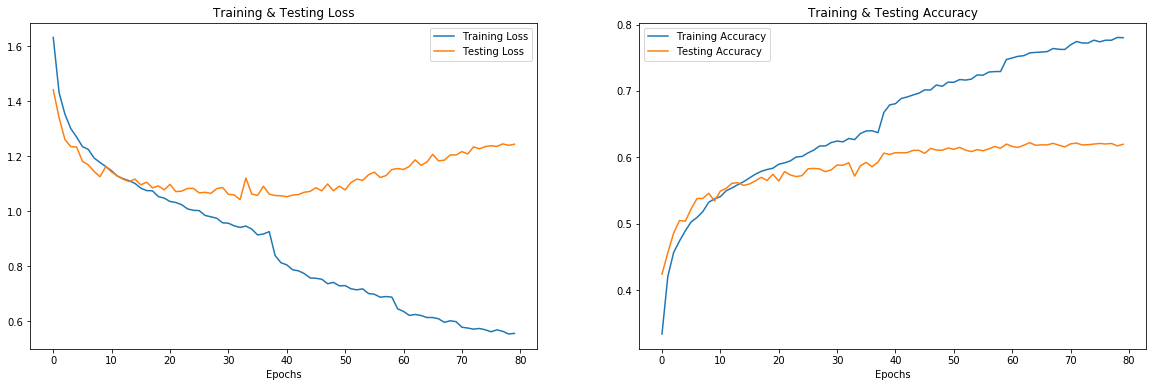

In [34]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")


epochs = [i for i in range(80)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [35]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
print(y_pred)

y_test_new = encoder.inverse_transform(y_test)

[['sad']
 ['disgust']
 ['angry']
 ...
 ['angry']
 ['happy']
 ['sad']]


In [36]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_new.flatten()

df.head(10)

Predicted Labels Actual Labels
0              sad       disgust
1          disgust       disgust
2            angry         angry
3          disgust       disgust
4              sad          fear
5              sad          fear
6             fear         happy
7            happy         happy
8          disgust           sad
9          neutral           sad

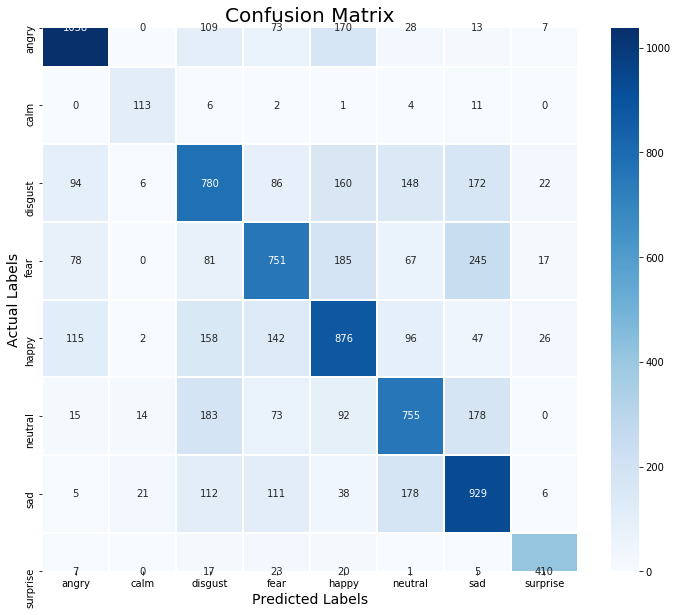

In [37]:
cm = confusion_matrix(y_test_new, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [38]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

       angry       0.77      0.72      0.74      1438
        calm       0.72      0.82      0.77       137
     disgust       0.54      0.53      0.54      1468
        fear       0.60      0.53      0.56      1424
       happy       0.57      0.60      0.58      1462
     neutral       0.59      0.58      0.58      1310
         sad       0.58      0.66      0.62      1400
    surprise       0.84      0.85      0.84       483

    accuracy                           0.62      9122
   macro avg       0.65      0.66      0.66      9122
weighted avg       0.62      0.62      0.62      9122



In [39]:
from keras.models import load_model

In [40]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
